<a href="https://www.kaggle.com/code/kalilurrahman/2022-march-mania-quick-eda-fe?scriptVersionId=110181374" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div class="alert alert-block alert-info" >
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Will we be able to predict the winners of the March Madness NCAA Games for Men and Women's Basketball Tournaments<br></br> Let's find out... 🤔🏀🔮🔮🔮</h1>
</div>


<div class="alert alert-success">
    <h1 style="text-align:center;font-weight: 15px; color:black;">
       🏀🏀🏀<br>
        “I’ve missed more than 9,000 shots in my career. I’ve lost almost 300 games. <br> 
        Twenty-six times, I’ve been trusted to take the game-winning shot and missed.<br>
        I’ve failed over and over and over again in my life. And that is why I succeed.”<br>
       - Michael Jordan <br>🏀🏀🏀</h1>
</div>



[![march-madness-getty-ftr-031520-1pd57aaw3ygs1bj4w9eu3wj51.jpg](https://i.postimg.cc/bNgypvMR/march-madness-getty-ftr-031520-1pd57aaw3ygs1bj4w9eu3wj51.jpg)](https://postimg.cc/9r45Bcc4)

# March Madness
<div class="alert alert-success">
  <h2 style="color:Black;">March Madness - Men's Event:</h2>
</div>

![2](https://upload.wikimedia.org/wikipedia/en/f/f2/2022_NCAA_NCAA_Men%27s_Final_Four_logo.png)

<div class="alert alert-success">
    <p style="color:Black;font-size:120%">🎯: The NCAA Division I Men's Basketball Tournament, also known and branded as NCAA March Madness, is a single-elimination tournament played each spring in the United States, currently featuring 68 college basketball teams from the Division I level of the National Collegiate Athletic Association (NCAA), to determine the national championship. The tournament was created in 1939 by the National Association of Basketball Coaches, and was the idea of Ohio State coach Harold Olsen. Played mostly during March, it has become one of the biggest annual sporting events in the United States.</p>
</div>

[![Men's Nracket](https://i.postimg.cc/pL3gHb2Z/image.png)](https://postimg.cc/VJB7qh0r)

<div class="alert alert-success">
  <h2 style="color:Black;">March Madness - Women's Event:</h2>
</div>

![3](https://upload.wikimedia.org/wikipedia/en/0/07/2022WFFlogo.jpg)

<div class="alert alert-success">
<p style="color:Black;font-size:120%">💎: The NCAA Division I Women's Basketball Tournament is an annual college basketball tournament for women. Held each March, the Women's Championship was inaugurated in the 1981–82 season. The NCAA tournament was preceded by the AIAW Women's Basketball Tournament, which was held annually from 1972 to 1982. Basketball was one of 12 women's sports added to the NCAA championship program for the 1981–82 school year, as the NCAA engaged in battle with the Association for Intercollegiate Athletics for Women (AIAW) for sole governance of women's collegiate sports. The AIAW continued to conduct its established championship program in the same 12 (and other) sports; however, after a year of dual women's championships, the NCAA prevailed, while the AIAW disbanded./p>
    <p style="color:Black;font-size:120%">⭐:Together they refer to as March Madness!</p>
</div>





## This Notebook is a 2022 verion through a full reuse of the 2021 notebook  ***Quick EDA with common feature engineering***  
##### Source code - https://www.kaggle.com/lucabasa/quick-eda-with-common-feature-engineering by @lucabasa https://www.kaggle.com/lucabasa 

In [1]:
!pip install tubesml==0.2.0

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np 
import pandas as pd 

import tubesml as tml

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import mm_data_manipulation as dm

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ncaam-march-mania-2021-spread/MDataFiles_Stage1_Spread/Conferences.csv
/kaggle/input/ncaam-march-mania-2021-spread/MDataFiles_Stage1_Spread/MNCAATourneySeedRoundSlots.csv
/kaggle/input/ncaam-march-mania-2021-spread/MDataFiles_Stage1_Spread/MRegularSeasonDetailedResults.csv
/kaggle/input/ncaam-march-mania-2021-spread/MDataFiles_Stage1_Spread/MNCAATourneyCompactResults.csv
/kaggle/input/ncaam-march-mania-2021-spread/MDataFiles_Stage1_Spread/MGameCities.csv
/kaggle/input/ncaam-march-mania-2021-spread/MDataFiles_Stage1_Spread/MSeasons.csv
/kaggle/input/ncaam-march-mania-2021-spread/MDataFiles_Stage1_Spread/MSecondaryTourneyTeams.csv
/kaggle/input/ncaam-march-mania-2021-spread/MDataFiles_Stage1_Spread/Cities.csv
/kaggle/input/ncaam-march-mania-2021-spread/MDataFiles_Stage1_Spread/MTeamSpellings.csv
/kaggle/input/ncaam-march-mania-2021-spread/MDataFiles_Stage1_Spread/MRegularSeasonCompactResults.csv
/kaggle/input/ncaam-march-mania-2021-spread/MDataFiles_Stage1_Spread/MMasseyOrd

# Submission file

We are required to predict the probability of winning of one team against the other

## NCAAM

In [3]:
df = pd.read_csv('../input/mens-march-mania-2022/MDataFiles_Stage1/MSampleSubmissionStage1.csv')
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

ID  Pred  year Team_1 Team_2
0  2016_1112_1114   0.5  2016   1112   1114
1  2016_1112_1122   0.5  2016   1112   1122
2  2016_1112_1124   0.5  2016   1112   1124
3  2016_1112_1138   0.5  2016   1112   1138
4  2016_1112_1139   0.5  2016   1112   1139

We have this many games per year, indicating all the possible combinations of games each year. We will be evaluated only on the games that actually happened (naturally)

In [4]:
df.year.value_counts(dropna=False).sort_index()

2016    2278
2017    2278
2018    2278
2019    2278
2021    2278
Name: year, dtype: int64

# NCAAW

In [5]:
df = pd.read_csv('../input/womens-march-mania-2022/WDataFiles_Stage1/WSampleSubmissionStage1.csv')
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

ID  Pred  year Team_1 Team_2
0  2016_3106_3107   0.5  2016   3106   3107
1  2016_3106_3113   0.5  2016   3106   3113
2  2016_3106_3119   0.5  2016   3106   3119
3  2016_3106_3120   0.5  2016   3106   3120
4  2016_3106_3124   0.5  2016   3106   3124

In [6]:
df.year.value_counts(dropna=False).sort_index()

2016    2016
2017    2016
2018    2016
2019    2016
2021    2016
Name: year, dtype: int64

# Teams.csv

## NCAAM

In [7]:
df = pd.read_csv('../input/mens-march-mania-2022/MDataFiles_Stage1/MTeams.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (372, 4)


TeamID     TeamName  FirstD1Season  LastD1Season
0    1101  Abilene Chr           2014          2022
1    1102    Air Force           1985          2022
2    1103        Akron           1985          2022
3    1104      Alabama           1985          2022
4    1105  Alabama A&M           2000          2022

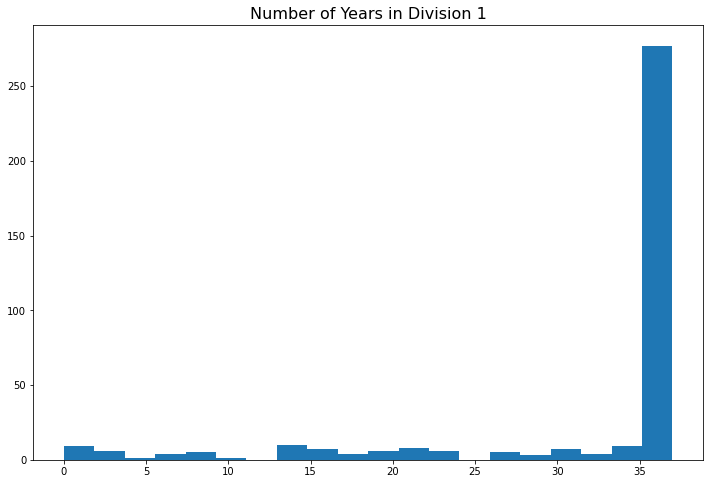

In [8]:
df['years_in_d1'] = df['LastD1Season'] - df['FirstD1Season']

df['years_in_d1'].hist(bins=20, figsize=(12,8))
plt.grid(False)
plt.title('Number of Years in Division 1', fontsize=16)
plt.show()

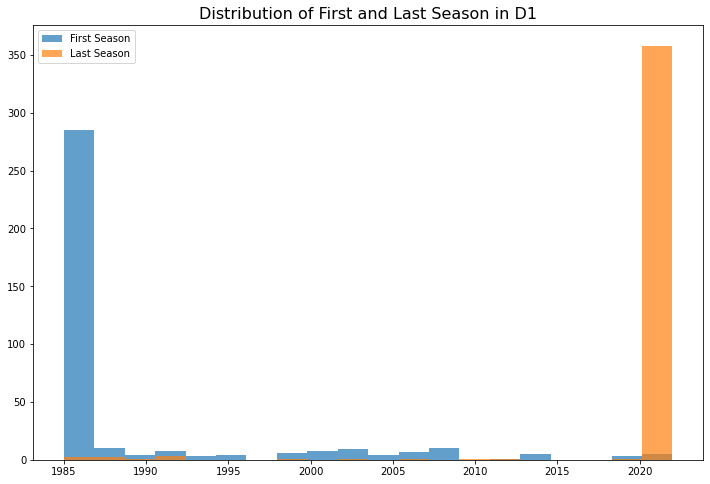

In [9]:
df.FirstD1Season.hist(bins=20, alpha=0.7, label='First Season', figsize=(12,8))
df.LastD1Season.hist(bins=20, alpha=0.7, label='Last Season', figsize=(12,8))
plt.grid(False)
plt.legend()
plt.title('Distribution of First and Last Season in D1', fontsize=16)
plt.show()

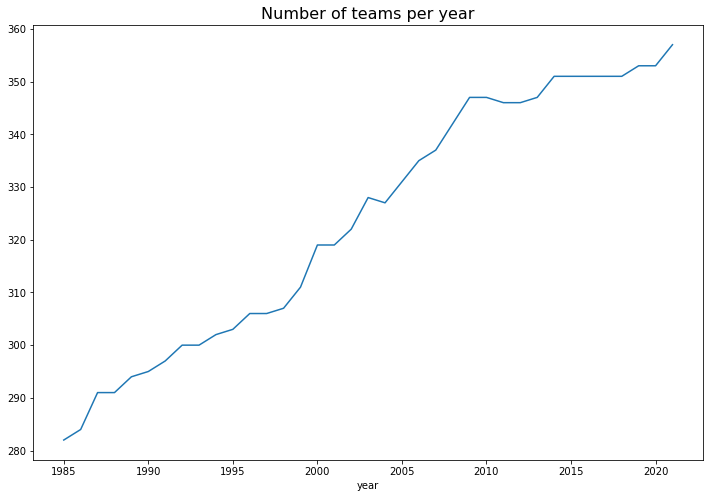

In [10]:
yr_count = pd.DataFrame({'year': np.arange(1985, 2022)})

for year in yr_count.year:
    df['is_in'] = 0
    df.loc[(df.FirstD1Season <= year) & (df.LastD1Season >= year), 'is_in'] = 1
    tot_teams = df.is_in.sum()
    yr_count.loc[yr_count.year == year, 'n_teams'] = tot_teams
    
yr_count = yr_count.set_index('year')
yr_count.n_teams.plot(figsize=(12,8))
plt.title('Number of teams per year', fontsize=16)
plt.show()

# NCAAW

There is no information about first and last NCAA season

In [11]:
df = pd.read_csv('../input/womens-march-mania-2022/WDataFiles_Stage1/WTeams.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (370, 2)


TeamID     TeamName
0    3101  Abilene Chr
1    3102    Air Force
2    3103        Akron
3    3104      Alabama
4    3105  Alabama A&M

# Seasons.csv

## NCAAM

In [12]:
df = pd.read_csv('../input/mens-march-mania-2022/MDataFiles_Stage1/MSeasons.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (38, 6)


Season              DayZero RegionW    RegionX    RegionY    RegionZ
0    1985  1984-10-29 00:00:00    East       West    Midwest  Southeast
1    1986  1985-10-28 00:00:00    East    Midwest  Southeast       West
2    1987  1986-10-27 00:00:00    East  Southeast    Midwest       West
3    1988  1987-11-02 00:00:00    East    Midwest  Southeast       West
4    1989  1988-10-31 00:00:00    East       West    Midwest  Southeast

In [13]:
df.RegionW.value_counts()

East           33
Atlanta         2
Albuquerque     1
TBD             1
NA1             1
Name: RegionW, dtype: int64

In [14]:
df.RegionX.value_counts()

Midwest      11
West         10
South         8
Southeast     4
TBD           1
Oakland       1
NA2           1
Chicago       1
Phoenix       1
Name: RegionX, dtype: int64

In [15]:
df.RegionY.value_counts()

Midwest           21
South              6
Southeast          6
TBD                1
Minneapolis        1
NA3                1
EastRutherford     1
Austin             1
Name: RegionY, dtype: int64

In [16]:
df.RegionZ.value_counts()

West            23
South            5
Southeast        4
Southwest        1
NA4              1
StLouis          1
WashingtonDC     1
TBD              1
Syracuse         1
Name: RegionZ, dtype: int64

## NCAAW

In [17]:
df = pd.read_csv('../input/womens-march-mania-2022/WDataFiles_Stage1/WSeasons.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (25, 6)


Season              DayZero RegionW  RegionX  RegionY  RegionZ
0    1998  1997-10-27 00:00:00    East  Midwest  Mideast     West
1    1999  1998-10-26 00:00:00    East  Mideast  Midwest     West
2    2000  1999-11-01 00:00:00    East  Midwest  Mideast     West
3    2001  2000-10-30 00:00:00    East  Midwest  Mideast     West
4    2002  2001-10-29 00:00:00    East     West  Mideast  Midwest

In [18]:
df.RegionW.value_counts()

East           7
Albany         3
Bridgeport     3
Dallas         2
Chattanooga    1
DesMoines      1
TBD            1
Albuquerque    1
Lincoln        1
Berkeley       1
Dayton         1
Greensboro     1
Alamo          1
NA1            1
Name: RegionW, dtype: int64

In [19]:
df.RegionX.value_counts()

Spokane         4
Midwest         3
West            2
Mideast         2
Cleveland       1
Tempe           1
TBD             1
Fresno          1
Memphis         1
Stanford        1
NA2             1
Trenton         1
Hemisfair       1
Dallas          1
Dayton          1
OklahomaCity    1
Chicago         1
Norfolk         1
Name: RegionX, dtype: int64

In [20]:
df.RegionY.value_counts()

Mideast         5
KansasCity      3
Midwest         2
OklahomaCity    2
Lexington       2
Greensboro      2
Kingston        1
NA3             1
TBD             1
Bridgeport      1
NewOrleans      1
Fresno          1
Dayton          1
Louisville      1
Mercado         1
Name: RegionY, dtype: int64

In [21]:
df.RegionZ.value_counts()

West            5
Philadelphia    2
OklahomaCity    2
Raleigh         2
Midwest         2
Greensboro      1
SiouxFalls      1
RiverWalk       1
NA4             1
Stockton        1
Portland        1
Sacramento      1
San Antonio     1
TBD             1
Lexington       1
Spokane         1
NotreDame       1
Name: RegionZ, dtype: int64

# Regular Season Compact Results

These are files that simply summarize when a game happened, where it was, and how it ended.

## NCAAM

In [22]:
df = pd.read_csv('../input/mens-march-mania-2022/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (174471, 8)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985      20     1228      81     1328      64    N      0
1    1985      25     1106      77     1354      70    H      0
2    1985      25     1112      63     1223      56    H      0
3    1985      25     1165      70     1432      54    H      0
4    1985      25     1192      86     1447      74    H      0

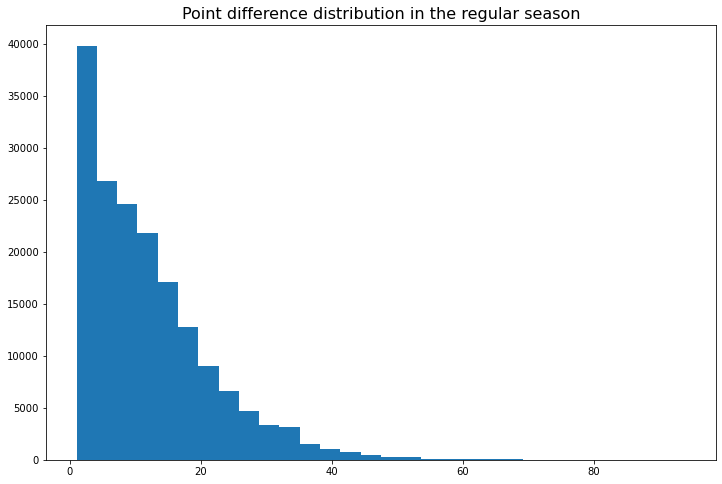

In [23]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30, figsize=(12,8))
plt.grid(False)
plt.title('Point difference distribution in the regular season', fontsize=16)
plt.show()

Half of the games were won by less than 10 points of difference, one game had 94 points of difference (!!!)

In [24]:
df.describe()

Season         DayNum        WTeamID         WScore  \
count  174471.000000  174471.000000  174471.000000  174471.000000   
mean     2004.535510      74.056049    1287.158210      76.762975   
std        10.728009      33.821333     104.644657      11.959181   
min      1985.000000       0.000000    1101.000000      34.000000   
25%      1995.000000      47.000000    1198.000000      69.000000   
50%      2005.000000      76.000000    1285.000000      76.000000   
75%      2014.000000     103.000000    1380.000000      84.000000   
max      2022.000000     132.000000    1472.000000     186.000000   

             LTeamID         LScore          NumOT     point_diff  
count  174471.000000  174471.000000  174471.000000  174471.000000  
mean     1282.772231      64.663577       0.046758      12.099398  
std       104.750998      11.276145       0.254095       9.409587  
min      1101.000000      20.000000       0.000000       1.000000  
25%      1191.000000      57.000000       0.000000       5.000000  
50%      1281.000000      64.000000       0.000000      10.000000  
75%      1375.000000      72.000000       0.000000      17.000000  
max      1472.000000     150.000000       6.000000      94.000000

Creating some overall statistics

In [25]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  LScore_min  \
Season                                                                   
1985            37         142    74.723040             74          27   
1986            35         151    74.813640             74          30   
1987            43         133    77.993870             77          25   
1988            40         152    79.773704             79          31   
1989            43         181    81.728511             81          30   
1990            36         173    80.846477             80          28   
1991            42         186    82.733932             82          27   
1992            41         159    79.992004             79          25   
1993            40         155    79.508790             79          27   
1994            43         150    81.160345             80          33   
1995            46         156    80.096149             79          32   
1996            41         142    78.205483             77          28   
1997            42         137    76.300842             76          21   
1998            38         153    77.229902             76          31   
1999            43         132    76.043581             75          27   
2000            37         143    76.310467             76          26   
2001            35         130    77.088650             77          31   
2002            40         133    76.963557             76          23   
2003            42         142    75.795061             75          24   
2004            37         122    74.971122             75          23   
2005            37         123    74.693690             74          22   
2006            39         129    74.587555             74          21   
2007            40         129    74.829467             74          27   
2008            39         129    74.962425             74          20   
2009            38         127    74.033721             73          22   
2010            43         134    74.652480             74          30   
2011            36         121    74.374190             74          30   
2012            40         124    73.379973             73          27   
2013            34         120    72.840789             72          25   
2014            44         126    76.101268             75          25   
2015            38         126    72.680799             72          26   
2016            40         144    78.295958             78          25   
2017            43         131    78.645783             78          27   
2018            44         132    79.080296             79          31   
2019            42         139    77.887424             77          24   
2020            46         143    76.177365             76          26   
2021            45         142    76.808301             76          30   
2022            42         119    76.161135             76          29   

        LScore_max  LScore_mean  LScore_median  NumOT_min  NumOT_max  \
Season                                                                 
1985           140    63.860316             64          0          3   
1986           114    63.633888             63          0          2   
1987           111    66.770626             66          0          3   
1988           133    67.697092             67          0          2   
1989           150    69.530840             69          0          2   
1990           141    68.833622             68          0          3   
1991           140    70.057240             69          0          2   
1992           116    67.144657             67          0          3   
1993           112    67.301858             67          0          2   
1994           125    68.561330             68          0          3   
1995           132    67.394898             67          0          3   
1996           127    65.737506             65          0          3   
1997           111    63.742238        

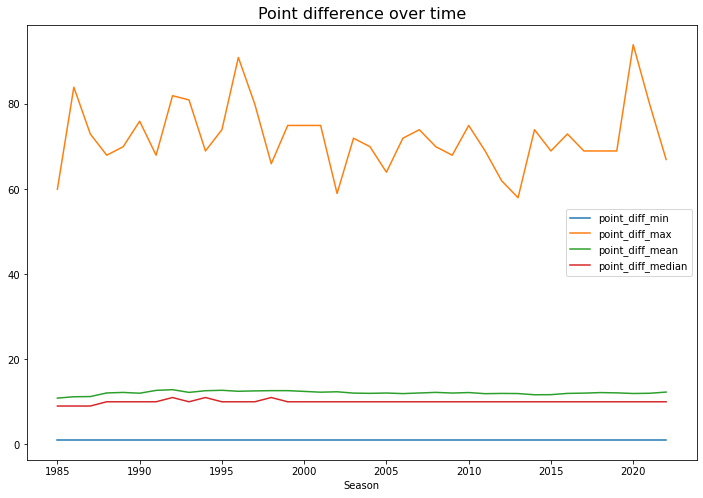

In [26]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot(figsize=(12,8))
plt.title('Point difference over time', fontsize=16)
plt.show()

Taking into account the court where the games were played

In [27]:
summaries = df[['Season', 'WLoc',
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
1985   A             41         142    72.491023             72          1114   
       H             37         128    75.935383             75          2244   
       N             43         121    74.105541             74           379   
1986   A             35         126    72.163964             72          1110   
       H             42         151    76.169076             76          2283   
...                 ...         ...          ...            ...           ...   
2021   H             47         142    77.464842             77          2119   
       N             51         112    76.231527             76           406   
2022   A             42         115    74.413880             74          1196   
       H             46         119    77.244354             77          2214   
       N             47         115    75.214724             75           326   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
1985   A             35         140    63.952424           63.0          1114   
       H             27         105    63.839127           64.0          2244   
       N             37          96    63.715040           64.0           379   
1986   A             30          97    63.426126           63.0          1110   
       H             31         114    63.786684           63.0          2283   
...                 ...         ...          ...            ...           ...   
2021   H             30         104    64.086833           64.0          2119   
       N             42          98    65.036946           65.0           406   
2022   A             29          99    65.059365           65.0          1196   
       H             31         110    63.180668           63.0          2214   
       N             33         109    64.325153           64.0           326   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
1985   A             0          3    0.007181             0         1114   
       H             0          1    0.002228             0         2244   
       N             0          3    0.042216             0          379   
1986   A             0          2    0.001802             0         1110   
       H             0          1    0.001752             0         2283   
...                ...        ...         ...           ...          ...   
2021   H             0          3    0.059934             0         2119   
       N             0          3    0.071429             0          406   
2022   A             0          2    0.076923             0         1196   
       H             0          4    0.057814             0         2214   
       N             0          3    0.085890             0          326   

             point_diff_min  point_diff_max  point_diff_mean  \
Season WLoc                                                    
1985   A                  1              43         8.538600   
       H                  1              60        12.096257   
       N                  1              47        10.390501   
1986   A                  1              53         8.737838   
       H                  1              53        12.382392   
...                     ...             ...              ...   
2021   H                  1              80        13.378008   
       N                  1              52        11.194581   
2022   A                  1              48         9.354515   
       H                  1              67        14.063686   
       N                  1              53        10.889571   

             point_diff_median  point_diff_count  
Season WLoc                     

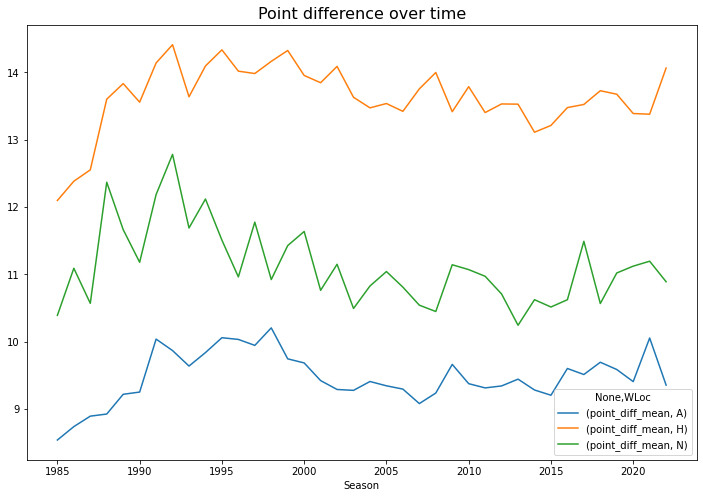

In [28]:
summaries[['point_diff_mean']].unstack().plot(figsize=(12,8))
plt.title('Point difference over time', fontsize=16)
plt.show()

## NCAAW

In [29]:
df = pd.read_csv('../input/womens-march-mania-2022/WDataFiles_Stage1/WRegularSeasonCompactResults.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (119277, 8)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1998      18     3104      91     3202      41    H      0
1    1998      18     3163      87     3221      76    H      0
2    1998      18     3222      66     3261      59    H      0
3    1998      18     3307      69     3365      62    H      0
4    1998      18     3349     115     3411      35    H      0

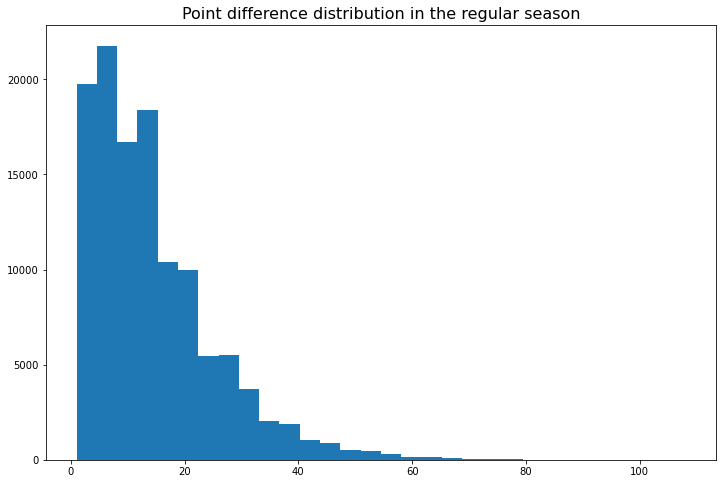

In [30]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30, figsize=(12,8))
plt.grid(False)
plt.title('Point difference distribution in the regular season', fontsize=16)
plt.show()

On average, games in the Women's tournament end with a larger point differential. The biggest one being a game ended with 108 points of difference.

In [31]:
df.describe()

Season         DayNum        WTeamID         WScore  \
count  119277.000000  119277.000000  119277.000000  119277.000000   
mean     2010.197129      71.022703    3284.499434      71.855261   
std         6.939232      34.958137     103.796198      11.347675   
min      1998.000000       1.000000    3101.000000      30.000000   
25%      2004.000000      40.000000    3196.000000      64.000000   
50%      2010.000000      74.000000    3282.000000      71.000000   
75%      2016.000000     101.000000    3376.000000      79.000000   
max      2022.000000     132.000000    3472.000000     140.000000   

             LTeamID         LScore          NumOT     point_diff  
count  119277.000000  119277.000000  119277.000000  119277.000000  
mean     3284.552579      57.518264       0.038071      14.336997  
std       105.024170      10.801784       0.223613      10.892121  
min      3101.000000      11.000000       0.000000       1.000000  
25%      3193.000000      50.000000       0.000000       6.000000  
50%      3284.000000      57.000000       0.000000      12.000000  
75%      3375.000000      64.000000       0.000000      19.000000  
max      3472.000000     130.000000       5.000000     108.000000

In [32]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  LScore_min  \
Season                                                                   
1998            39         126    75.324457             75          27   
1999            38         130    74.747577             74          20   
2000            37         133    74.013339             73          25   
2001            36         135    74.269319             74          24   
2002            42         124    73.595371             73          23   
2003            37         128    72.299628             72          16   
2004            38         125    71.206491             71          18   
2005            37         118    69.858742             69          22   
2006            38         119    71.175834             71          22   
2007            34         117    71.132450             71          18   
2008            40         121    70.996062             70          22   
2009            36         126    69.819350             69          22   
2010            37         119    70.514786             70          18   
2011            30         126    70.658817             70          11   
2012            34         128    69.183809             68          14   
2013            33         128    68.843750             68          19   
2014            39         133    74.491051             74          23   
2015            36         123    71.308150             71          20   
2016            40         132    71.410635             70          20   
2017            38         140    72.100768             71          22   
2018            38         131    72.774237             72          21   
2019            35         124    72.303817             72          26   
2020            36         124    72.055502             71          22   
2021            42         136    72.699663             72          21   
2022            35         131    71.698982             71          24   

        LScore_max  LScore_mean  LScore_median  NumOT_min  NumOT_max  \
Season                                                                 
1998           101    60.342037             60          0          0   
1999           111    60.192390             60          0          0   
2000           104    59.191047             59          0          0   
2001           104    59.652263             59          0          0   
2002            99    58.876920             59          0          0   
2003           102    57.940906             58          0          0   
2004           119    57.316707             57          0          0   
2005            99    55.830534             56          0          4   
2006            95    57.262901             57          0          3   
2007           102    57.063416             57          0          5   
2008           101    56.806458             56          0          4   
2009            95    55.919603             56          0          3   
2010           112    56.473152             56          0          4   
2011           107    56.193071             56          0          4   
2012           105    55.117129             55          0          3   
2013           112    54.801890             54          0          4   
2014           130    60.300838             60          0          4   
2015           101    57.313135             57          0          4   
2016           108    57.040315             56          0          5   
2017           104    57.486756             57          0          4   
2018           109    57.954502             58          0          4   
2019           110    57.605916             57          0          3   
2020           107    57.686714             57          0          3   
2021           103    58.503656             58          0          3   
2022           105    56.839740             57          0          4   

        NumOT_mean  NumOT_median  point_diff_min  point_diff_max

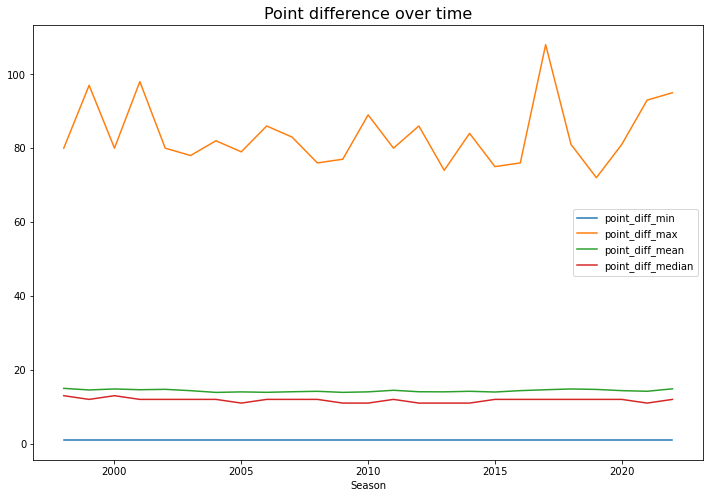

In [33]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot(figsize=(12,8))
plt.title('Point difference over time', fontsize=16)
plt.show()

In [34]:
summaries = df[['Season', 'WLoc',
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
1998   A             44         125    73.769759             73          1455   
       H             39         126    76.261915             76          2413   
1999   A             45         116    73.192547             73          1610   
       H             38         130    75.706804             75          2616   
       N             61          86    73.600000             73             5   
...                 ...         ...          ...            ...           ...   
2021   H             43         136    73.724653             73          1874   
       N             43         104    71.085502             70           269   
2022   A             35         107    69.789121             69          1342   
       H             44         131    72.982949             72          1994   
       N             46          99    71.712871             72           202   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
1998   A             27         101    61.104467           61.0          1455   
       H             27          95    59.882304           60.0          2413   
1999   A             29         111    60.837888           61.0          1610   
       H             20         101    59.784404           59.0          2616   
       N             52          79    65.800000           64.0             5   
...                 ...         ...          ...            ...           ...   
2021   H             21         102    58.248666           58.0          1874   
       N             30          92    59.026022           59.0           269   
2022   A             29          94    57.327124           57.0          1342   
       H             24         105    56.337011           56.0          1994   
       N             32          93    58.564356           59.0           202   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
1998   A             0          0    0.000000             0         1455   
       H             0          0    0.000000             0         2413   
1999   A             0          0    0.000000             0         1610   
       H             0          0    0.000000             0         2616   
       N             0          0    0.000000             0            5   
...                ...        ...         ...           ...          ...   
2021   H             0          3    0.048026             0         1874   
       N             0          2    0.066914             0          269   
2022   A             0          4    0.058122             0         1342   
       H             0          4    0.040622             0         1994   
       N             0          2    0.064356             0          202   

             point_diff_min  point_diff_max  point_diff_mean  \
Season WLoc                                                    
1998   A                  1              79        12.665292   
       H                  1              80        16.379610   
1999   A                  1              62        12.354658   
       H                  1              97        15.922401   
       N                  1              18         7.800000   
...                     ...             ...              ...   
2021   H                  1              93        15.475987   
       N                  1              50        12.059480   
2022   A                  1              56        12.461997   
       H                  1              95        16.645938   
       N                  1              60        13.148515   

             point_diff_median  point_diff_count  
Season WLoc                     

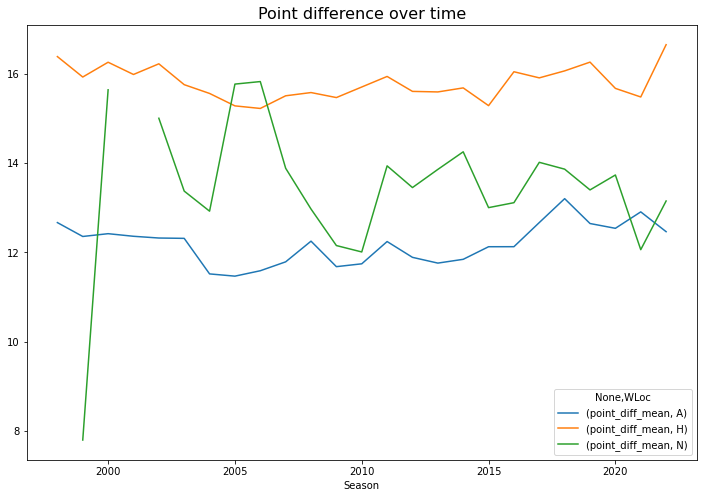

In [35]:
summaries[['point_diff_mean']].unstack().plot(figsize=(12,8))
plt.title('Point difference over time', fontsize=16)
plt.show()

# Playoff compact result

Similar to the previous section, but for Playoff games. We are going to predict games from this group (well, that will be in this group next year as the games did not happen yet).

## NCAAM

In [36]:
df = pd.read_csv('../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (2317, 8)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985     136     1116      63     1234      54    N      0
1    1985     136     1120      59     1345      58    N      0
2    1985     136     1207      68     1250      43    N      0
3    1985     136     1229      58     1425      55    N      0
4    1985     136     1242      49     1325      38    N      0

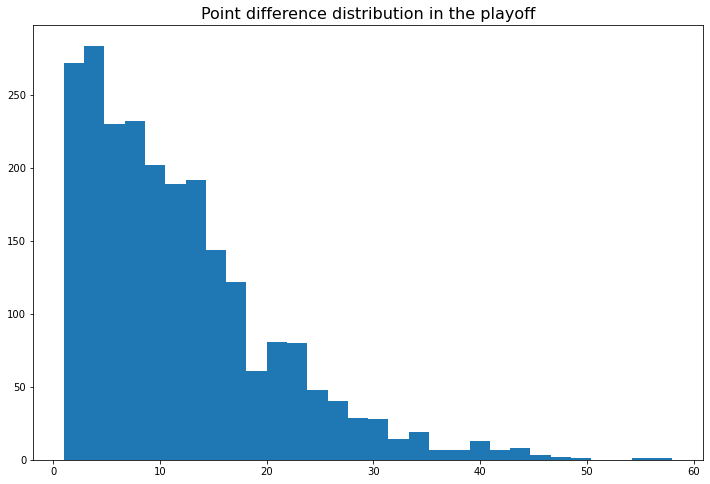

In [37]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30, figsize=(12,8))
plt.grid(False)
plt.title('Point difference distribution in the playoff', fontsize=16)
plt.show()

The distribution is very similar to the one in the regular season, but with less extreme outcomes

In [38]:
df.describe()

Season       DayNum      WTeamID       WScore      LTeamID  \
count  2317.000000  2317.000000  2317.000000  2317.000000  2317.000000   
mean   2002.758308   139.167890  1286.536901    76.891239  1292.018127   
std      10.471044     4.217412   100.988726    11.836804   103.292844   
min    1985.000000   134.000000  1101.000000    43.000000  1101.000000   
25%    1994.000000   136.000000  1210.000000    69.000000  1209.000000   
50%    2003.000000   137.000000  1276.000000    76.000000  1290.000000   
75%    2012.000000   139.000000  1385.000000    84.000000  1387.000000   
max    2021.000000   154.000000  1463.000000   149.000000  1463.000000   

            LScore        NumOT   point_diff  
count  2317.000000  2317.000000  2317.000000  
mean     65.168321     0.069055    11.722918  
std      11.064350     0.282592     8.857491  
min      29.000000     0.000000     1.000000  
25%      58.000000     0.000000     5.000000  
50%      65.000000     0.000000    10.000000  
75%      72.000000     0.000000    16.000000  
max     115.000000     3.000000    58.000000

In [39]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  LScore_min  \
Season                                                                   
1985            46          96    68.047619           67.0          38   
1986            58         101    76.841270           74.0          43   
1987            57         113    82.603175           83.0          51   
1988            54         123    83.349206           83.0          47   
1989            50         124    85.222222           85.0          46   
1990            49         149    80.761905           78.0          46   
1991            50         117    80.079365           79.0          48   
1992            51         106    81.238095           81.0          43   
1993            54         112    81.761905           81.0          50   
1994            51         112    78.349206           77.0          39   
1995            49         113    78.222222           76.0          47   
1996            43         110    77.666667           77.0          41   
1997            55         109    77.428571           76.0          40   
1998            51         110    78.492063           79.0          46   
1999            43         108    74.666667           75.0          32   
2000            48         105    73.222222           74.0          38   
2001            50         101    77.468750           77.5          35   
2002            63         105    79.625000           80.0          37   
2003            47         108    76.562500           77.0          46   
2004            53         102    75.500000           75.5          43   
2005            55         111    75.562500           75.0          46   
2006            50          98    73.203125           73.0          44   
2007            54         121    75.703125           76.0          42   
2008            51         113    77.218750           75.5          29   
2009            58         103    77.250000           77.0          43   
2010            51         101    74.031250           73.0          44   
2011            53         102    73.194030           72.0          41   
2012            57         102    71.402985           71.0          41   
2013            54          95    72.208955           73.0          34   
2014            55          93    73.850746           75.0          35   
2015            56          94    72.925373           72.0          39   
2016            47         105    78.343284           78.0          43   
2017            60         103    79.432836           78.0          39   
2018            50         102    76.253731           76.0          43   
2019            53          99    76.358209           77.0          44   
2021            51          98    75.363636           75.5          46   

        LScore_max  LScore_mean  LScore_median  NumOT_min  NumOT_max  \
Season                                                                 
1985            84    59.333333           58.0          0          1   
1986            87    66.142857           65.0          0          1   
1987            97    71.984127           71.0          0          1   
1988           115    71.285714           72.0          0          1   
1989           101    73.253968           73.0          0          1   
1990           115    70.761905           70.0          0          1   
1991            90    67.809524           68.0          0          1   
1992           103    68.730159           69.0          0          1   
1993            84    66.841270           68.0          0          1   
1994           102    67.238095           68.0          0          1   
1995            96    66.269841           66.0          0          3   
1996            90    63.825397           63.0          0          1   
1997            92    65.952381           66.0          0          1   
1998            87    65.968254           65.0          0          1   
1999            88    61.126984           6

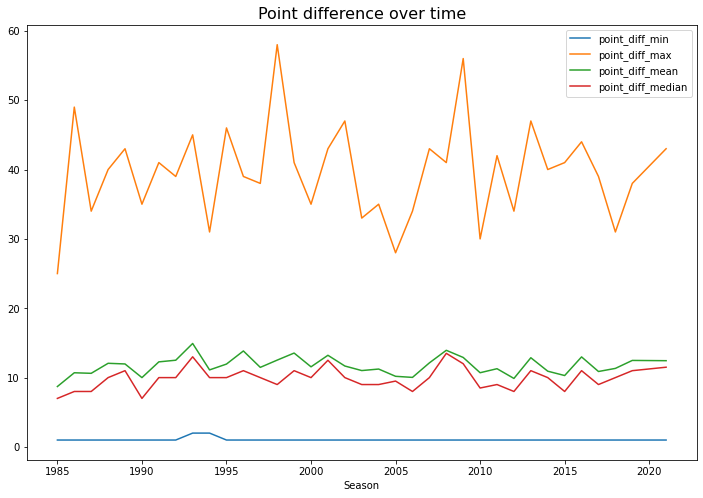

In [40]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot(figsize=(12,8))
plt.title('Point difference over time', fontsize=16)
plt.show()

## NCAAW

In [41]:
df = pd.read_csv('../input/womens-march-mania-2022/WDataFiles_Stage1/WNCAATourneyCompactResults.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (1449, 8)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1998     137     3104      94     3422      46    H      0
1    1998     137     3112      75     3365      63    H      0
2    1998     137     3163      93     3193      52    H      0
3    1998     137     3198      59     3266      45    H      0
4    1998     137     3203      74     3208      72    A      0

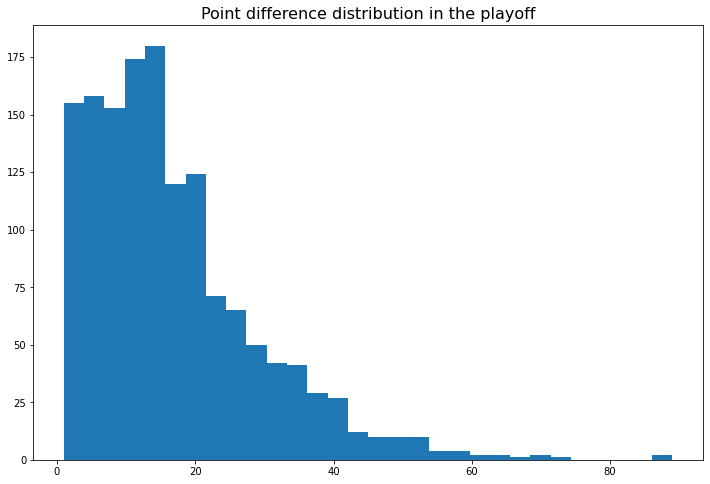

In [42]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30, figsize=(12,8))
plt.grid(False)
plt.title('Point difference distribution in the playoff', fontsize=16)
plt.show()

Even though the extreme results are less extreme, on average the Women's tournament games end with a bigger point differential during the playoff than the regular season

In [43]:
df.describe()

Season       DayNum      WTeamID       WScore      LTeamID  \
count  1449.000000  1449.000000  1449.000000  1449.000000  1449.000000   
mean   2009.043478   140.792961  3284.588682    75.819876  3288.176674   
std       6.710379     4.045826    97.931003    11.319689   100.207550   
min    1998.000000   137.000000  3104.000000    47.000000  3101.000000   
25%    2003.000000   138.000000  3199.000000    68.000000  3208.000000   
50%    2009.000000   139.000000  3280.000000    75.000000  3283.000000   
75%    2015.000000   141.000000  3376.000000    84.000000  3378.000000   
max    2021.000000   155.000000  3464.000000   140.000000  3464.000000   

            LScore        NumOT   point_diff  
count  1449.000000  1449.000000  1449.000000  
mean     59.122843     0.022774    16.697032  
std      10.942218     0.153793    12.504032  
min      26.000000     0.000000     1.000000  
25%      52.000000     0.000000     7.000000  
50%      59.000000     0.000000    14.000000  
75%      66.000000     0.000000    22.000000  
max     100.000000     2.000000    89.000000

In [44]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  LScore_min  \
Season                                                                   
1998            55         102    78.587302             77          39   
1999            53         113    76.444444             76          41   
2000            57         116    78.031746             77          38   
2001            51         104    79.444444             79          29   
2002            55          98    76.507937             76          35   
2003            50          95    72.507937             72          33   
2004            52         103    72.285714             71          42   
2005            58          97    73.126984             71          33   
2006            57         102    75.857143             75          27   
2007            49          98    71.888889             70          33   
2008            47          98    73.507937             75          32   
2009            56         104    73.936508             74          30   
2010            49          96    73.111111             73          33   
2011            53          99    73.873016             75          30   
2012            57          96    73.888889             73          26   
2013            53         105    74.476190             74          37   
2014            55         106    77.079365             76          36   
2015            51         111    76.841270             77          33   
2016            48         101    77.111111             75          31   
2017            55         119    79.984127             77          30   
2018            61         140    82.460317             83          35   
2019            55         110    78.428571             78          34   
2021            52         102    74.476190             73          32   

        LScore_max  LScore_mean  LScore_median  NumOT_min  NumOT_max  \
Season                                                                 
1998            80    63.396825             64          0          0   
1999            92    60.650794             61          0          0   
2000            85    61.634921             63          0          0   
2001            87    61.365079             63          0          0   
2002            79    59.111111             60          0          0   
2003            85    57.015873             57          0          0   
2004            85    57.952381             58          0          0   
2005            79    56.126984             57          0          0   
2006            75    59.920635             61          0          1   
2007            82    54.730159             54          0          1   
2008            87    57.555556             57          0          1   
2009            82    56.619048             58          0          1   
2010            82    56.650794             57          0          1   
2011            86    58.349206             60          0          1   
2012            80    58.095238             59          0          1   
2013            90    58.047619             57          0          2   
2014           100    59.571429             60          0          1   
2015            94    61.682540             64          0          1   
2016            84    58.587302             58          0          0   
2017            85    60.746032             62          0          1   
2018            89    62.841270             63          0          1   
2019            87    61.920635             62          0          1   
2021            82    57.253968             59          0          1   

        NumOT_mean  NumOT_median  point_diff_min  point_diff_max  \
Season                                                             
1998      0.000000             0               1              53   
1999      0.000000             0               2              59   
2000      0.000000             0               1              71   
2001      0.0000

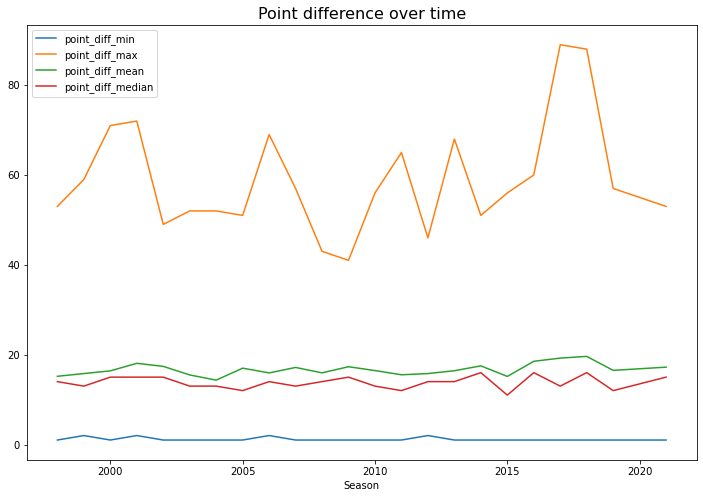

In [45]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot(figsize=(12,8))
plt.title('Point difference over time', fontsize=16)
plt.show()

# Regular Season Detailed results

These datasets give more information about the games by adding some boxscore stats

## NCAAM

In [46]:
reg_season_m = pd.read_csv('../input/mens-march-mania-2022/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv')
print(f'Original shape: {reg_season_m.shape}')
stats = [col for col in reg_season_m.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

reg_season_m = dm.process_details(reg_season_m)
print(f'Processed shape: {reg_season_m.shape}')
reg_season_m.head()

Original shape: (100423, 34)
Processed shape: (100423, 136)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003      10     1104      68     1328      62    N      0    27    58   
1    2003      10     1272      70     1393      63    N      0    26    62   
2    2003      11     1266      73     1437      61    N      0    24    58   
3    2003      11     1296      56     1457      50    N      0    18    38   
4    2003      11     1400      77     1208      71    N      0    30    61   

   ...  def_rating_diff  def_rating_advantage  shtg_opportunity_diff  \
0  ...        -3.232650                     0              -0.007160   
1  ...        -9.441729                     0              -0.087813   
2  ...       -18.743237                     0              -0.184579   
3  ...        -9.338222                     0              -0.067763   
4  ...        -8.742741                     0              -0.125599   

   shtg_opportunity_advantage  TO_perposs_diff  TO_perposs_advantage  \
0                           0         0.052510                     1   
1                           0         0.013155                     1   
2                           0        -0.030448                     0   
3                           0        -0.122539                     0   
4                           0         0.061475                     1   

   impact_diff  impact_advantage  True_shooting_perc_diff  \
0     0.086758                 1                 0.022320   
1     0.167421                 1                 0.081020   
2     0.329480                 1                 0.145114   
3     0.238095                 1                 0.085623   
4     0.146245                 1                 0.098690   

   True_shooting_perc_advantage  
0                             1  
1                             1  
2                             1  
3                             1  
4                             1  

[5 rows x 136 columns]

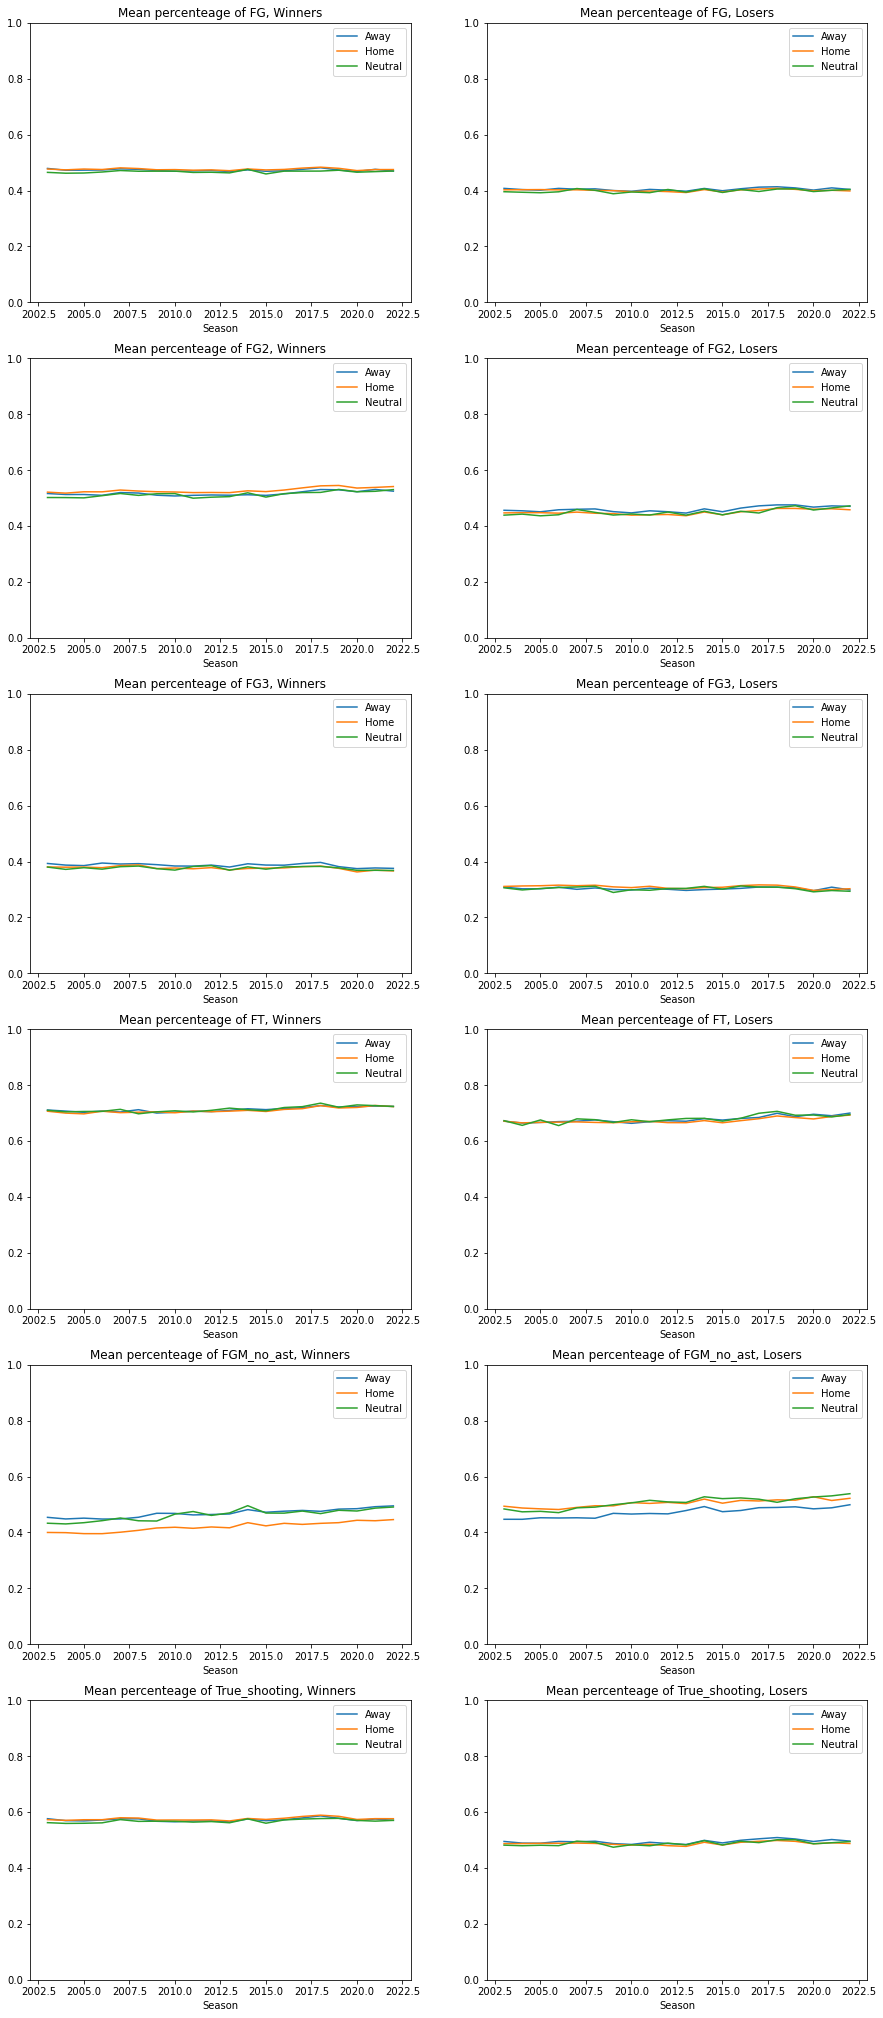

In [47]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in reg_season_m.columns if col not in not_sum]

summaries = reg_season_m[to_sum].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]


fig, ax= plt.subplots(6,2, figsize=(15, 6*6))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].unstack().plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].unstack().plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][1].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

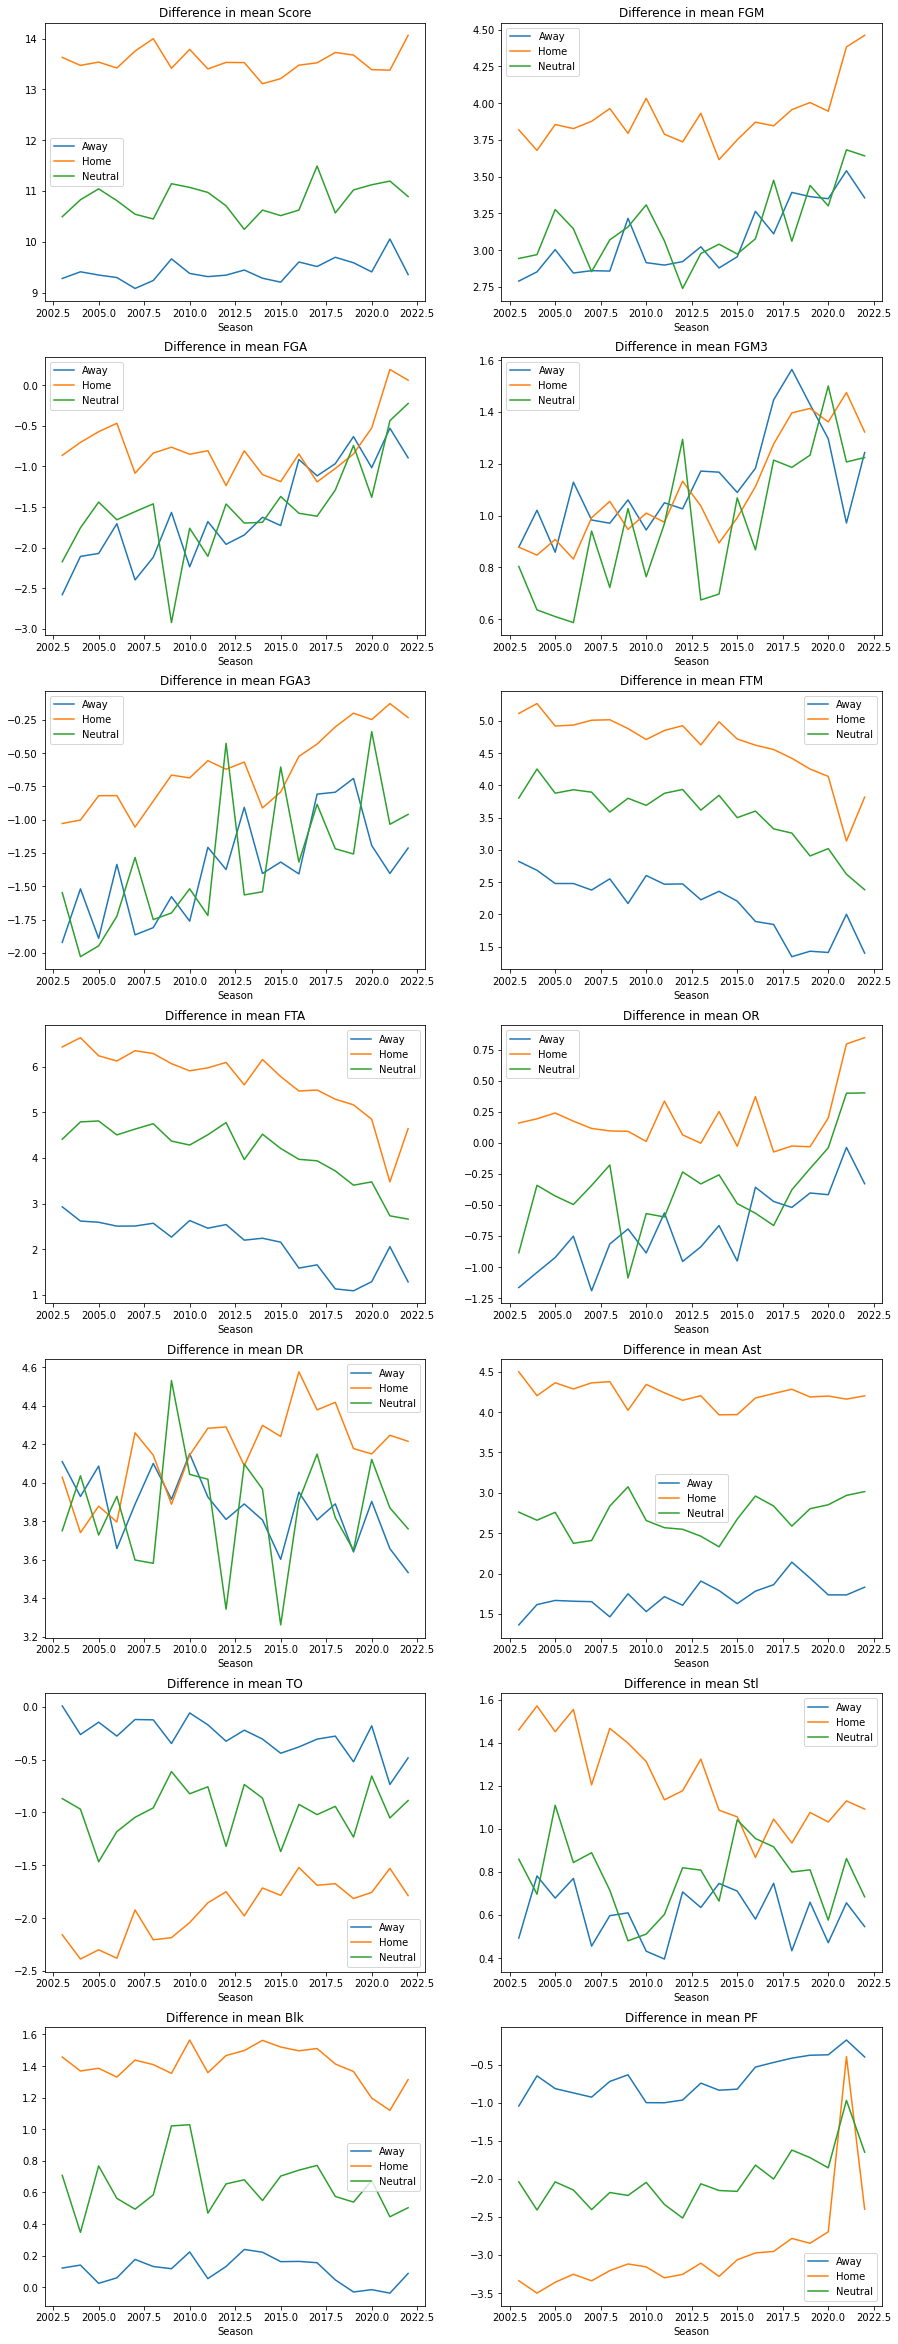

In [48]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].unstack().plot(title='Difference in mean '+name,ax=ax[i][j])
    ax[i][j].legend(labels=['Away', 'Home', 'Neutral'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

## NCAAW

In [49]:
reg_season_w = pd.read_csv('../input/womens-march-mania-2022/WDataFiles_Stage1/WRegularSeasonDetailedResults.csv')
print(f'Original shape: {reg_season_w.shape}')
stats = [col for col in reg_season_w.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

reg_season_w = dm.process_details(reg_season_w)
print(f'Processed shape: {reg_season_w.shape}')
reg_season_w.head()

Original shape: (63887, 34)
Processed shape: (63887, 136)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2010      11     3103      63     3237      49    H      0    23    54   
1    2010      11     3104      73     3399      68    N      0    26    62   
2    2010      11     3110      71     3224      59    A      0    29    62   
3    2010      11     3111      63     3267      58    A      0    27    52   
4    2010      11     3119      74     3447      70    H      1    30    74   

   ...  def_rating_diff  def_rating_advantage  shtg_opportunity_diff  \
0  ...       -19.443211                     0               0.056975   
1  ...        -8.951300                     0               0.022886   
2  ...       -18.288390                     0              -0.014892   
3  ...        -4.064577                     0              -0.418668   
4  ...        -6.142394                     0              -0.051581   

   shtg_opportunity_advantage  TO_perposs_diff  TO_perposs_advantage  \
0                           1        -0.071656                     0   
1                           1         0.007783                     1   
2                           0        -0.029229                     0   
3                           0         0.202490                     1   
4                           0        -0.037568                     0   

   impact_diff  impact_advantage  True_shooting_perc_diff  \
0     0.153488                 1                 0.082780   
1     0.263158                 1                 0.036327   
2     0.208511                 1                 0.096371   
3     0.312253                 1                 0.222051   
4     0.124031                 1                 0.050234   

   True_shooting_perc_advantage  
0                             1  
1                             1  
2                             1  
3                             1  
4                             1  

[5 rows x 136 columns]

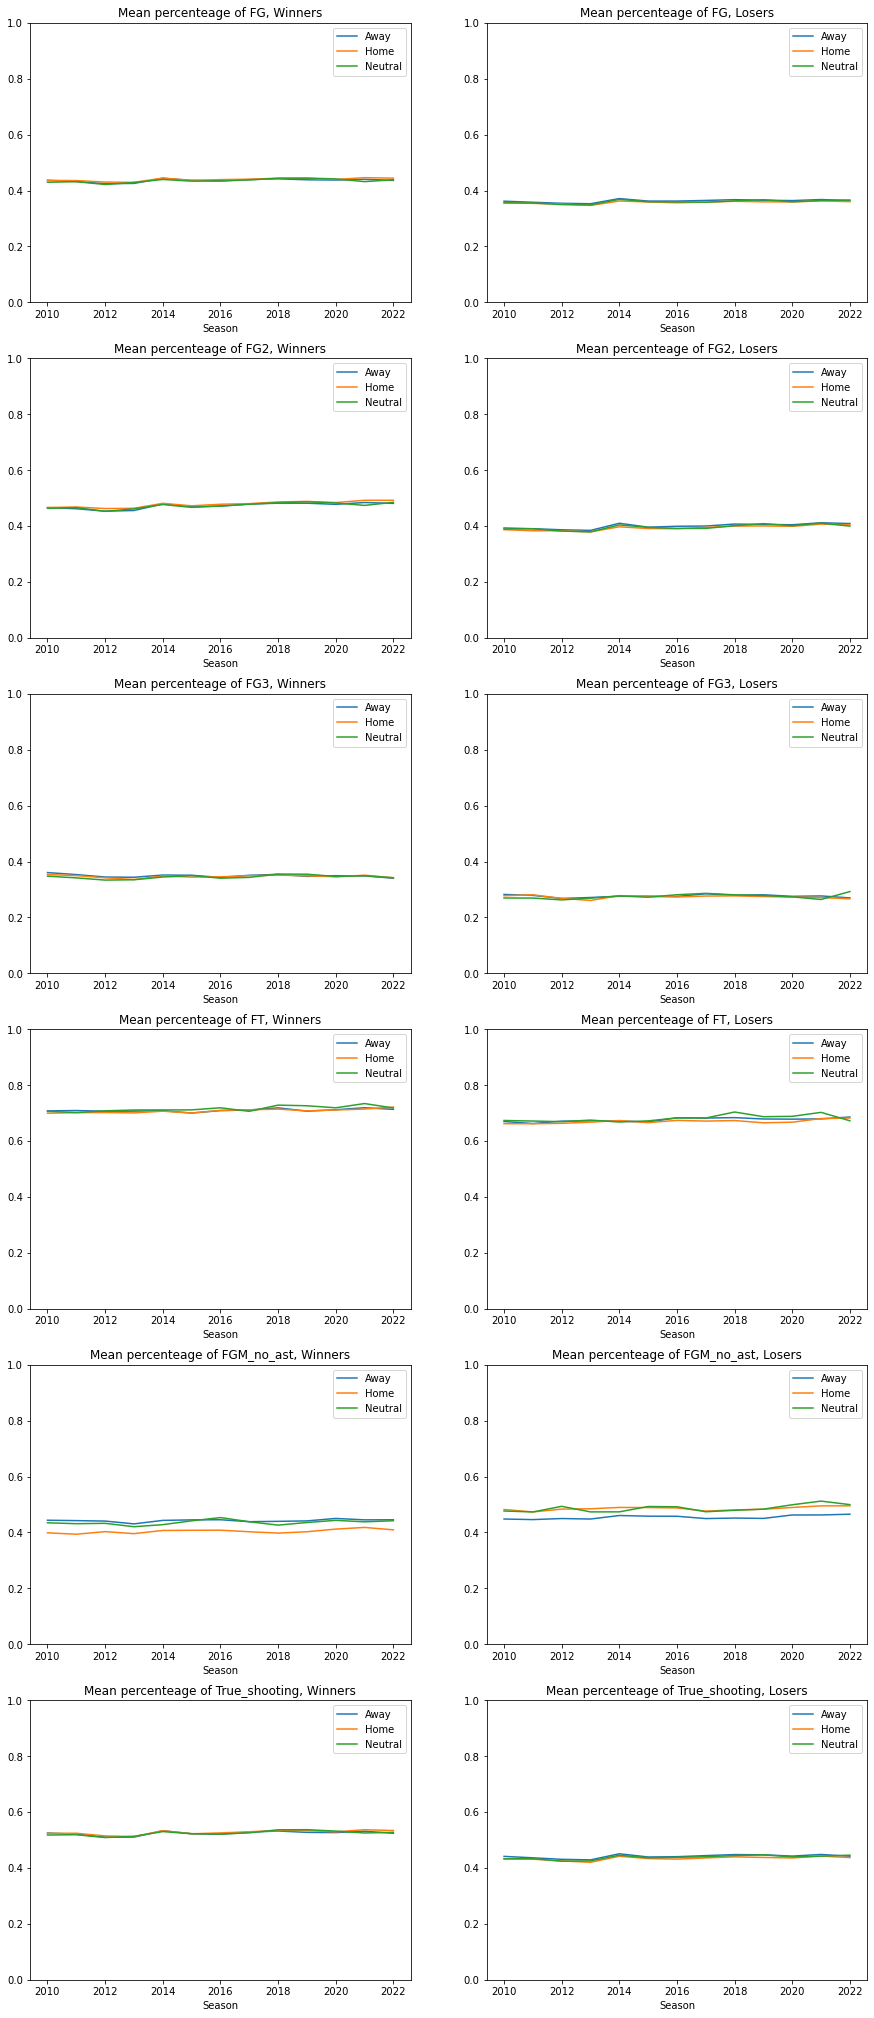

In [50]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in reg_season_w.columns if col not in not_sum]

summaries = reg_season_w[to_sum].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]


fig, ax= plt.subplots(6,2, figsize=(15, 6*6))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].unstack().plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].unstack().plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][1].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

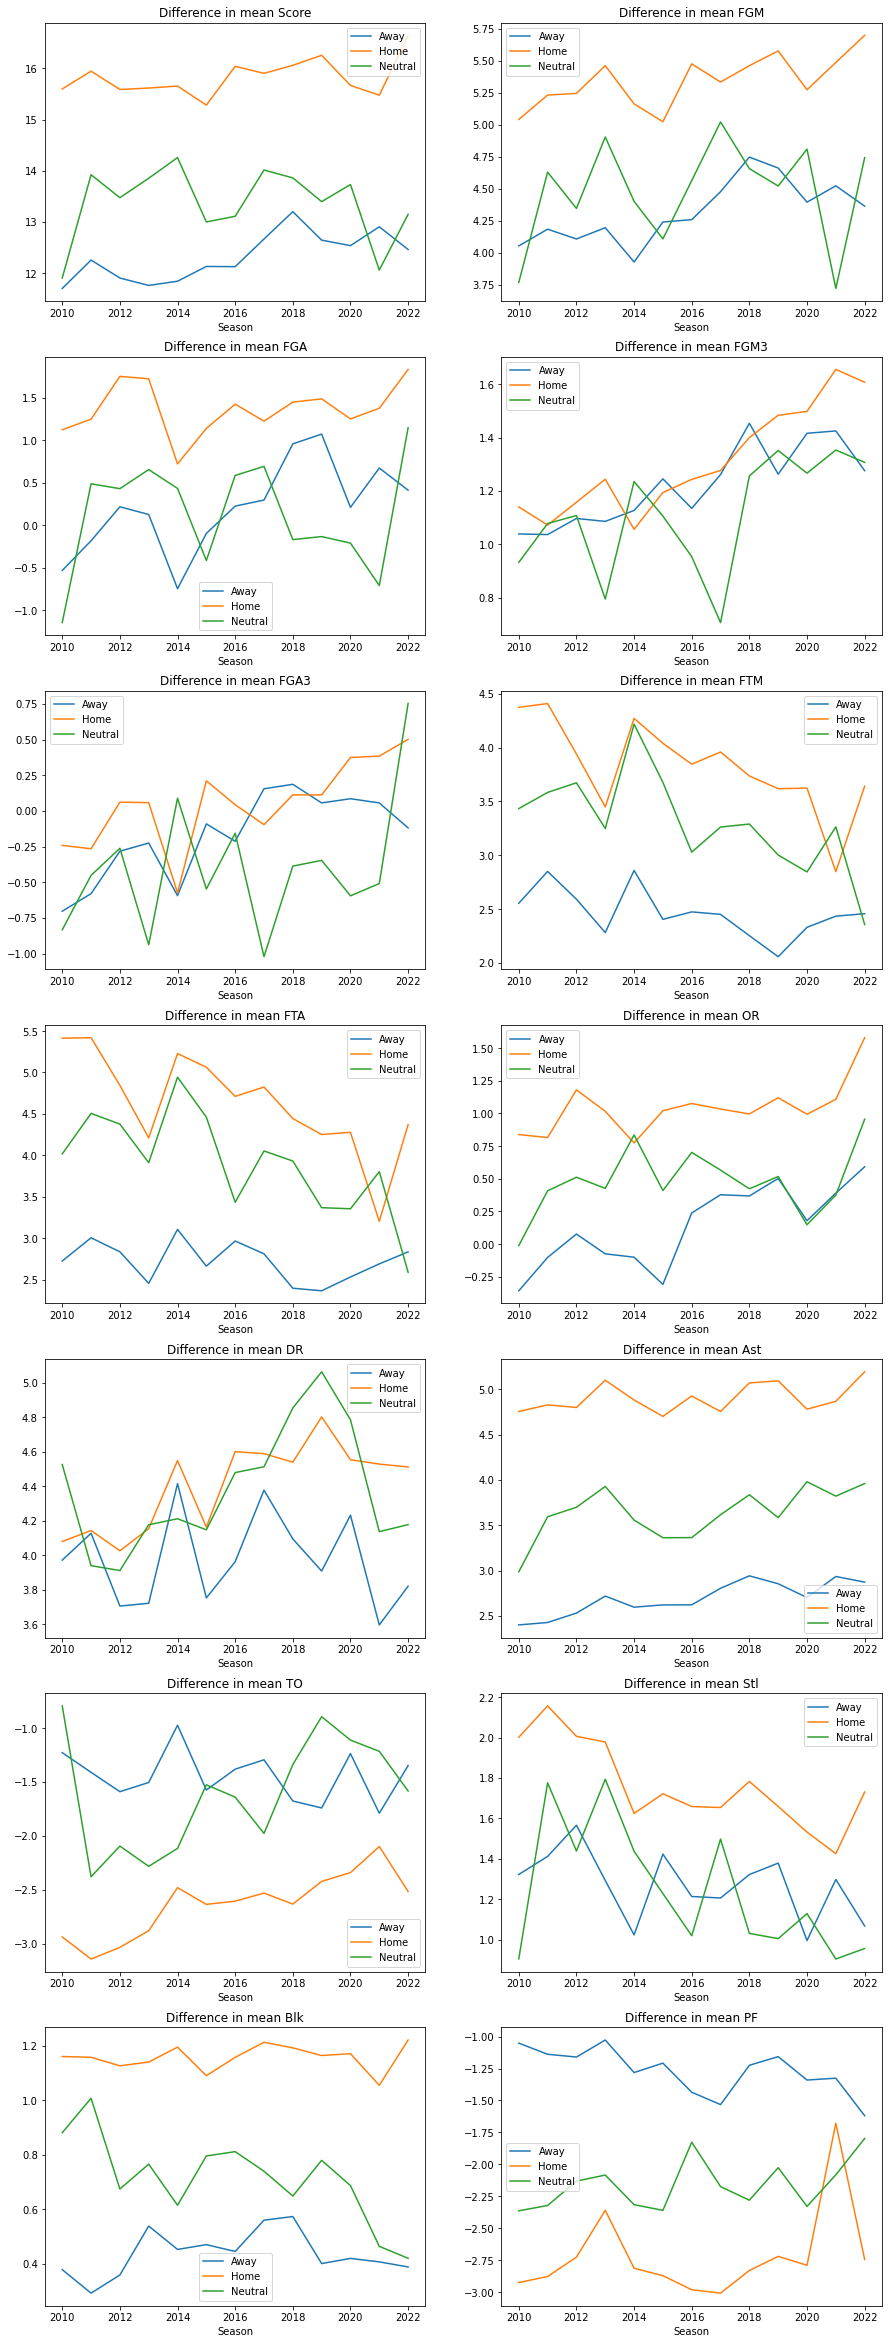

In [51]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].unstack().plot(title='Difference in mean '+name,ax=ax[i][j])
    ax[i][j].legend(labels=['Away', 'Home', 'Neutral'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

# Playoff Detailed Results

As in the previous section, but for the playoff

## NCAAM

In [52]:
playoff_m = pd.read_csv('../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')
print(f'Original shape: {playoff_m.shape}')
playoff_m = dm.process_details(playoff_m)
print(f'Processed shape: {playoff_m.shape}')
playoff_m.head()

Original shape: (1181, 34)
Processed shape: (1181, 136)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003     134     1421      92     1411      84    N      1    32    69   
1    2003     136     1112      80     1436      51    N      0    31    66   
2    2003     136     1113      84     1272      71    N      0    31    59   
3    2003     136     1141      79     1166      73    N      0    29    53   
4    2003     136     1143      76     1301      74    N      1    27    64   

   ...  def_rating_diff  def_rating_advantage  shtg_opportunity_diff  \
0  ...       -10.579846                     0               0.000119   
1  ...       -36.206879                     0               0.053525   
2  ...       -22.682088                     0              -0.098107   
3  ...       -12.676946                     0              -0.004151   
4  ...        -2.213060                     0               0.129059   

   shtg_opportunity_advantage  TO_perposs_diff  TO_perposs_advantage  \
0                           1        -0.036918                     0   
1                           1        -0.016679                     0   
2                           0        -0.037591                     0   
3                           0        -0.029285                     0   
4                           1        -0.015525                     0   

   impact_diff  impact_advantage  True_shooting_perc_diff  \
0     0.134228                 1                 0.051539   
1     0.418530                 1                 0.171825   
2     0.290323                 1                 0.155242   
3     0.106667                 1                 0.072690   
4    -0.020408                 0                -0.057712   

   True_shooting_perc_advantage  
0                             1  
1                             1  
2                             1  
3                             1  
4                             0  

[5 rows x 136 columns]

In [53]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in playoff_m.columns if col not in not_sum]

summaries = playoff_m[to_sum].groupby(['Season']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season                                                                     
2003            47         108    76.562500           77.0            64   
2004            53         102    75.500000           75.5            64   
2005            55         111    75.562500           75.0            64   
2006            50          98    73.203125           73.0            64   
2007            54         121    75.703125           76.0            64   
2008            51         113    77.218750           75.5            64   
2009            58         103    77.250000           77.0            64   
2010            51         101    74.031250           73.0            64   
2011            53         102    73.194030           72.0            67   
2012            57         102    71.402985           71.0            67   
2013            54          95    72.208955           73.0            67   
2014            55          93    73.850746           75.0            67   
2015            56          94    72.925373           72.0            67   
2016            47         105    78.343284           78.0            67   
2017            60         103    79.432836           78.0            67   
2018            50         102    76.253731           76.0            67   
2019            53          99    76.358209           77.0            67   
2021            51          98    75.363636           75.5            66   

        LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  ...  \
Season                                                                    ...   
2003            46          95    65.546875           64.0            64  ...   
2004            43         100    64.265625           64.0            64  ...   
2005            46         105    65.375000           64.0            64  ...   
2006            44          92    63.171875           61.0            64  ...   
2007            42          86    63.578125           63.5            64  ...   
2008            29          99    63.281250           63.0            64  ...   
2009            43          91    64.343750           64.0            64  ...   
2010            44          96    63.328125           63.0            64  ...   
2011            41          87    61.910448           62.0            67  ...   
2012            41          90    61.522388           61.0            67  ...   
2013            34          85    59.343284           58.0            67  ...   
2014            35          85    62.925373           64.0            67  ...   
2015            39          90    62.626866           63.0            67  ...   
2016            43          88    65.358209           66.0            67  ...   
2017            39          91    68.552239           70.0            67  ...   
2018            43          84    64.925373           64.0            67  ...   
2019            44          94    63.880597           63.0            67  ...   
2021            46          90    62.924242           61.5            66  ...   

        True_shooting_perc_diff_min  True_shooting_perc_diff_max  \
Season                                                             
2003                      -0.057712                     0.250149   
2004                      -0.063761                     0.297325   
2005                      -0.110732                     0.279466   
2006                      -0.114573                     0.271109   
2007                      -0.060065                     0.252494   
2008                      -0.193896                     0.351872   
2009                      -0.073815                     0.314576   
2010                      -0.065706                     0.260114   
2011                      -0.083093                     0.263699   
2012                      -0.076309                     0.301019   
2013                      -0.073595               

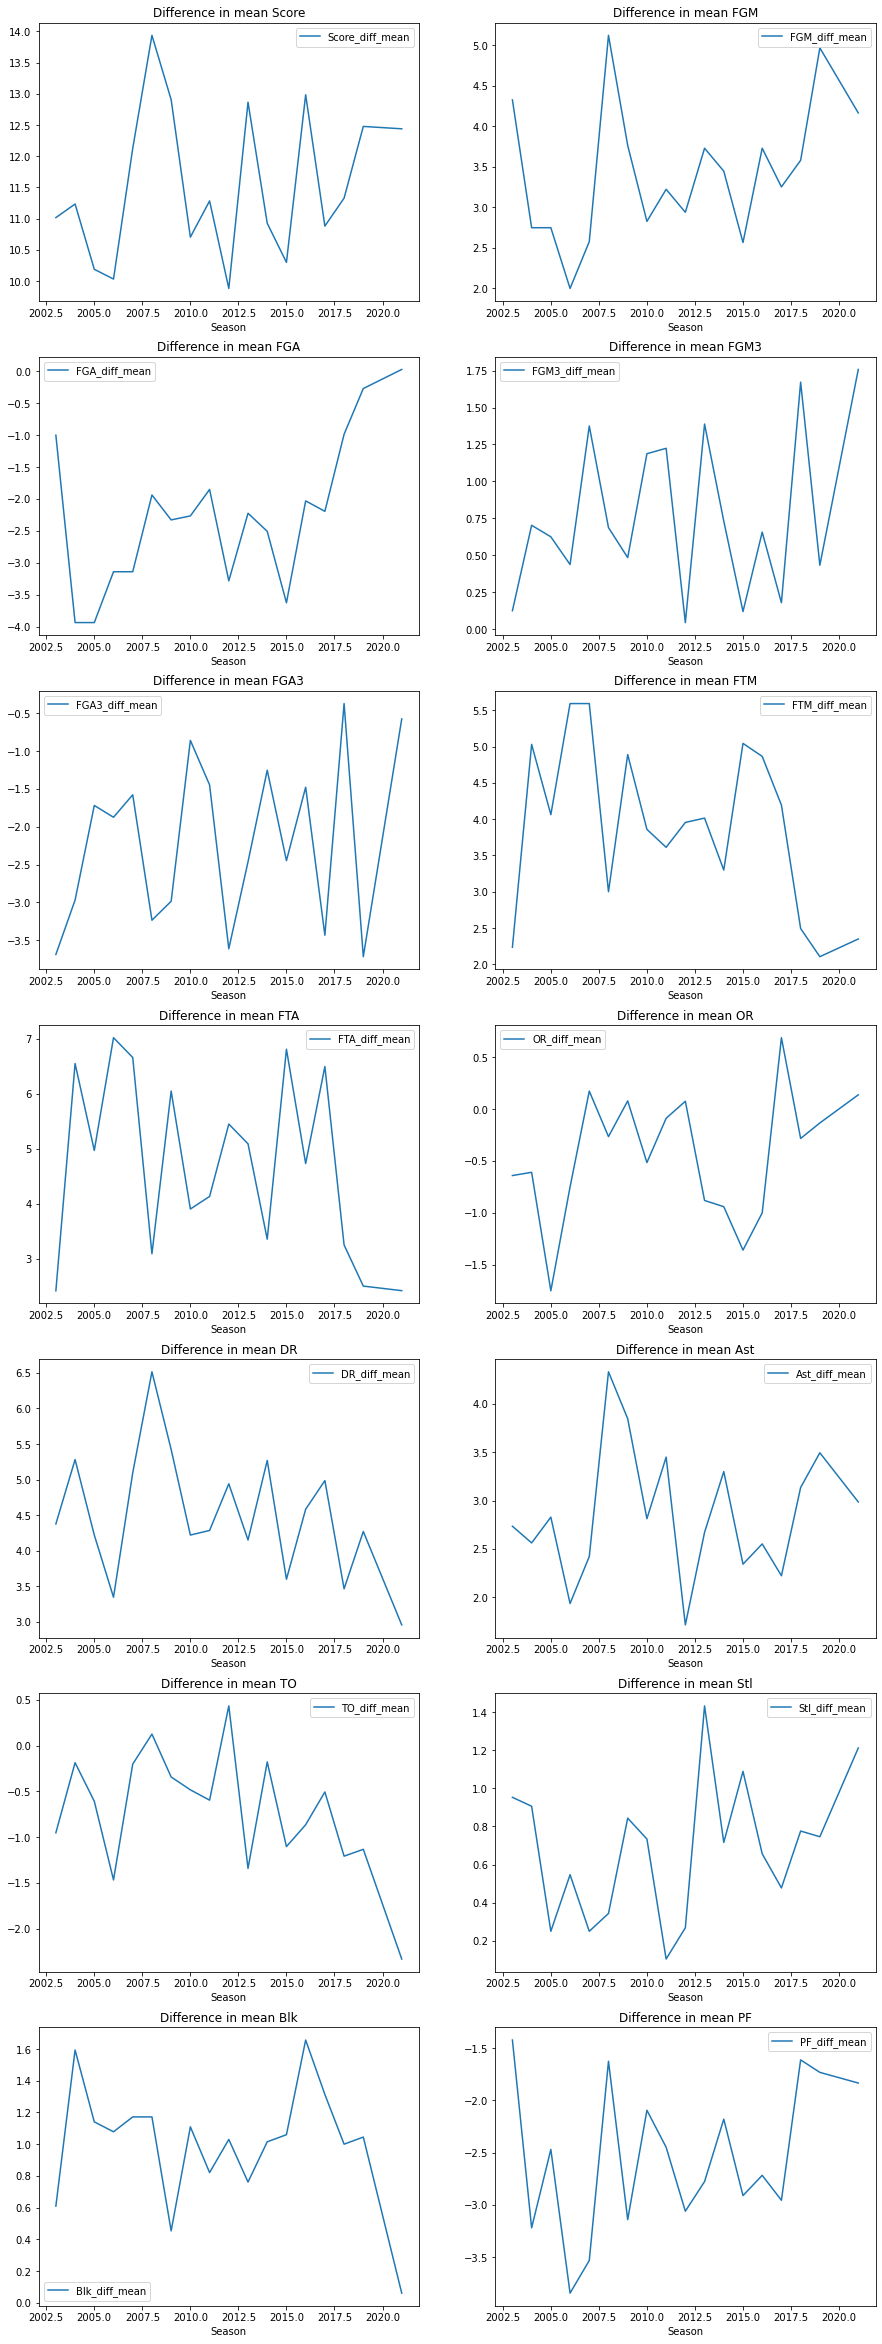

In [54]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].plot(title='Difference in mean '+name,ax=ax[i][j])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

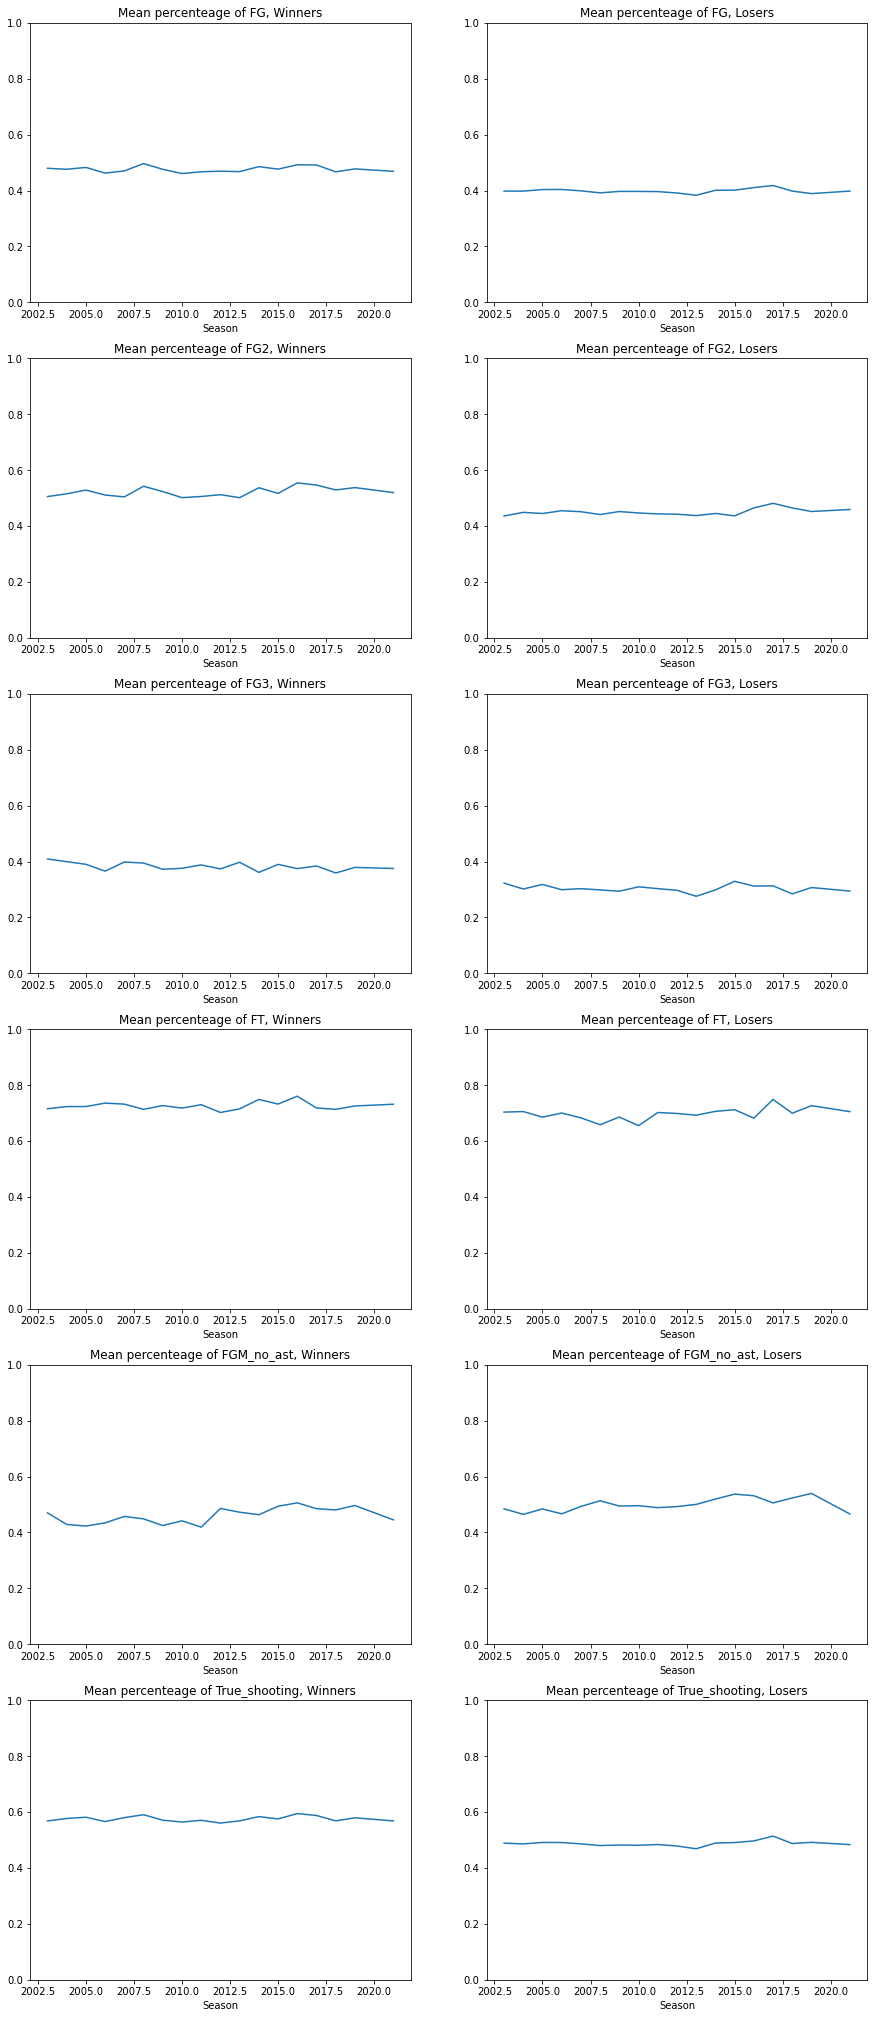

In [55]:
fig, ax= plt.subplots(6,2, figsize=(15, 6*6))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

## NCAAW

In [56]:
playoff_w = pd.read_csv('../input/womens-march-mania-2022/WDataFiles_Stage1/WNCAATourneyDetailedResults.csv')
print(f'Original shape: {playoff_w.shape}')
playoff_w = dm.process_details(playoff_w)
print(f'Processed shape: {playoff_w.shape}')
playoff_w.head()

Original shape: (693, 34)
Processed shape: (693, 136)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2010     138     3124      69     3201      55    N      0    28    57   
1    2010     138     3173      67     3395      66    N      0    23    59   
2    2010     138     3181      72     3214      37    H      0    26    57   
3    2010     138     3199      75     3256      61    H      0    25    63   
4    2010     138     3207      62     3265      42    N      0    24    68   

   ...  def_rating_diff  def_rating_advantage  shtg_opportunity_diff  \
0  ...       -20.676140                     0               0.030913   
1  ...        -0.215334                     0              -0.184841   
2  ...       -53.776636                     0               0.121743   
3  ...       -19.466753                     0               0.041465   
4  ...       -36.018841                     0               0.104012   

   shtg_opportunity_advantage  TO_perposs_diff  TO_perposs_advantage  \
0                           1        -0.095067                     0   
1                           0         0.111191                     1   
2                           1        -0.075094                     0   
3                           1         0.014127                     1   
4                           1        -0.027316                     0   

   impact_diff  impact_advantage  True_shooting_perc_diff  \
0     0.347280                 1                 0.088604   
1     0.217021                 1                 0.080610   
2     0.823529                 1                 0.224364   
3     0.282511                 1                 0.076698   
4     0.484663                 1                 0.123272   

   True_shooting_perc_advantage  
0                             1  
1                             1  
2                             1  
3                             1  
4                             1  

[5 rows x 136 columns]

In [57]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in playoff_w.columns if col not in not_sum]

summaries = playoff_w[to_sum].groupby(['Season']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season                                                                     
2010            49          96    73.111111             73            63   
2011            53          99    73.873016             75            63   
2012            57          96    73.888889             73            63   
2013            53         105    74.476190             74            63   
2014            55         106    77.079365             76            63   
2015            51         111    76.841270             77            63   
2016            48         101    77.111111             75            63   
2017            55         119    79.984127             77            63   
2018            61         140    82.460317             83            63   
2019            55         110    78.428571             78            63   
2021            52         102    74.476190             73            63   

        LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  ...  \
Season                                                                    ...   
2010            33          82    56.650794             57            63  ...   
2011            30          86    58.349206             60            63  ...   
2012            26          80    58.095238             59            63  ...   
2013            37          90    58.047619             57            63  ...   
2014            36         100    59.571429             60            63  ...   
2015            33          94    61.682540             64            63  ...   
2016            31          84    58.587302             58            63  ...   
2017            30          85    60.746032             62            63  ...   
2018            35          89    62.841270             63            63  ...   
2019            34          87    61.920635             62            63  ...   
2021            32          82    57.253968             59            63  ...   

        True_shooting_perc_diff_min  True_shooting_perc_diff_max  \
Season                                                             
2010                      -0.088941                     0.455548   
2011                      -0.111767                     0.366201   
2012                      -0.089394                     0.374133   
2013                      -0.041304                     0.355460   
2014                      -0.136821                     0.344841   
2015                      -0.140960                     0.456908   
2016                      -0.078457                     0.409555   
2017                      -0.126096                     0.486625   
2018                      -0.052781                     0.393221   
2019                      -0.084942                     0.314550   
2021                      -0.104017                     0.365240   

        True_shooting_perc_diff_mean  True_shooting_perc_diff_median  \
Season                                                                 
2010                        0.106005                        0.088604   
2011                        0.096989                        0.103508   
2012                        0.108675                        0.104739   
2013                        0.116272                        0.124190   
2014                        0.109649                        0.091445   
2015                        0.110425                        0.099213   
2016                        0.115754                        0.109984   
2017                        0.125015                        0.107639   
2018                        0.119983                        0.108564   
2019                        0.112278                        0.116032   
2021                        0.107470                        0.096224   

        True_shooting_perc_diff_count  True_shooting_perc_advantage_min  \
Season                                                              

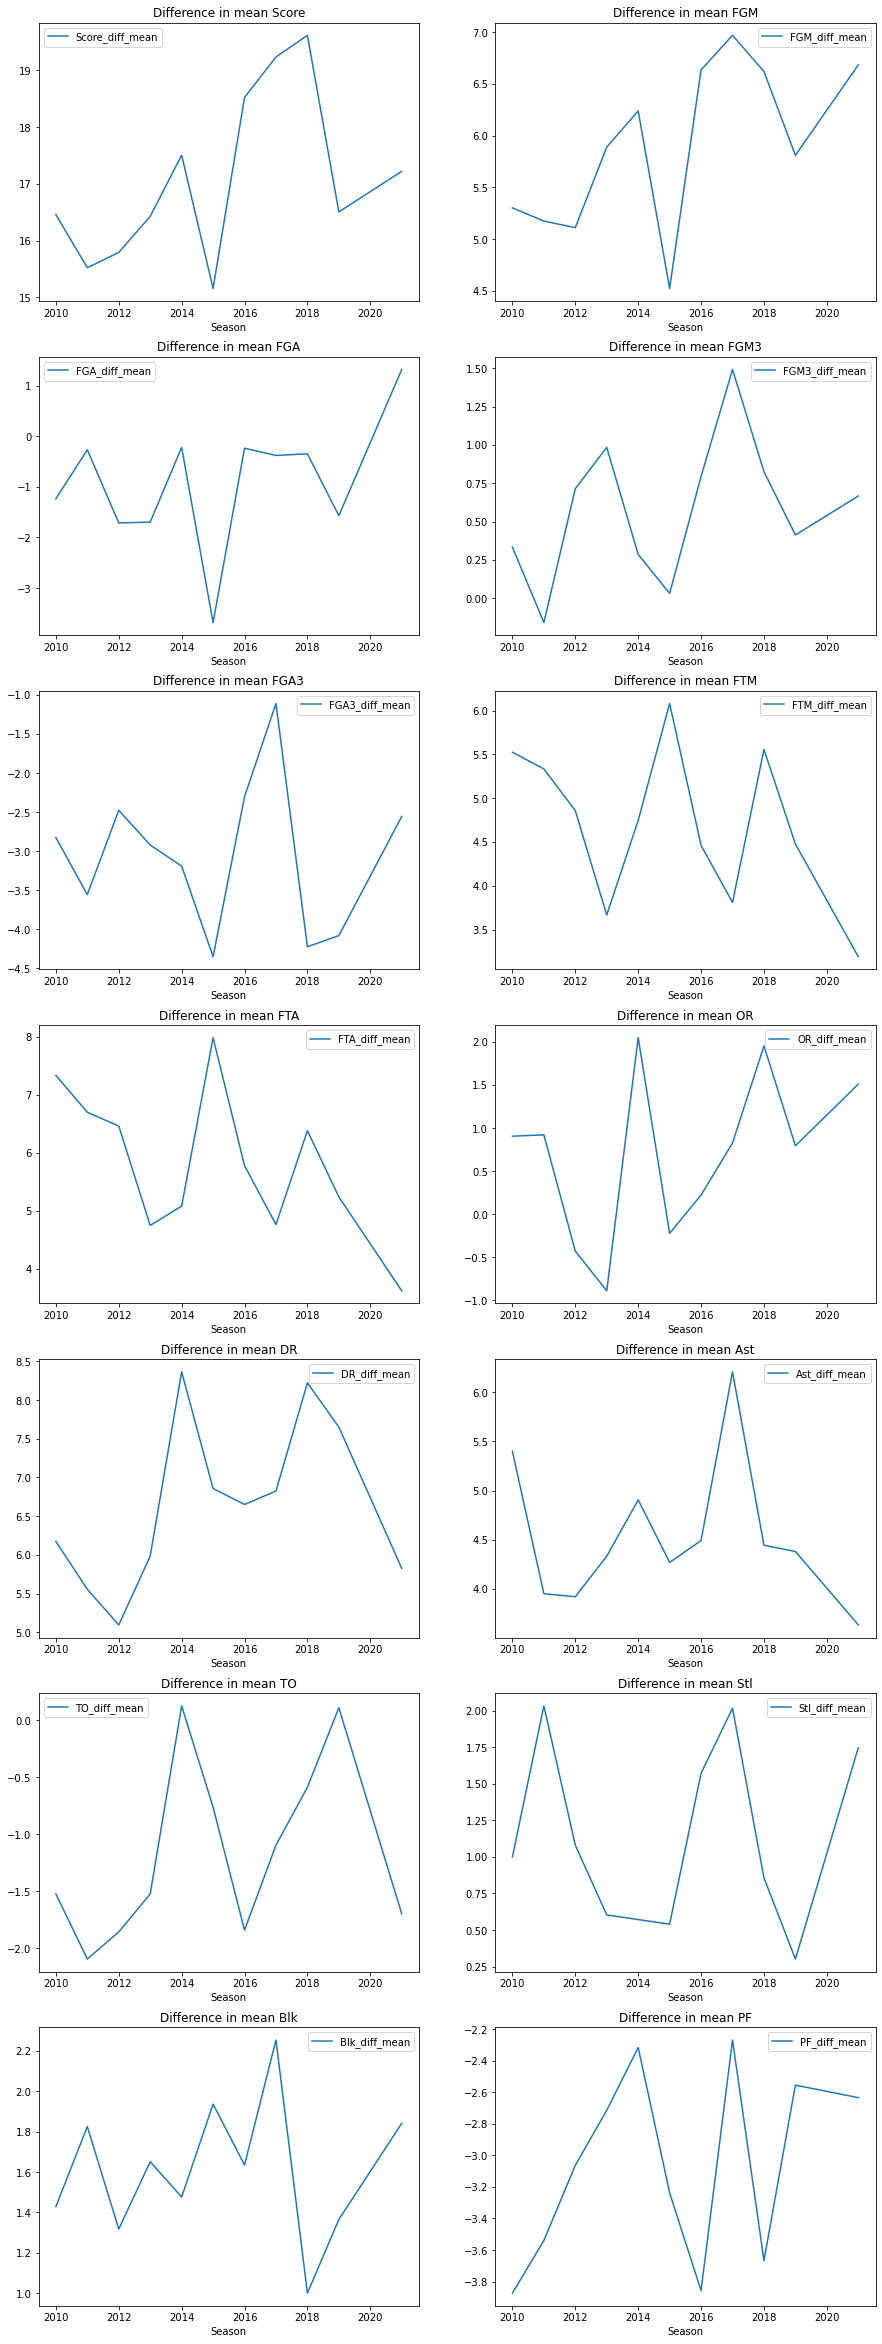

In [58]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].plot(title='Difference in mean '+name,ax=ax[i][j])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

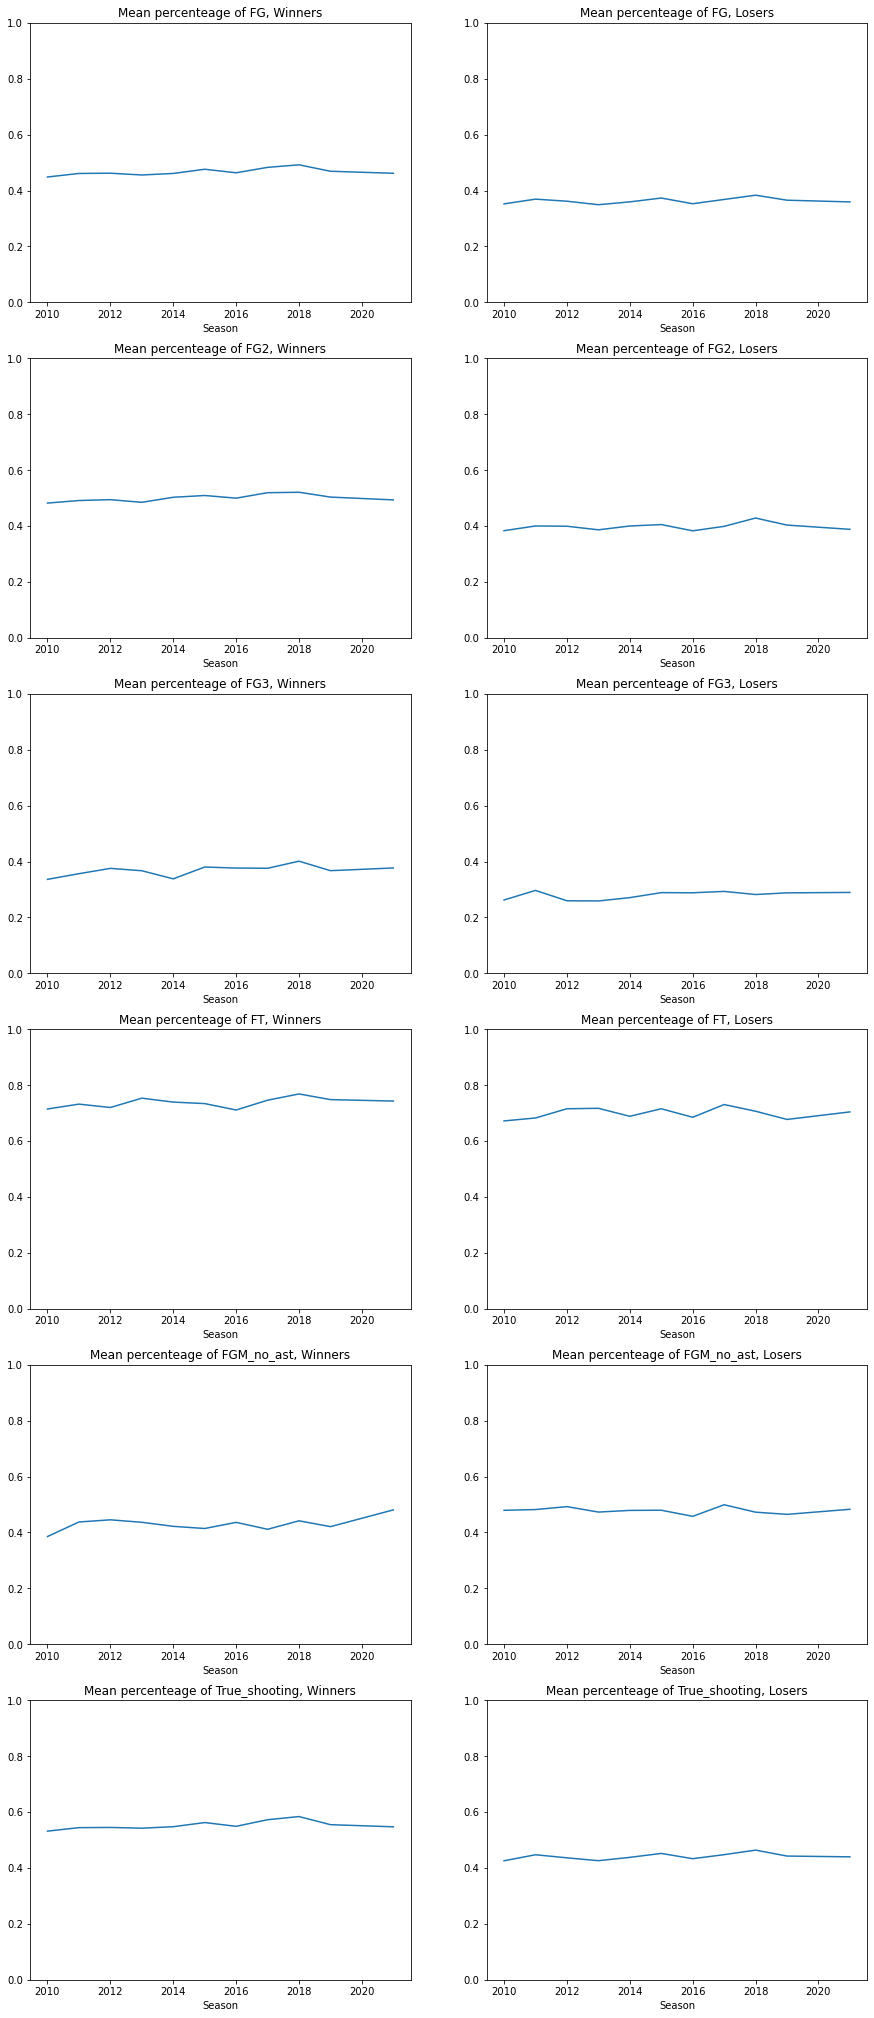

In [59]:
fig, ax= plt.subplots(6,2, figsize=(15, 6*6))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

# Putting things together

Here we make use of some functions made for the past competitions to create more boxscore stats

## NCAAM

In [60]:
reg_m = dm.full_stats(reg_season_m)
reg_m.head()

Season  TeamID        Ast  Ast_advantage  Ast_diff      Away       Blk  \
0    2003    1102  13.000000       0.714286  3.857143  0.107143  1.785714   
1    2003    1103  15.222222       0.444444 -0.259259  0.148148  2.333333   
2    2003    1104  12.107143       0.535714  0.428571  0.142857  3.785714   
3    2003    1105  14.538462       0.500000 -1.269231  0.076923  2.076923   
4    2003    1106  11.678571       0.500000 -0.107143  0.178571  3.142857   

   Blk_advantage  Blk_diff         DR  ...  shtg_opportunity_advantage  \
0       0.607143  0.214286  16.821429  ...                    0.250000   
1       0.481481 -0.518519  19.925926  ...                    0.444444   
2       0.500000  0.607143  23.928571  ...                    0.750000   
3       0.230769 -2.115385  23.115385  ...                    0.500000   
4       0.500000 -0.035714  23.857143  ...                    0.464286   

   shtg_opportunity_diff  FGM_perc  FGM2_perc  FGM3_perc   FT_perc  \
0              -0.066878  0.481149   0.596987   0.375643  0.651357   
1               0.005374  0.486074   0.545624   0.338710  0.736390   
2               0.047606  0.420362   0.473684   0.320144  0.709898   
3               0.006750  0.395755   0.411488   0.364815  0.705986   
4              -0.013046  0.423773   0.460152   0.346154  0.646421   

   FGM_no_ast_perc  True_shooting_perc  Opp_True_shooting_perc  OT_win_perc  
0         0.320896            0.597454                0.552622         0.00  
1         0.439291            0.578131                0.578701         0.75  
2         0.496285            0.516136                0.510662         1.00  
3         0.403785            0.498451                0.542882         0.00  
4         0.501524            0.503969                0.499405         1.00  

[5 rows x 98 columns]

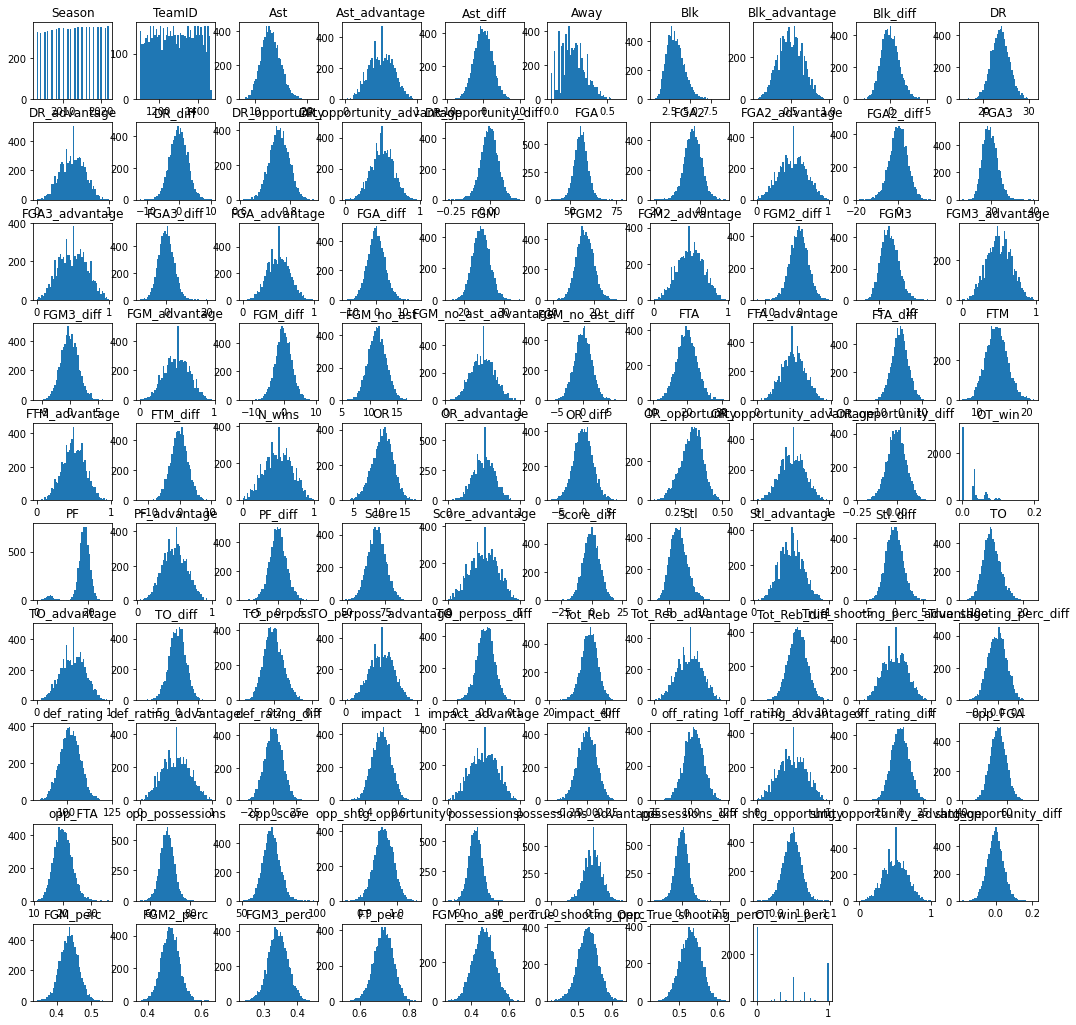

In [61]:
reg_m.hist(bins=50, figsize=(18, 18), grid=False)
plt.show()

In [62]:
summary_reg = reg_m.groupby('Season')[[col for col in reg_m if col not in ['TeamID', 'Season']]].agg(['mean', 'max', 'min'])
summary_reg.columns = ['_'.join(col).strip() for col in summary_reg.columns.values]
summary_reg

Ast_mean    Ast_max   Ast_min  Ast_advantage_mean  Ast_advantage_max  \
Season                                                                          
2003    13.552585  18.892857  9.115385            0.497202           0.966667   
2004    13.484355  18.896552  8.000000            0.497057           0.900000   
2005    13.443881  19.354839  7.642857            0.496154           0.903226   
2006    13.458402  17.965517  8.481481            0.495861           0.903226   
2007    13.327296  18.724138  8.724138            0.496458           0.875000   
2008    13.212550  18.935484  8.343750            0.494985           0.911765   
2009    12.927176  18.294118  8.870968            0.496744           0.878788   
2010    12.810519  19.642857  8.677419            0.496023           0.937500   
2011    12.792470  17.882353  8.642857            0.496406           0.900000   
2012    12.688739  19.343750  8.133333            0.496599           0.935484   
2013    12.597379  17.727273  8.068966            0.496684           0.888889   
2014    12.503598  18.545455  7.612903            0.496562           0.903226   
2015    12.361373  17.742857  7.518519            0.496778           0.909091   
2016    13.198083  20.558824  8.033333            0.496761           0.941176   
2017    13.298661  21.484848  8.968750            0.496930           0.939394   
2018    13.425570  19.333333  8.800000            0.496392           0.906250   
2019    13.151698  19.600000  9.354839            0.496859           0.966667   
2020    12.792752  17.843750  8.103448            0.498243           0.903226   
2021    13.001809  19.000000  9.315789            0.495088           0.923077   
2022    12.792156  20.090909  8.125000            0.497361           1.000000   

        Ast_advantage_min  Ast_diff_mean  Ast_diff_max  Ast_diff_min  \
Season                                                                 
2003             0.040000      -0.052070      7.233333     -8.200000   
2004             0.107143      -0.047083      6.166667     -7.178571   
2005             0.000000      -0.060888      7.032258     -9.500000   
2006             0.037037      -0.068230      5.696970     -9.370370   
2007             0.103448      -0.062522      6.838710     -6.100000   
2008             0.000000      -0.084815      7.030303     -8.700000   
2009             0.068966      -0.059245      6.500000     -6.965517   
2010             0.000000      -0.072266      6.766667     -9.580645   
2011             0.038462      -0.060864      6.676471     -8.000000   
2012             0.071429      -0.061778      7.096774     -6.928571   
2013             0.034483      -0.056042      7.666667     -7.379310   
2014             0.111111      -0.057719      6.451613     -6.296296   
2015             0.093750      -0.055148      7.233333     -7.444444   
2016             0.074074      -0.054422      9.941176     -6.965517   
2017             0.103448      -0.052160      8.484848     -8.103448   
2018             0.033333      -0.063498      7.750000     -8.233333   
2019             0.032258      -0.050929      8.393939     -8.935484   
2020             0.032258      -0.030401      6.548387     -8.866667   
2021             0.000000      -0.104922      8.130435     -9.444444   
2022             0.100000      -0.047500      9.428571     -9.250000   

        Away_mean  ...  FGM_no_ast_perc_min  True_shooting_perc_mean  \
Season             ...                                                 
2003     0.193011  ...             0.277496                 0.528913   
2004     0.196410  ...             0.299213                 0.526301   
2005     0.192483  ...             0.296736                 0.526854   
2006     0.195876  ...             0.288433                 0.528507   
2007     0.193596  ...             0.278689                 0.532368   
2008     0.197546  ...             0.278660                 0.531415   
2009     0.198742  ...             0.298309                 0.524

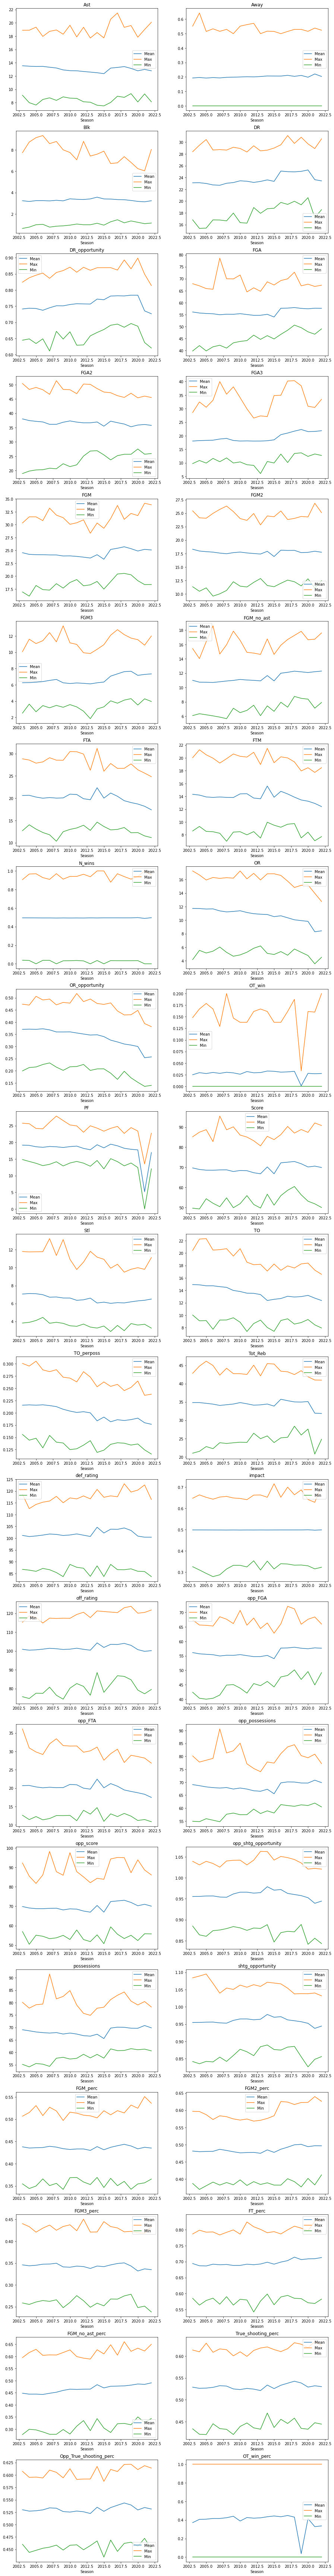

In [63]:
stats = [col.split('_mean')[0] for col in summary_reg if '_mean' in col and 'diff_' not in col and 'advantage' not in col]

fig, ax= plt.subplots(int(np.ceil(len(stats)/2)),2, figsize=(15, 6*int(np.ceil(len(stats)/2))))

i, j = 0, 0

for col in stats:
    summary_reg[[col+'_mean', col+'_max', col+'_min']].plot(title=col,ax=ax[i][j])
    ax[i][j].legend(labels=['Mean', 'Max', 'Min'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

plt.show()

## NCAAW

In [64]:
reg_w = dm.full_stats(reg_season_w)
reg_w.head()

Season  TeamID        Ast  Ast_advantage  Ast_diff      Away       Blk  \
0    2010    3102  10.250000       0.035714 -9.285714  0.000000  0.642857   
1    2010    3103  13.433333       0.566667  1.733333  0.200000  2.400000   
2    2010    3104  13.103448       0.620690  0.586207  0.172414  2.931034   
3    2010    3105   9.740741       0.185185 -3.740741  0.259259  5.148148   
4    2010    3106  11.482759       0.655172  1.965517  0.172414  4.482759   

   Blk_advantage  Blk_diff         DR  ...  shtg_opportunity_advantage  \
0       0.107143 -4.392857  19.535714  ...                    0.357143   
1       0.200000 -1.400000  23.566667  ...                    0.500000   
2       0.413793 -0.655172  25.931034  ...                    0.517241   
3       0.555556  0.740741  23.370370  ...                    0.259259   
4       0.551724  0.517241  24.758621  ...                    0.448276   

   shtg_opportunity_diff  FGM_perc  FGM2_perc  FGM3_perc   FT_perc  \
0              -0.053485  0.360215   0.393064   0.284444  0.678378   
1               0.010696  0.402292   0.427570   0.315508  0.705782   
2              -0.004036  0.398112   0.430131   0.295082  0.616016   
3              -0.079451  0.400583   0.423146   0.307116  0.698630   
4               0.014346  0.348081   0.362986   0.280576  0.647989   

   FGM_no_ast_perc  True_shooting_perc  Opp_True_shooting_perc  OT_win_perc  
0         0.464552            0.436063                0.565536          0.0  
1         0.395802            0.481856                0.466523          1.0  
2         0.470014            0.457604                0.474696          0.0  
3         0.521818            0.486922                0.471254          0.0  
4         0.377570            0.428090                0.453141          1.0  

[5 rows x 98 columns]

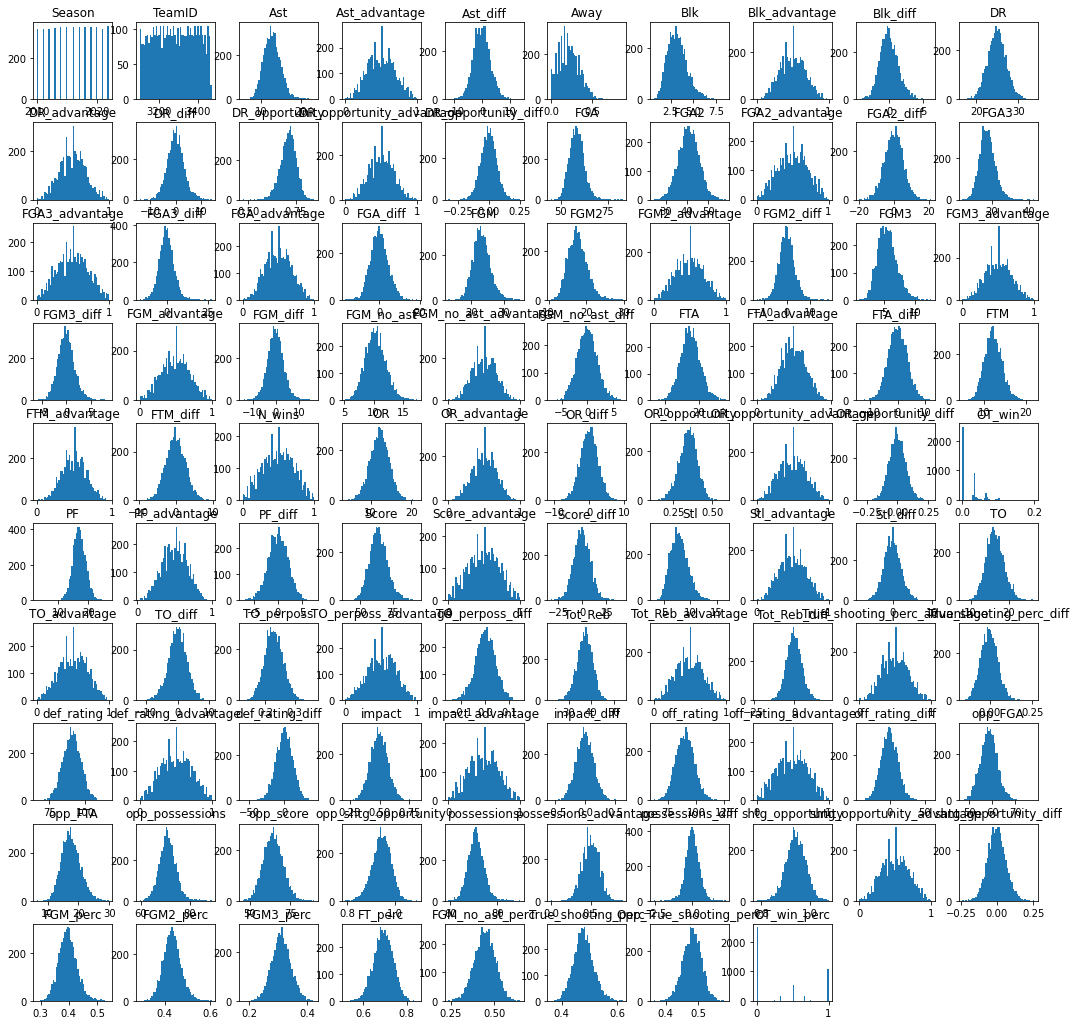

In [65]:
reg_w.hist(bins=50, figsize=(18, 18), grid=False)
plt.show()

In [66]:
summary_reg = reg_w.groupby('Season')[[col for col in reg_w if col not in ['TeamID', 'Season']]].agg(['mean', 'max', 'min'])
summary_reg.columns = ['_'.join(col).strip() for col in summary_reg.columns.values]
summary_reg

Ast_mean    Ast_max   Ast_min  Ast_advantage_mean  Ast_advantage_max  \
Season                                                                          
2010    12.684878  19.468750  6.142857            0.495270           1.000000   
2011    12.761776  20.387097  7.580645            0.495840           0.969697   
2012    12.475294  19.258065  7.366667            0.496397           0.967742   
2013    12.621095  21.843750  5.466667            0.495964           0.933333   
2014    13.245258  21.558824  6.400000            0.496532           0.968750   
2015    12.819985  21.636364  6.714286            0.496480           1.000000   
2016    12.868026  21.625000  7.222222            0.496689           1.000000   
2017    13.127421  23.343750  7.379310            0.496196           1.000000   
2018    13.242014  22.625000  7.464286            0.495726           0.939394   
2019    13.111576  22.593750  8.250000            0.495869           0.937500   
2020    12.938021  22.133333  8.133333            0.497427           0.964286   
2021    12.871194  20.920000  7.619048            0.491626           1.000000   
2022    12.820818  19.956522  7.315789            0.492934           0.956522   

        Ast_advantage_min  Ast_diff_mean  Ast_diff_max  Ast_diff_min  \
Season                                                                 
2010             0.034483      -0.079888     10.718750     -9.285714   
2011             0.034483      -0.075875     10.484848     -9.750000   
2012             0.068966      -0.067266     10.303030     -8.629630   
2013             0.033333      -0.069604     10.750000     -9.862069   
2014             0.000000      -0.068645     12.294118     -9.884615   
2015             0.068966      -0.067311     13.090909     -7.703704   
2016             0.035714      -0.065693     11.656250     -9.892857   
2017             0.066667      -0.071951     13.000000     -8.666667   
2018             0.035714      -0.080188     12.281250     -9.964286   
2019             0.062500      -0.074074     13.187500     -8.928571   
2020             0.076923      -0.048688     13.600000     -7.800000   
2021             0.000000      -0.180776     11.185185     -9.300000   
2022             0.000000      -0.124953      7.772727    -12.214286   

        Away_mean  ...  FGM_no_ast_perc_min  True_shooting_perc_mean  \
Season             ...                                                 
2010     0.207996  ...             0.241329                 0.477440   
2011     0.217993  ...             0.233677                 0.475982   
2012     0.225777  ...             0.259305                 0.467987   
2013     0.230616  ...             0.270636                 0.466137   
2014     0.230780  ...             0.264535                 0.487570   
2015     0.211054  ...             0.262463                 0.477468   
2016     0.222343  ...             0.289398                 0.477905   
2017     0.211359  ...             0.287214                 0.482041   
2018     0.224838  ...             0.241525                 0.486647   
2019     0.221435  ...             0.257426                 0.484918   
2020     0.217179  ...             0.278708                 0.481904   
2021     0.227634  ...             0.242424                 0.484654   
2022     0.215453  ...             0.259677                 0.482181   

        True_shooting_perc_max  True_shooting_perc_min  \
Season                                                   
2010                  0.585240                0.374396   
2011                  0.587178                0.397365   
2012                  0.566310                0.369629   
2013                  0.582489                0.360428   
2014                  0.591427                0.384488   
2015                  0.621771                0.401180   
2016                  0.606461                0.376044   
2017                  0.612840                0.391114   
2018                  0.612969                0.402

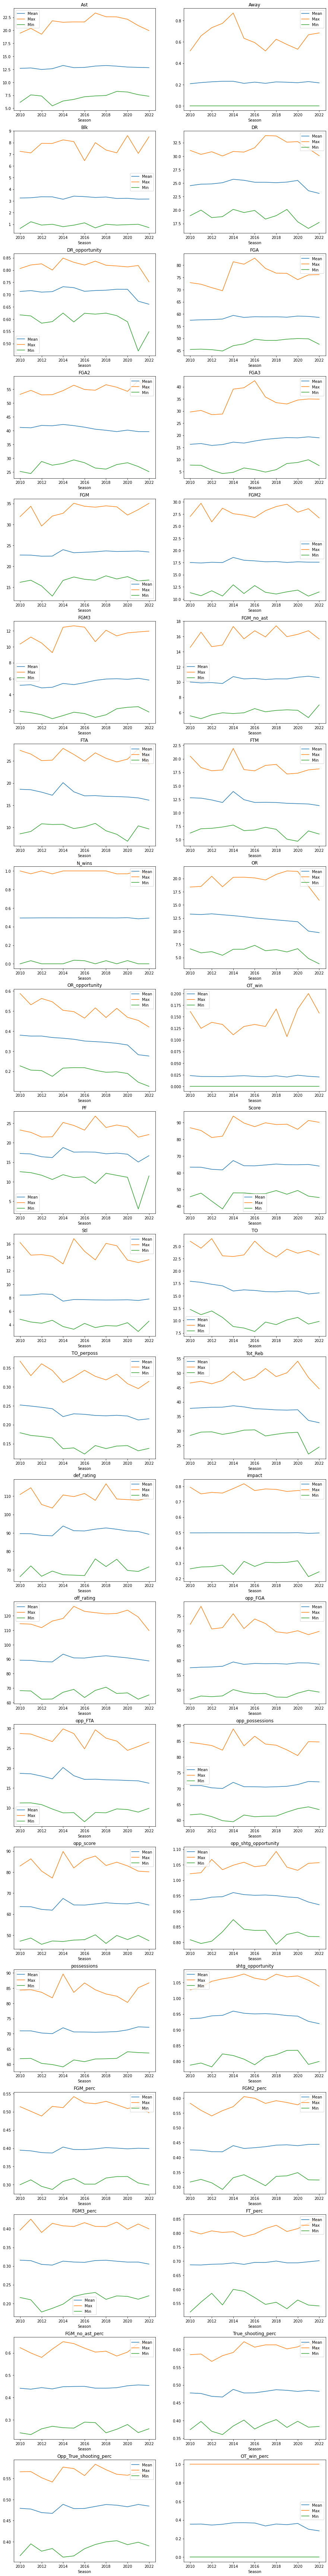

In [67]:
stats = [col.split('_mean')[0] for col in summary_reg if '_mean' in col and 'diff_' not in col and 'advantage' not in col]

fig, ax= plt.subplots(int(np.ceil(len(stats)/2)),2, figsize=(15, 6*int(np.ceil(len(stats)/2))))

i, j = 0, 0

for col in stats:
    summary_reg[[col+'_mean', col+'_max', col+'_min']].plot(title=col,ax=ax[i][j])
    ax[i][j].legend(labels=['Mean', 'Max', 'Min'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

plt.show()

# Training data

To make the training data we start from the datasets of the previous section and we make sure each game is present twice, once as is and once with the 2 teams in opposite order. This doubles the training instances and allows the model to train on recognizing losses as well (the original data only shows the wins).

Each row will be a game and the features are going to be the statistics of each team during the corresponding season.

We also add a few more features, like the Seed and the Round the game will take place

## NCAAM

In [68]:
def make_training_data(details, targets):
    tmp = details.copy()
    tmp.columns = ['Season', 'Team1'] + \
                ['T1_'+col for col in tmp.columns if col not in ['Season', 'TeamID']]
    total = pd.merge(targets, tmp, on=['Season', 'Team1'], how='left')

    tmp = details.copy()
    tmp.columns = ['Season', 'Team2'] + \
                ['T2_'+col for col in tmp.columns if col not in ['Season', 'TeamID']]
    total = pd.merge(total, tmp, on=['Season', 'Team2'], how='left')
    
    if total.isnull().any().any():
        raise ValueError('Something went wrong')
        
    stats = [col[3:] for col in total.columns if 'T1_' in col and 'region' not in col]

    for stat in stats:
        total['delta_'+stat] = total['T1_'+stat] - total['T2_'+stat]
        
    try:
        total['delta_off_edge'] = total['T1_off_rating'] - total['T2_def_rating']
        total['delta_def_edge'] = total['T2_off_rating'] - total['T1_def_rating']
    except KeyError:
        pass
        
    return total


def add_seed(seed_location, total):
    seed_data = pd.read_csv(seed_location)
    seed_data['region'] = seed_data['Seed'].apply(lambda x: x[0])
    seed_data['Seed'] = seed_data['Seed'].apply(lambda x: int(x[1:3]))
    total = pd.merge(total, seed_data, how='left', on=['TeamID', 'Season'])
    return total


def add_stage(data):
    data.loc[(data.T1_region == 'W') & (data.T2_region == 'X'), 'stage'] = 'finalfour'
    data.loc[(data.T1_region == 'X') & (data.T2_region == 'W'), 'stage'] = 'finalfour'
    data.loc[(data.T1_region == 'Y') & (data.T2_region == 'Z'), 'stage'] = 'finalfour'
    data.loc[(data.T1_region == 'Z') & (data.T2_region == 'Y'), 'stage'] = 'finalfour'
    data.loc[(data.T1_region == 'W') & (data.T2_region.isin(['Y', 'Z'])), 'stage'] = 'final'
    data.loc[(data.T1_region == 'X') & (data.T2_region.isin(['Y', 'Z'])), 'stage'] = 'final'
    data.loc[(data.T1_region == 'Y') & (data.T2_region.isin(['W', 'X'])), 'stage'] = 'final'
    data.loc[(data.T1_region == 'Z') & (data.T2_region.isin(['W', 'X'])), 'stage'] = 'final'
    data.loc[(data.T1_region == data.T2_region) & (data.T1_Seed + data.T2_Seed == 17), 'stage'] = 'Round1'
    
    fil = data.stage.isna()
    
    data.loc[fil & (data.T1_Seed.isin([1, 16])) & (data.T2_Seed.isin([8, 9])), 'stage'] = 'Round2'
    data.loc[fil & (data.T1_Seed.isin([8, 9])) & (data.T2_Seed.isin([1, 16])), 'stage'] = 'Round2'
    data.loc[fil & (data.T1_Seed.isin([5, 12])) & (data.T2_Seed.isin([4, 13])), 'stage'] = 'Round2'
    data.loc[fil & (data.T1_Seed.isin([4, 13])) & (data.T2_Seed.isin([5, 12])), 'stage'] = 'Round2'
    data.loc[fil & (data.T1_Seed.isin([6, 11])) & (data.T2_Seed.isin([3, 14])), 'stage'] = 'Round2'
    data.loc[fil & (data.T1_Seed.isin([3, 14])) & (data.T2_Seed.isin([6, 11])), 'stage'] = 'Round2'
    data.loc[fil & (data.T1_Seed.isin([7, 10])) & (data.T2_Seed.isin([2, 15])), 'stage'] = 'Round2'
    data.loc[fil & (data.T1_Seed.isin([2, 15])) & (data.T2_Seed.isin([7, 10])), 'stage'] = 'Round2'
    
    fil = data.stage.isna()
    
    data.loc[fil & (data.T1_Seed.isin([1, 16, 8, 9])) & (data.T2_Seed.isin([4, 5, 12, 13])), 'stage'] = 'Round3'
    data.loc[fil & (data.T1_Seed.isin([4, 5, 12, 13])) & (data.T2_Seed.isin([1, 16, 8, 9])), 'stage'] = 'Round3'
    data.loc[fil & (data.T1_Seed.isin([3, 6, 11, 14])) & (data.T2_Seed.isin([2, 7, 10, 15])), 'stage'] = 'Round3'
    data.loc[fil & (data.T1_Seed.isin([2, 7, 10, 15])) & (data.T2_Seed.isin([3, 6, 11, 14])), 'stage'] = 'Round3'
    
    fil = data.stage.isna()
    
    data.loc[fil & (data.T1_Seed.isin([1, 16, 8, 9, 4, 5, 12, 13])) & 
             (data.T2_Seed.isin([3, 6, 11, 14, 2, 7, 10, 15])), 'stage'] = 'Round4'
    data.loc[fil & (data.T1_Seed.isin([3, 6, 11, 14, 2, 7, 10, 15])) & 
             (data.T2_Seed.isin([1, 16, 8, 9, 4, 5, 12, 13])), 'stage'] = 'Round4'
    
    data.loc[data.stage.isna(), 'stage'] = 'impossible'
    
    #data = pd.get_dummies(data, columns=['stage'])
    
    del data['T1_region']
    del data['T2_region']
    
    return data


def make_teams_target(data, league):
    if league == 'men':
        limit = 2003
    else:
        limit = 2010

    df = data[data.Season >= limit].copy()

    df['Team1'] = np.where((df.WTeamID < df.LTeamID), df.WTeamID, df.LTeamID)
    df['Team2'] = np.where((df.WTeamID > df.LTeamID), df.WTeamID, df.LTeamID)
    df['target'] = np.where((df['WTeamID'] < df['LTeamID']),1,0)
    df['target_points'] = np.where((df['WTeamID'] < df['LTeamID']),df.WScore - df.LScore,df.LScore - df.WScore)
    df.loc[df.WLoc == 'N', 'LLoc'] = 'N'
    df.loc[df.WLoc == 'H', 'LLoc'] = 'A'
    df.loc[df.WLoc == 'A', 'LLoc'] = 'H'
    df['T1_Loc'] = np.where((df.WTeamID < df.LTeamID), df.WLoc, df.LLoc)
    df['T2_Loc'] = np.where((df.WTeamID > df.LTeamID), df.WLoc, df.LLoc)
    df['T1_Loc'] = df['T1_Loc'].map({'H': 1, 'A': -1, 'N': 0})
    df['T2_Loc'] = df['T2_Loc'].map({'H': 1, 'A': -1, 'N': 0})

    reverse = data[data.Season >= limit].copy()
    reverse['Team1'] = np.where((reverse.WTeamID > reverse.LTeamID), reverse.WTeamID, reverse.LTeamID)
    reverse['Team2'] = np.where((reverse.WTeamID < reverse.LTeamID), reverse.WTeamID, reverse.LTeamID)
    reverse['target'] = np.where((reverse['WTeamID'] > reverse['LTeamID']),1,0)
    reverse['target_points'] = np.where((reverse['WTeamID'] > reverse['LTeamID']),
                                        reverse.WScore - reverse.LScore,
                                        reverse.LScore - reverse.WScore)
    reverse.loc[reverse.WLoc == 'N', 'LLoc'] = 'N'
    reverse.loc[reverse.WLoc == 'H', 'LLoc'] = 'A'
    reverse.loc[reverse.WLoc == 'A', 'LLoc'] = 'H'
    reverse['T1_Loc'] = np.where((reverse.WTeamID > reverse.LTeamID), reverse.WLoc, reverse.LLoc)
    reverse['T2_Loc'] = np.where((reverse.WTeamID < reverse.LTeamID), reverse.WLoc, reverse.LLoc)
    reverse['T1_Loc'] = reverse['T1_Loc'].map({'H': 1, 'A': -1, 'N': 0})
    reverse['T2_Loc'] = reverse['T2_Loc'].map({'H': 1, 'A': -1, 'N': 0})
    
    df = pd.concat([df, reverse], ignore_index=True)

    to_drop = ['WScore','WTeamID', 'LTeamID', 'LScore', 'WLoc', 'LLoc', 'NumOT']
    for col in to_drop:
        del df[col]
    
    df.loc[:,'ID'] = df.Season.astype(str) + '_' + df.Team1.astype(str) + '_' + df.Team2.astype(str)
    return df


def prepare_data(league):
    save_loc = 'processed_data/' + league + '/'

    if league == 'women':
        regular_season = '../input/womens-march-mania-2022/WDataFiles_Stage1/WRegularSeasonDetailedResults.csv'
        playoff = '../input/womens-march-mania-2022/WDataFiles_Stage1/WNCAATourneyDetailedResults.csv'
        playoff_compact = '../input/womens-march-mania-2022/WDataFiles_Stage1/WNCAATourneyCompactResults.csv'
        seed = '../input/womens-march-mania-2022/WDataFiles_Stage1/WNCAATourneySeeds.csv'
        save_loc = 'data/processed_women/'
    else:
        regular_season = '../input/mens-march-mania-2022/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv'
        playoff = '../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv'
        playoff_compact = '../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyCompactResults.csv'
        seed = '../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneySeeds.csv'
        save_loc = 'data/processed_men/'
    
    # Season stats
    reg = pd.read_csv(regular_season)
    reg = dm.process_details(reg)
    regular_stats = dm.full_stats(reg)
    
    regular_stats = add_seed(seed, regular_stats)    
    
    # Target data generation 
    target_data = pd.read_csv(playoff_compact)
    target_data = make_teams_target(target_data, league)
    
    all_reg = make_training_data(regular_stats, target_data)
    all_reg = all_reg[all_reg.DayNum >= 136]  # remove pre tourney 
    all_reg = add_stage(all_reg)
    
    return all_reg

In [69]:
train_men = prepare_data('men')
train_men.head()

Season  DayNum  Team1  Team2  target  target_points  T1_Loc  T2_Loc  \
1    2003     136   1112   1436       1             29       0       0   
2    2003     136   1113   1272       1             13       0       0   
3    2003     136   1141   1166       1              6       0       0   
4    2003     136   1143   1301       1              2       0       0   
5    2003     136   1140   1163       0             -5       0       0   

               ID     T1_Ast  ...  delta_FGM3_perc  delta_FT_perc  \
1  2003_1112_1436  17.642857  ...         0.009777       0.043580   
2  2003_1113_1272  15.551724  ...        -0.030989       0.016122   
3  2003_1141_1166  15.620690  ...        -0.008284       0.072864   
4  2003_1143_1301  16.000000  ...         0.022444      -0.084846   
5  2003_1140_1163  13.419355  ...        -0.002412       0.078796   

   delta_FGM_no_ast_perc  delta_True_shooting_perc  \
1              -0.009639                  0.028845   
2               0.060936                  0.022049   
3              -0.000726                  0.022046   
4               0.017620                 -0.026393   
5              -0.029044                  0.026990   

   delta_Opp_True_shooting_perc  delta_OT_win_perc  delta_Seed  \
1                     -0.024112           0.500000       -15.0   
2                      0.042706           1.000000         3.0   
3                      0.027219          -1.000000         5.0   
4                     -0.017988          -0.666667        -1.0   
5                      0.036289          -1.000000         7.0   

   delta_off_edge  delta_def_edge   stage  
1       14.824796       10.852506  Round1  
2       15.831779        6.742637  Round1  
3       16.467359       12.440676  Round1  
4        4.199504        8.494016  Round1  
5       13.298151       12.714904  Round1  

[5 rows x 304 columns]

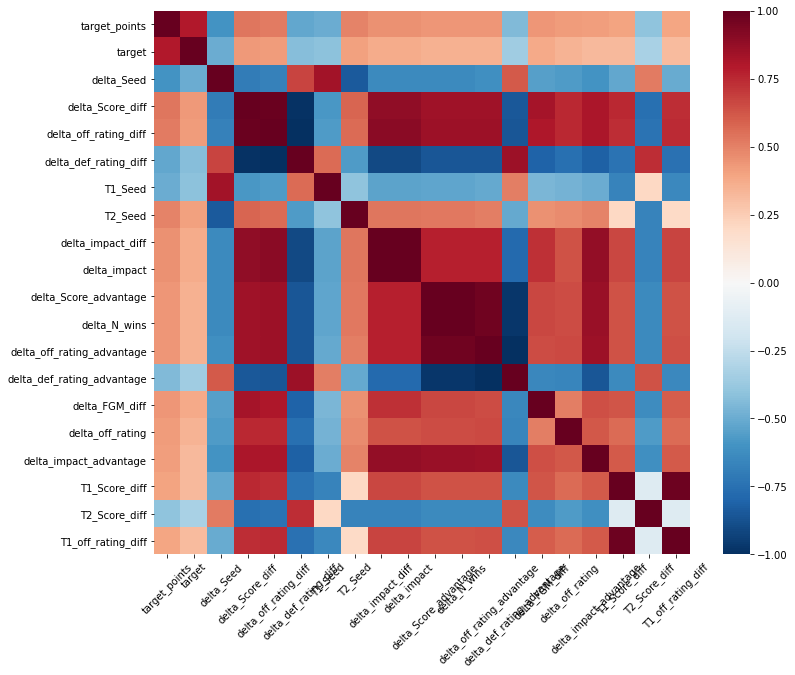

In [70]:
high_corr = tml.plot_correlations(train_men, target='target_points', limit=20)

                            delta_Seed  delta_Score_diff  \
delta_Seed                    1.000000         -0.695775   
delta_Score_diff             -0.695775          1.000000   
delta_off_rating_diff        -0.677842          0.985762   
delta_def_rating_diff         0.677842         -0.985762   
T1_Seed                       0.836558         -0.582057   
T2_Seed                      -0.836558          0.582057   
delta_impact_diff            -0.637736          0.886468   
delta_impact                 -0.637736          0.886468   
delta_Score_advantage        -0.633731          0.849694   
delta_N_wins                 -0.633731          0.849694   
delta_off_rating_advantage   -0.612191          0.848962   
delta_def_rating_advantage    0.612191         -0.848962   
delta_FGM_diff               -0.550287          0.835554   
delta_off_rating             -0.564721          0.756318   
delta_impact_advantage       -0.594120          0.815908   
T1_Score_diff                -0.523004  

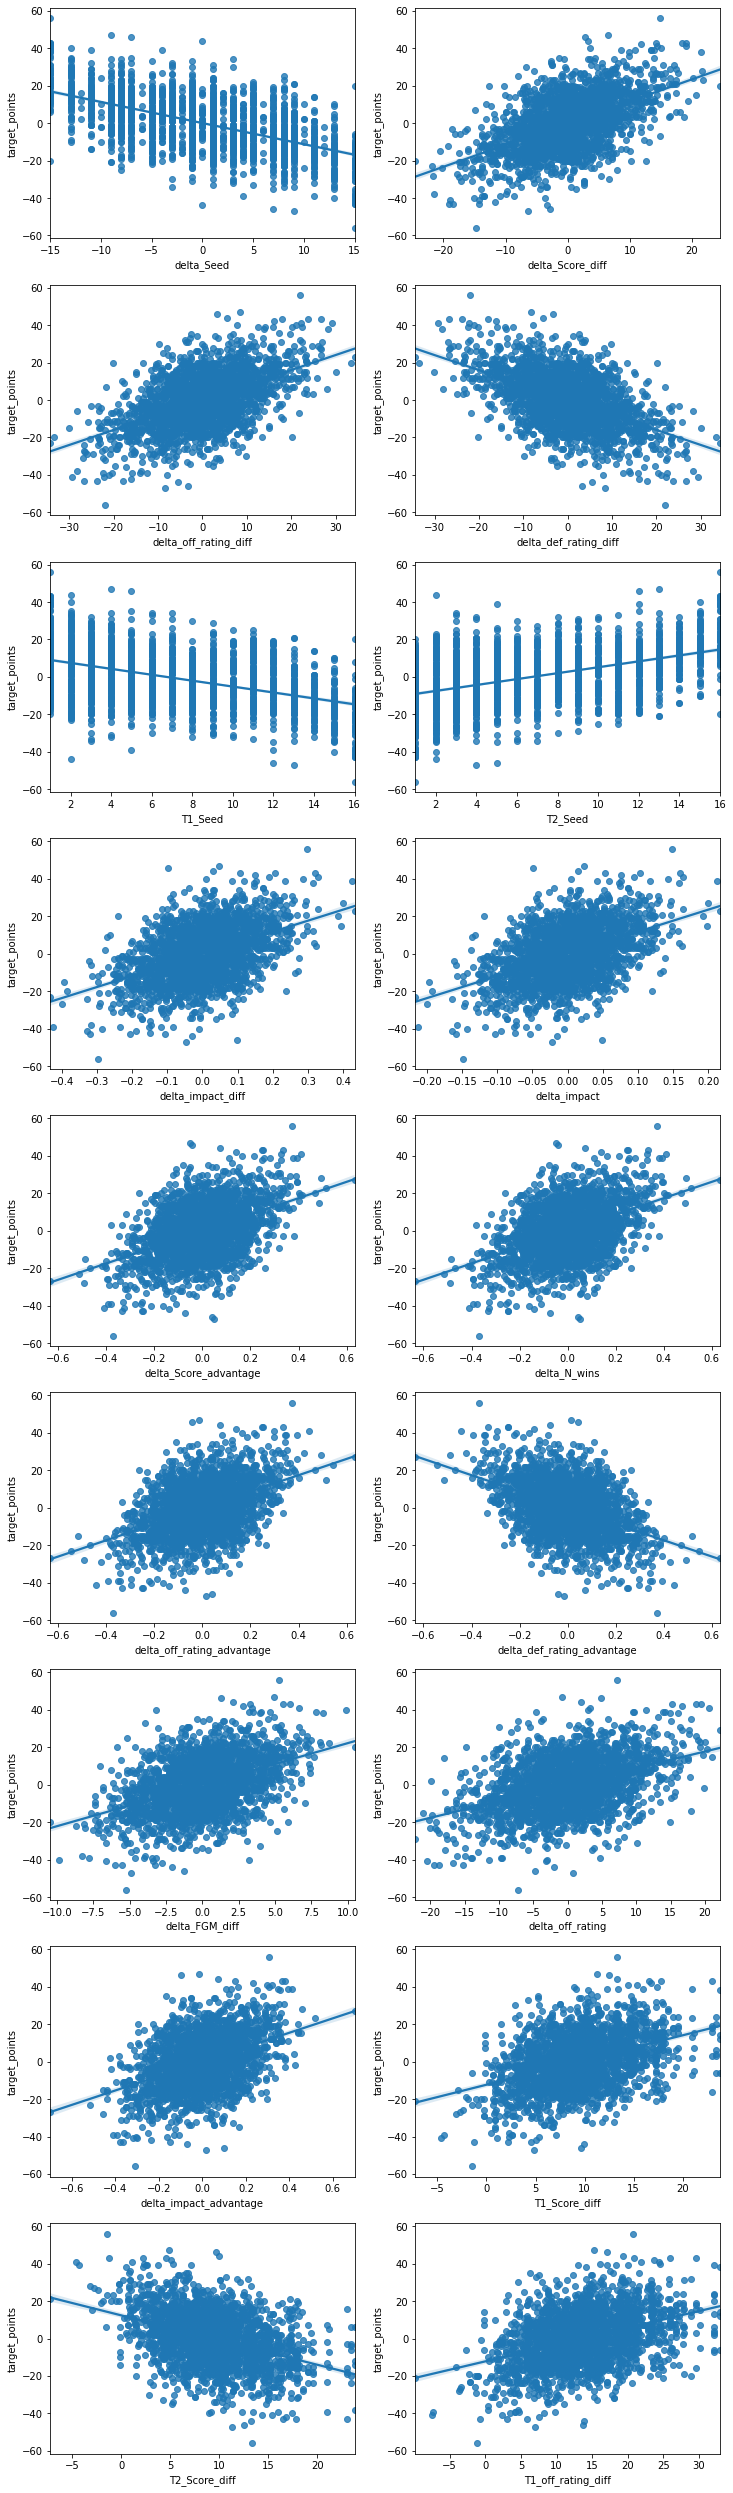

In [71]:
tml.corr_target(train_men, 'target_points', list(high_corr[2:].index), x_estimator=None)

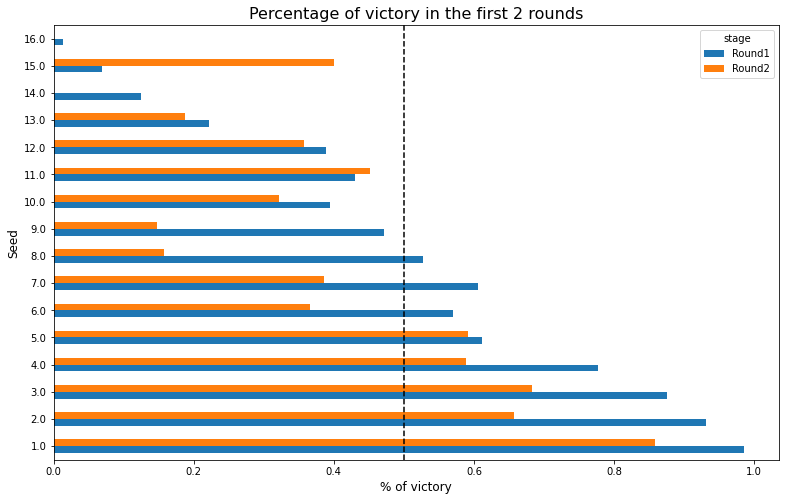

In [72]:
tmp = train_men[train_men.stage.isin(['Round1', 'Round2'])].groupby(['T1_Seed', 'stage'])['target'].agg('mean').unstack()

fig, ax = plt.subplots(1, 1, figsize=(13, 8))

tmp.plot(kind='barh', ax=ax)
ax.axvline(0.5, color='k', linestyle='--')
ax.set_title('Percentage of victory in the first 2 rounds', fontsize=16)
ax.set_xlabel('% of victory', fontsize=12)
ax.set_ylabel('Seed', fontsize=12)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count  mean  max  min  median        std
stage                                               
Round1       1150     0   56  -56       0  15.882949
Round2        576     0   34  -34       0  13.751964
Round3        288     0   39  -39       0  12.462907
Round4        144     0   24  -24       0  10.300384
final          36     0   17  -17       0  10.008568
finalfour      72     0   44  -44       0  14.412436
impossible      8     0    8   -8       0   5.398412

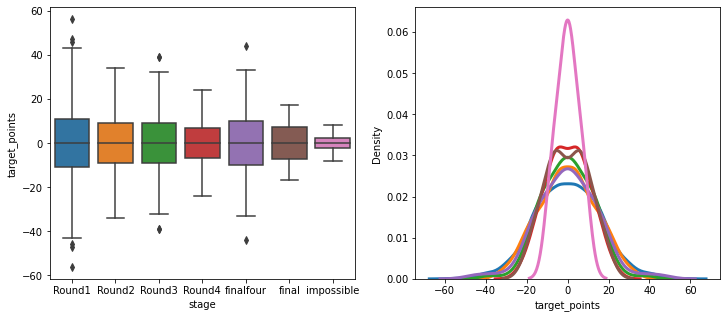

In [73]:
tml.segm_target(data=train_men, target='target_points', cat='stage')

## NCAAW

In [74]:
train_women = prepare_data('women')
train_women.head()

Season  DayNum  Team1  Team2  target  target_points  T1_Loc  T2_Loc  \
0    2010     138   3124   3201       1             14       0       0   
1    2010     138   3173   3395       1              1       0       0   
2    2010     138   3181   3214       1             35       1      -1   
3    2010     138   3199   3256       1             14       1      -1   
4    2010     138   3207   3265       1             20       0       0   

               ID     T1_Ast  ...  delta_FGM3_perc  delta_FT_perc  \
0  2010_3124_3201  14.687500  ...        -0.069679       0.017260   
1  2010_3173_3395  14.461538  ...        -0.044864      -0.048387   
2  2010_3181_3214  14.250000  ...         0.010987      -0.052773   
3  2010_3199_3256  15.333333  ...         0.062820       0.028984   
4  2010_3207_3265  15.866667  ...        -0.028334      -0.081570   

   delta_FGM_no_ast_perc  delta_True_shooting_perc  \
0               0.003363                  0.009230   
1               0.045179                 -0.008815   
2              -0.008327                  0.033501   
3              -0.046366                  0.030904   
4              -0.048658                 -0.039596   

   delta_Opp_True_shooting_perc  delta_OT_win_perc  delta_Seed  \
0                     -0.057436               -1.0        -9.0   
1                     -0.000125               -0.5        -1.0   
2                     -0.013925               -1.0       -13.0   
3                     -0.000103               -0.5       -11.0   
4                      0.066505                0.0        -7.0   

   delta_off_edge  delta_def_edge   stage  
0       15.506357       22.033034  Round1  
1       15.091164       16.370410  Round1  
2       18.300842       14.533827  Round1  
3       16.225874       16.129244  Round1  
4       11.551791       17.504158  Round1  

[5 rows x 304 columns]

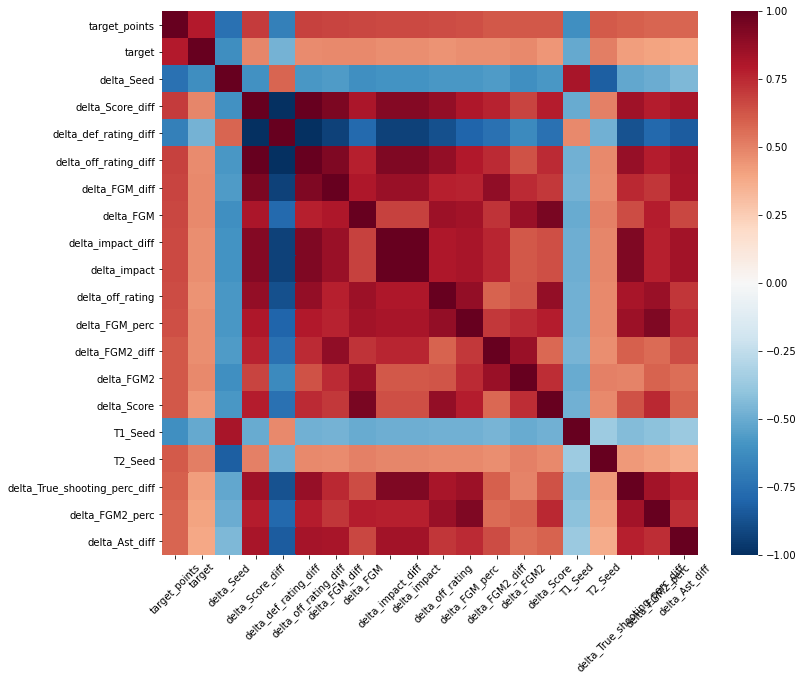

In [75]:
high_corr = tml.plot_correlations(train_women, target='target_points', limit=20)

                               delta_Seed  delta_Score_diff  \
delta_Seed                       1.000000         -0.608991   
delta_Score_diff                -0.608991          1.000000   
delta_def_rating_diff            0.585381         -0.994387   
delta_off_rating_diff           -0.585381          0.994387   
delta_FGM_diff                  -0.569871          0.942883   
delta_FGM                       -0.610627          0.813188   
delta_impact_diff               -0.596561          0.920452   
delta_impact                    -0.596561          0.920452   
delta_off_rating                -0.579403          0.880692   
delta_FGM_perc                  -0.580491          0.809122   
delta_FGM2_diff                 -0.566085          0.768847   
delta_FGM2                      -0.614635          0.677008   
delta_Score                     -0.583049          0.784595   
T1_Seed                          0.824804         -0.502298   
T2_Seed                         -0.824804          0.50

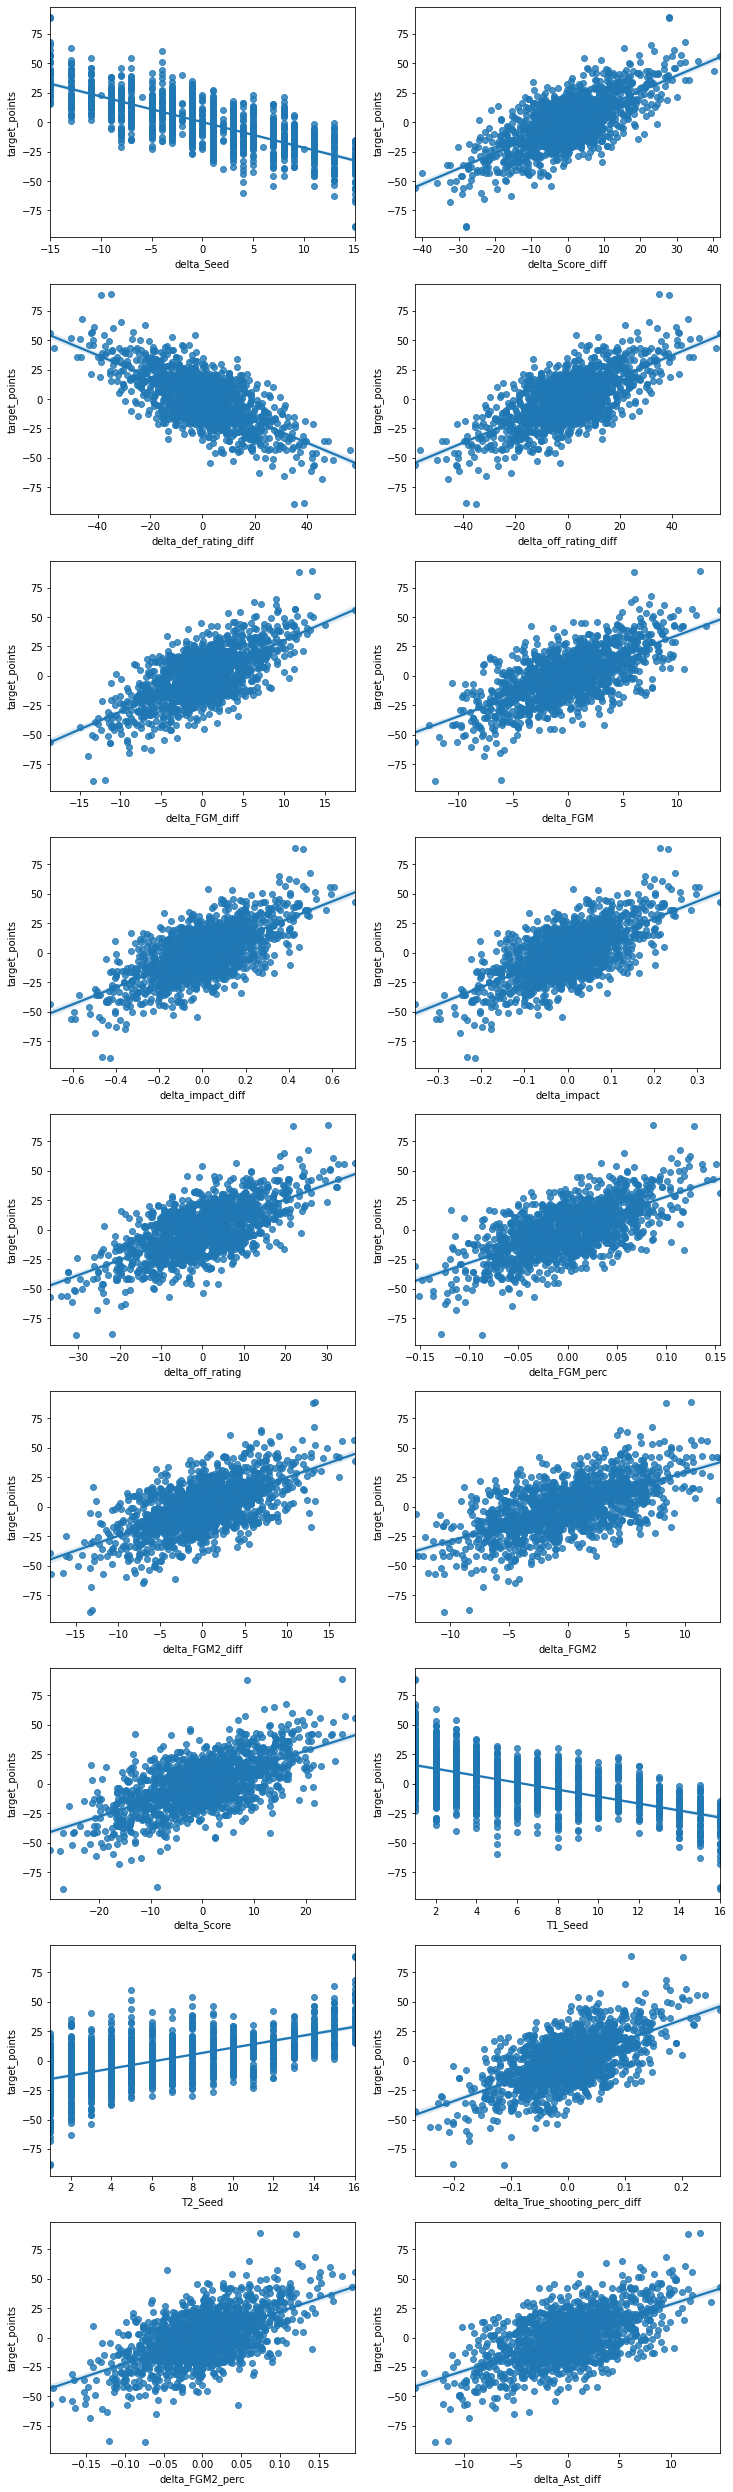

In [76]:
tml.corr_target(train_women, 'target_points', list(high_corr[2:].index), x_estimator=None)

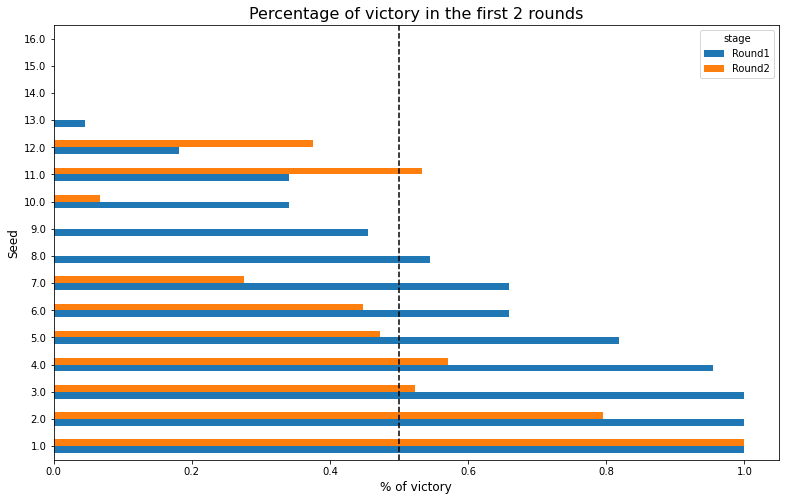

In [77]:
tmp = train_women[train_women.stage.isin(['Round1', 'Round2'])].groupby(['T1_Seed', 'stage'])['target'].agg('mean').unstack()

fig, ax = plt.subplots(1, 1, figsize=(13, 8))

tmp.plot(kind='barh', ax=ax)
ax.axvline(0.5, color='k', linestyle='--')
ax.set_title('Percentage of victory in the first 2 rounds', fontsize=16)
ax.set_xlabel('% of victory', fontsize=12)
ax.set_ylabel('Seed', fontsize=12)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count  mean  max  min  median        std
stage                                              
Round1       704     0   89  -89       0  24.225822
Round2       352     0   54  -54       0  18.544165
Round3       176     0   60  -60       0  19.480686
Round4        88     0   40  -40       0  18.954877
final         22     0   33  -33       0  17.400055
finalfour     44     0   29  -29       0  14.143780

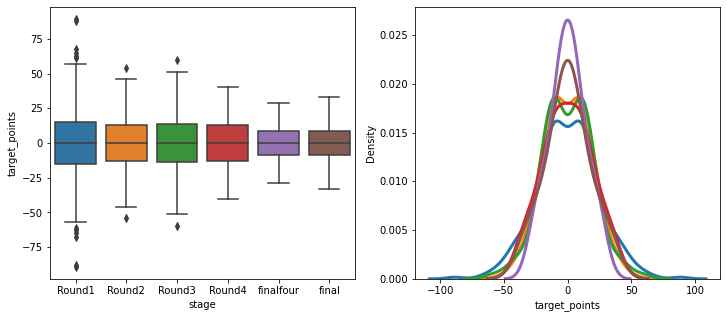

In [78]:
tml.segm_target(data=train_women, target='target_points', cat='stage')

## Now let us reuse some code from 2020 March Madness from Rob Mulla https://www.kaggle.com/robikscube/2020-march-madness-data-first-look-eda

In [79]:
MTeams = pd.read_csv(f'../input/mens-march-mania-2022/MDataFiles_Stage1/MTeams.csv')
MTeams.sort_values('FirstD1Season', ascending=False).head(5)

TeamID      TeamName  FirstD1Season  LastD1Season
371    1472  St Thomas MN           2022          2022
370    1471  UC San Diego           2021          2022
369    1470   Tarleton St           2021          2022
368    1469      Dixie St           2021          2022
367    1468    Bellarmine           2021          2022

In [80]:
# Womens' data does not contain years joined :(
WTeams = pd.read_csv(f'../input/womens-march-mania-2022/WDataFiles_Stage1/WTeams.csv')
WTeams.head()

TeamID     TeamName
0    3101  Abilene Chr
1    3102    Air Force
2    3103        Akron
3    3104      Alabama
4    3105  Alabama A&M

In [81]:
MSeasons = pd.read_csv(f'../input/mens-march-mania-2022/MDataFiles_Stage1/MSeasons.csv')
WSeasons = pd.read_csv(f'../input/womens-march-mania-2022/WDataFiles_Stage1/WSeasons.csv')
MSeasons.head()

Season              DayZero RegionW    RegionX    RegionY    RegionZ
0    1985  1984-10-29 00:00:00    East       West    Midwest  Southeast
1    1986  1985-10-28 00:00:00    East    Midwest  Southeast       West
2    1987  1986-10-27 00:00:00    East  Southeast    Midwest       West
3    1988  1987-11-02 00:00:00    East    Midwest  Southeast       West
4    1989  1988-10-31 00:00:00    East       West    Midwest  Southeast

In [82]:
MENS_DIR = '../input/mens-march-mania-2022'
WOMENS_DIR = '../input/womens-march-mania-2022'

In [83]:
MNCAATourneySeeds = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MNCAATourneySeeds.csv')
WNCAATourneySeeds = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WNCAATourneySeeds.csv')

In [84]:
# As Lets join this with the teams data to see some of the past matchups
WNCAATourneySeeds.merge(WTeams, validate='many_to_one').head()

Season Seed  TeamID      TeamName
0    1998  W01    3330  Old Dominion
1    1999  W02    3330  Old Dominion
2    2000  X04    3330  Old Dominion
3    2001  Z11    3330  Old Dominion
4    2002  Y07    3330  Old Dominion

In [85]:
MRegularSeasonCompactResults = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
MRegularSeasonCompactResults.head()
WRegularSeasonCompactResults = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WRegularSeasonCompactResults.csv')
WRegularSeasonCompactResults.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1998      18     3104      91     3202      41    H      0
1    1998      18     3163      87     3221      76    H      0
2    1998      18     3222      66     3261      59    H      0
3    1998      18     3307      69     3365      62    H      0
4    1998      18     3349     115     3411      35    H      0

#### Some more references from Parul -  https://www.kaggle.com/parulpandey/decoding-march-madness

In [86]:
# We have the team the won, lost and the score.
MRegularSeasonCompactResults.head(5)

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985      20     1228      81     1328      64    N      0
1    1985      25     1106      77     1354      70    H      0
2    1985      25     1112      63     1223      56    H      0
3    1985      25     1165      70     1432      54    H      0
4    1985      25     1192      86     1447      74    H      0

In [87]:
# Lets Add the winning and losing team names to the results
MRegularSeasonCompactResults = \
    MRegularSeasonCompactResults \
    .merge(MTeams[['TeamName', 'TeamID']],
           left_on='WTeamID',
           right_on='TeamID',
           validate='many_to_one') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'WTeamName'}) \
    .merge(MTeams[['TeamName', 'TeamID']],
           left_on='LTeamID',
           right_on='TeamID') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'LTeamName'})

WRegularSeasonCompactResults = \
    WRegularSeasonCompactResults \
    .merge(WTeams[['TeamName', 'TeamID']],
           left_on='WTeamID',
           right_on='TeamID',
           validate='many_to_one') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'WTeamName'}) \
    .merge(WTeams[['TeamName', 'TeamID']],
           left_on='LTeamID',
           right_on='TeamID') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'LTeamName'})

In [88]:
WRegularSeasonCompactResults.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT   WTeamName  \
0    1998      18     3104      91     3202      41    H      0     Alabama   
1    2009      22     3349      66     3202      62    H      0        Rice   
2    2008       6     3435      68     3202      51    H      0  Vanderbilt   
3    2020      18     3435      74     3202      46    H      0  Vanderbilt   
4    2017      18     3141      81     3202      71    H      0  C Michigan   

  LTeamName  
0    Furman  
1    Furman  
2    Furman  
3    Furman  
4    Furman

In [89]:
WRegularSeasonCompactResults['Score_Diff'] = WRegularSeasonCompactResults['WScore'] - WRegularSeasonCompactResults['LScore']
MRegularSeasonCompactResults['Score_Diff'] = MRegularSeasonCompactResults['WScore'] - MRegularSeasonCompactResults['LScore']

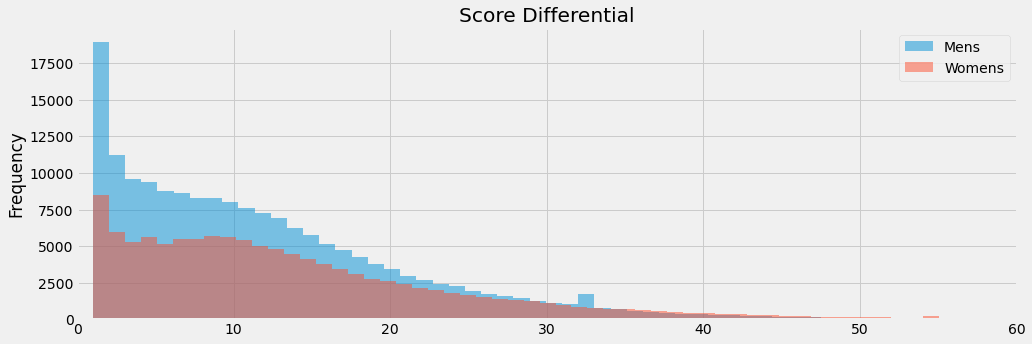

In [90]:
plt.style.use('fivethirtyeight')
MRegularSeasonCompactResults['Score_Diff'] \
    .plot(kind='hist',
          bins=90,
          figsize=(15, 5),
          label='Mens',
          alpha=0.5)
WRegularSeasonCompactResults['Score_Diff'] \
    .plot(kind='hist',
          bins=105,
          figsize=(15, 5),
          label='Womens',
          alpha=0.5)
plt.title('Score Differential')
plt.xlim(0,60)
plt.legend()
plt.show()

In [91]:
import seaborn as sns
plt.style.use('seaborn-dark-palette')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal

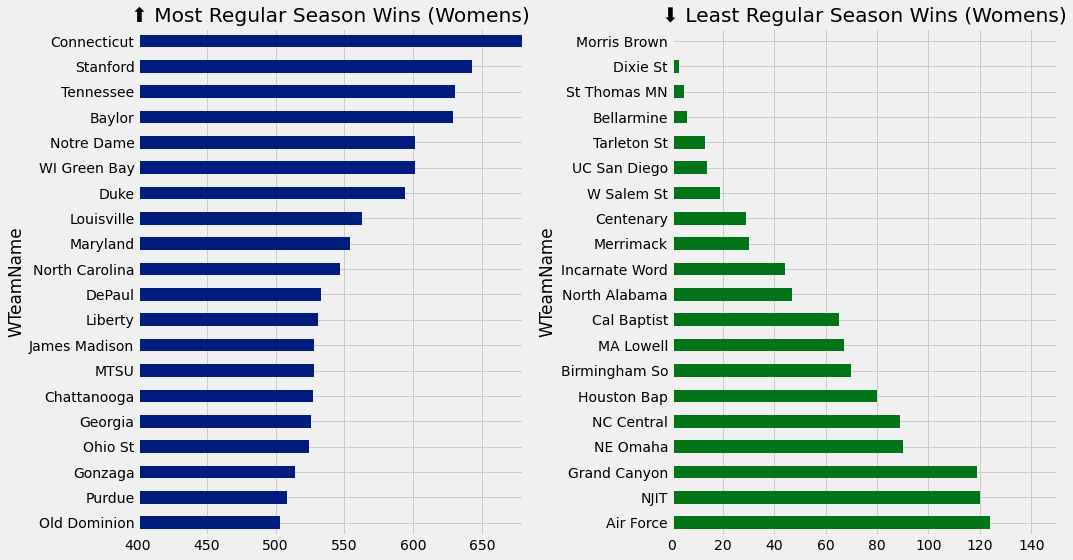

In [92]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
WRegularSeasonCompactResults['counter'] = 1
WRegularSeasonCompactResults.groupby('WTeamName')['counter'] \
    .count() \
    .sort_values() \
    .tail(20) \
    .plot(kind='barh',
          title='⬆️ Most Regular Season Wins (Womens)',
          figsize=(15, 8),
          xlim=(400, 680),
          color=mypal[0],
          ax=axs[0])
WRegularSeasonCompactResults.groupby('WTeamName')['counter'] \
    .count() \
    .sort_values(ascending=False) \
    .tail(20) \
    .plot(kind='barh',
          title='⬇️ Least Regular Season Wins (Womens)',
          figsize=(15, 8),
          xlim=(0, 150),
          color=mypal[1],
          ax=axs[1])
plt.tight_layout()
plt.show()

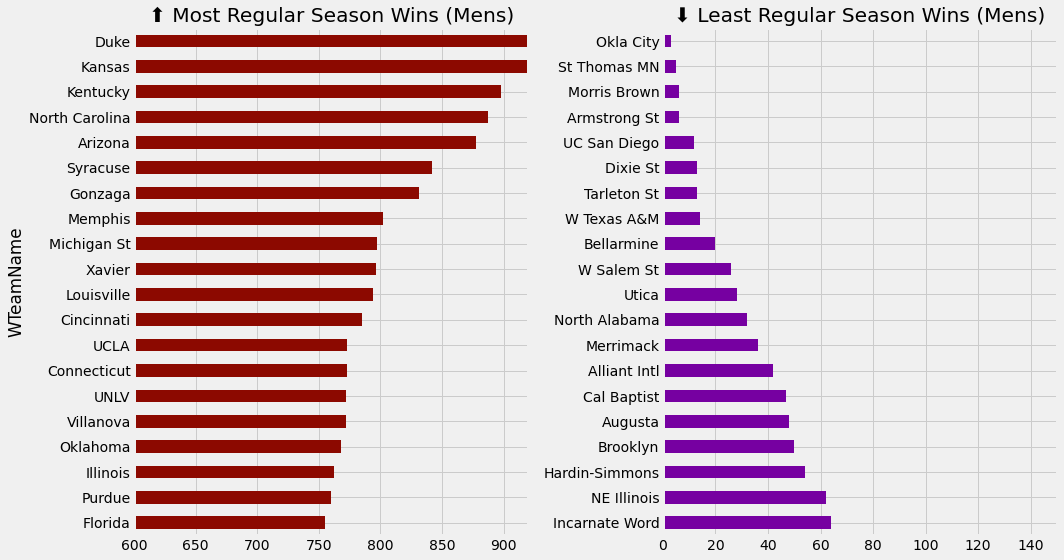

In [93]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
MRegularSeasonCompactResults['counter'] = 1
MRegularSeasonCompactResults.groupby('WTeamName')['counter'] \
    .count() \
    .sort_values() \
    .tail(20) \
    .plot(kind='barh',
          title='⬆️ Most Regular Season Wins (Mens)',
          figsize=(15, 8),
          xlim=(600, 920),
          color=mypal[2],
         ax=axs[0])
MRegularSeasonCompactResults.groupby('WTeamName')['counter'] \
    .count() \
    .sort_values(ascending=False) \
    .tail(20) \
    .plot(kind='barh',
          title='⬇️ Least Regular Season Wins (Mens)',
          figsize=(15, 8),
          xlim=(0, 150),
          color=mypal[3],
          ax=axs[1])
axs[1].set_ylabel('')
plt.tight_layout()
plt.show()

## Seeds

In [94]:
MNCAATourneySeeds = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MNCAATourneySeeds.csv')
MNCAATourneySeeds.head()

Season Seed  TeamID
0    1985  W01    1207
1    1985  W02    1210
2    1985  W03    1228
3    1985  W04    1260
4    1985  W05    1374

In [95]:
MNCAATourneyTeams = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MTeams.csv')
MNCAATourneyTeams.head()

TeamID     TeamName  FirstD1Season  LastD1Season
0    1101  Abilene Chr           2014          2022
1    1102    Air Force           1985          2022
2    1103        Akron           1985          2022
3    1104      Alabama           1985          2022
4    1105  Alabama A&M           2000          2022

In [96]:
WNCAATourneyTeams = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WTeams.csv')
WNCAATourneyTeams.head()

TeamID     TeamName
0    3101  Abilene Chr
1    3102    Air Force
2    3103        Akron
3    3104      Alabama
4    3105  Alabama A&M

In [97]:
MNCAATourneySeeds = pd.merge(MNCAATourneySeeds, MNCAATourneyTeams,on='TeamID')
MNCAATourneySeeds.head()

Season Seed  TeamID    TeamName  FirstD1Season  LastD1Season
0    1985  W01    1207  Georgetown           1985          2022
1    1986  X04    1207  Georgetown           1985          2022
2    1987  X01    1207  Georgetown           1985          2022
3    1988  W08    1207  Georgetown           1985          2022
4    1989  W01    1207  Georgetown           1985          2022

In [98]:
WNCAATourneySeeds = pd.merge(WNCAATourneySeeds, WNCAATourneyTeams,on='TeamID')
WNCAATourneySeeds.head()

Season Seed  TeamID      TeamName
0    1998  W01    3330  Old Dominion
1    1999  W02    3330  Old Dominion
2    2000  X04    3330  Old Dominion
3    2001  Z11    3330  Old Dominion
4    2002  Y07    3330  Old Dominion

In [99]:
#MNCAATourneySeeds['Region'] = MNCAATourneySeeds['Seed'].apply(lambda x: x[0][:1])
#MNCAATourneySeeds['Seed'] = MNCAATourneySeeds['Seed'].apply(lambda x: int(x[1:3]))
print(MNCAATourneySeeds.head())
print(MNCAATourneySeeds.shape)
print(WNCAATourneySeeds.head())
print(WNCAATourneySeeds.shape)

   Season Seed  TeamID    TeamName  FirstD1Season  LastD1Season
0    1985  W01    1207  Georgetown           1985          2022
1    1986  X04    1207  Georgetown           1985          2022
2    1987  X01    1207  Georgetown           1985          2022
3    1988  W08    1207  Georgetown           1985          2022
4    1989  W01    1207  Georgetown           1985          2022
(2354, 6)
   Season Seed  TeamID      TeamName
0    1998  W01    3330  Old Dominion
1    1999  W02    3330  Old Dominion
2    2000  X04    3330  Old Dominion
3    2001  Z11    3330  Old Dominion
4    2002  Y07    3330  Old Dominion
(1472, 4)


In [100]:
WNCAATourneySeeds['Region'] = WNCAATourneySeeds['Seed'].apply(lambda x: x[0][:1])
WNCAATourneySeeds['Seed'] = WNCAATourneySeeds['Seed'].apply(lambda x: int(x[1:3]))
print(WNCAATourneySeeds.head())
print(WNCAATourneySeeds.shape)

   Season  Seed  TeamID      TeamName Region
0    1998     1    3330  Old Dominion      W
1    1999     2    3330  Old Dominion      W
2    2000     4    3330  Old Dominion      X
3    2001    11    3330  Old Dominion      Z
4    2002     7    3330  Old Dominion      Y
(1472, 5)


In [101]:
MNCAATourneySeeds['Region'] = MNCAATourneySeeds['Seed'].apply(lambda x: x[0][:1])
MNCAATourneySeeds['Seed'] = MNCAATourneySeeds['Seed'].apply(lambda x: int(x[1:3]))
print(MNCAATourneySeeds.head())
print(MNCAATourneySeeds.shape)

   Season  Seed  TeamID    TeamName  FirstD1Season  LastD1Season Region
0    1985     1    1207  Georgetown           1985          2022      W
1    1986     4    1207  Georgetown           1985          2022      X
2    1987     1    1207  Georgetown           1985          2022      X
3    1988     8    1207  Georgetown           1985          2022      W
4    1989     1    1207  Georgetown           1985          2022      W
(2354, 7)


Text(0.5, 0, 'Number of times in Top seeded positions - WOMEN')

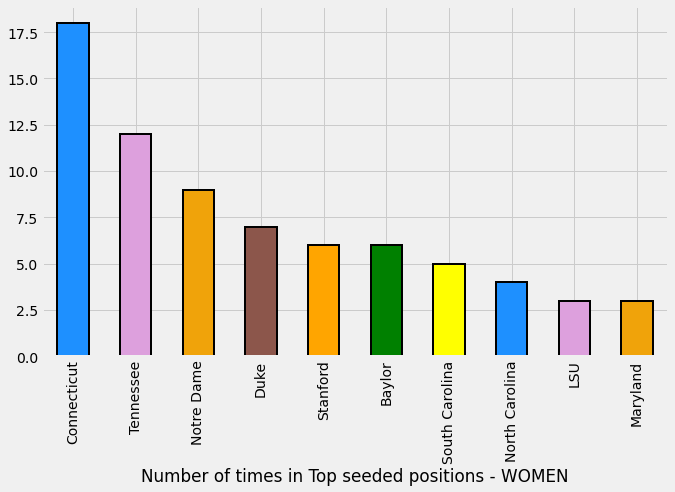

In [102]:
# Teams with maximum top seeds
fig = plt.gcf()
fig.set_size_inches(10, 6)
colors = ['dodgerblue', 'plum', '#F0A30A','#8c564b','orange','green','yellow'] 

WNCAATourneySeeds[WNCAATourneySeeds['Seed'] ==1]['TeamName'].value_counts()[:10].plot(kind='bar',color=colors,linewidth=2,edgecolor='black')
plt.xlabel('Number of times in Top seeded positions - WOMEN')

Text(0.5, 0, 'Number of times in Top seeded positions - Men NCAA')

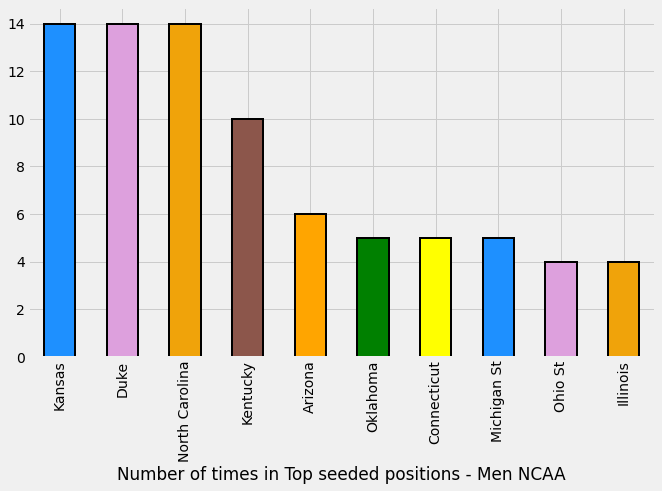

In [103]:
# Teams with maximum top seeds
fig = plt.gcf()
fig.set_size_inches(10, 6)
colors = ['dodgerblue', 'plum', '#F0A30A','#8c564b','orange','green','yellow'] 

MNCAATourneySeeds[MNCAATourneySeeds['Seed'] ==1]['TeamName'].value_counts()[:10].plot(kind='bar',color=colors,linewidth=2,edgecolor='black')
plt.xlabel('Number of times in Top seeded positions - Men NCAA')

In [104]:
#WRegularSeasonCompactResults
#MRegularSeasonCompactResults

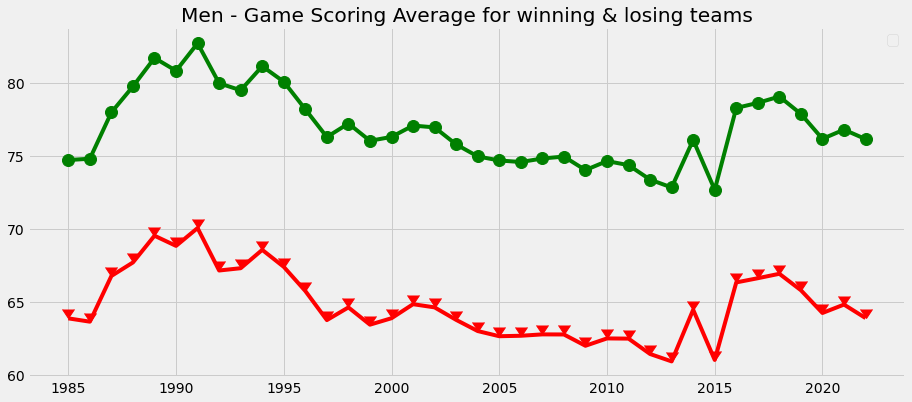

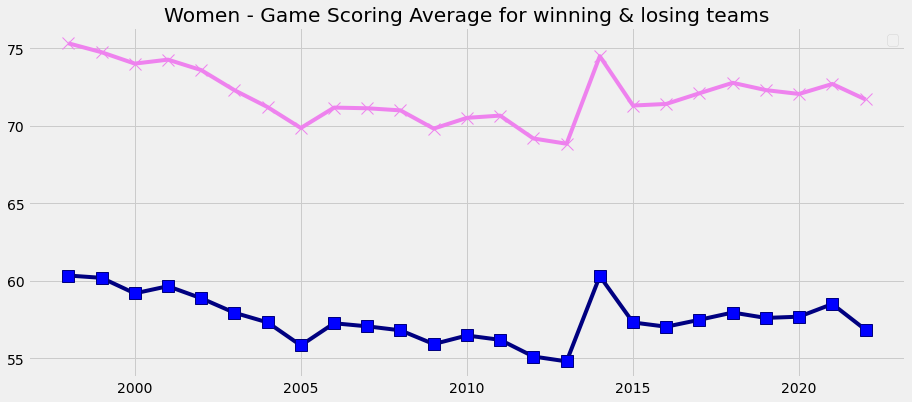

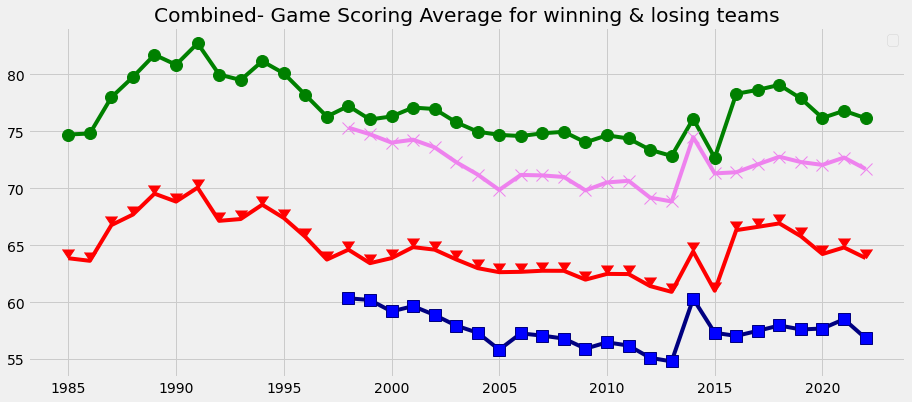

In [105]:
# Winning and Losing score Average over the years
MensScore = MRegularSeasonCompactResults.groupby('Season')[['WScore','LScore']].mean()

fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.plot(MensScore.index,MensScore['WScore'],marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot(MensScore.index,MensScore['LScore'],marker=7, markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.title('Men - Game Scoring Average for winning & losing teams')
plt.legend()
plt.show()

# Winning and Losing score Average over the years
WomensScore = WRegularSeasonCompactResults.groupby('Season')[['WScore','LScore']].mean()

fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.plot(WomensScore.index,WomensScore['WScore'],marker='x', markerfacecolor='purple', markersize=12, color='violet', linewidth=4)
plt.plot(WomensScore.index,WomensScore['LScore'],marker='s', markerfacecolor='blue', markersize=12, color='navy', linewidth=4)
plt.legend()
plt.title('Women - Game Scoring Average for winning & losing teams')
plt.show()
# Winning and Losing score Average over the years
MensScore = MRegularSeasonCompactResults.groupby('Season')[['WScore','LScore']].mean()

fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.plot(MensScore.index,MensScore['WScore'],marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot(MensScore.index,MensScore['LScore'],marker=7, markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.legend()
# Winning and Losing score Average over the years
WomensScore = WRegularSeasonCompactResults.groupby('Season')[['WScore','LScore']].mean()

fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.plot(WomensScore.index,WomensScore['WScore'],marker='x', markerfacecolor='purple', markersize=12, color='violet', linewidth=4)
plt.plot(WomensScore.index,WomensScore['LScore'],marker='s', markerfacecolor='blue', markersize=12, color='navy', linewidth=4)
plt.title('Combined- Game Scoring Average for winning & losing teams')
plt.legend()
plt.show()

In [106]:
#../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyCompactResults.csv
MNCAATourneyCompactResults = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
MNCAATourneyCompactResults.head()
WNCAATourneyCompactResults = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WNCAATourneyCompactResults.csv')
WNCAATourneyCompactResults.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1998     137     3104      94     3422      46    H      0
1    1998     137     3112      75     3365      63    H      0
2    1998     137     3163      93     3193      52    H      0
3    1998     137     3198      59     3266      45    H      0
4    1998     137     3203      74     3208      72    A      0

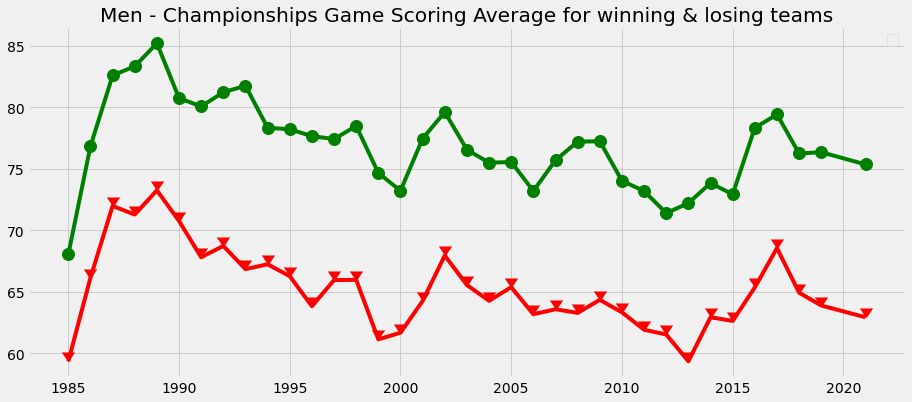

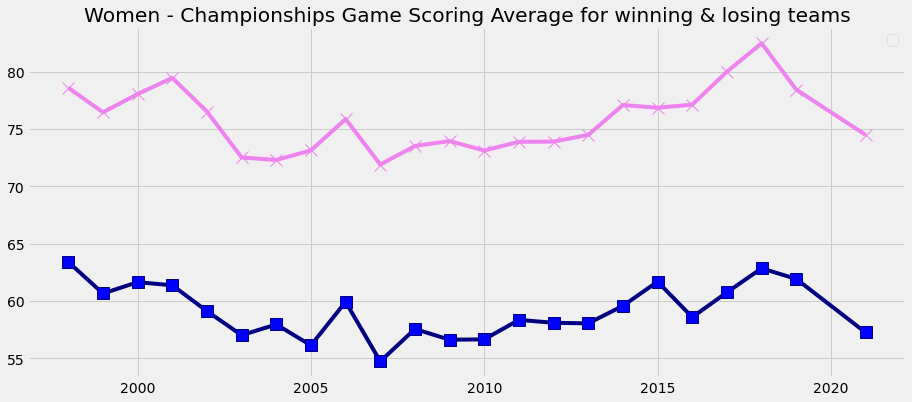

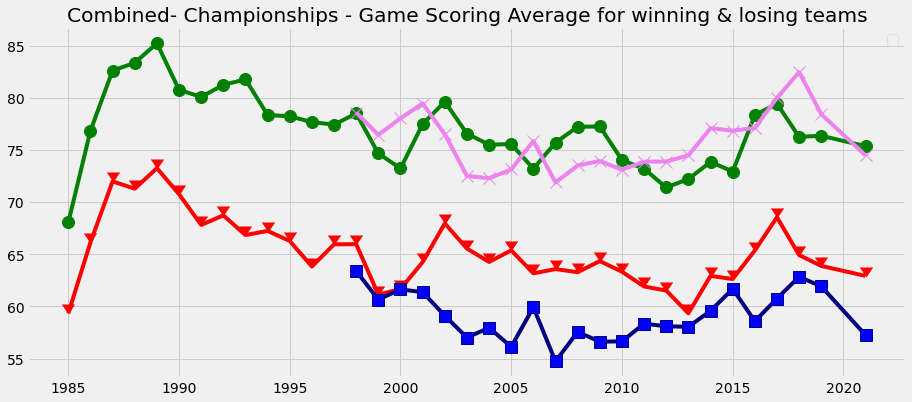

In [107]:
# Winning and Losing score Average over the years
MensScore = MNCAATourneyCompactResults.groupby('Season')[['WScore','LScore']].mean()

fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.plot(MensScore.index,MensScore['WScore'],marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot(MensScore.index,MensScore['LScore'],marker=7, markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.title('Men - Championships Game Scoring Average for winning & losing teams')
plt.legend()
plt.show()

# Winning and Losing score Average over the years
WomensScore = WNCAATourneyCompactResults.groupby('Season')[['WScore','LScore']].mean()

fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.plot(WomensScore.index,WomensScore['WScore'],marker='x', markerfacecolor='purple', markersize=12, color='violet', linewidth=4)
plt.plot(WomensScore.index,WomensScore['LScore'],marker='s', markerfacecolor='blue', markersize=12, color='navy', linewidth=4)
plt.legend()
plt.title('Women - Championships Game Scoring Average for winning & losing teams')
plt.show()
# Winning and Losing score Average over the years
MensScore = MNCAATourneyCompactResults.groupby('Season')[['WScore','LScore']].mean()

fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.plot(MensScore.index,MensScore['WScore'],marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot(MensScore.index,MensScore['LScore'],marker=7, markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.legend()
# Winning and Losing score Average over the years
WomensScore = WNCAATourneyCompactResults.groupby('Season')[['WScore','LScore']].mean()

fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.plot(WomensScore.index,WomensScore['WScore'],marker='x', markerfacecolor='purple', markersize=12, color='violet', linewidth=4)
plt.plot(WomensScore.index,WomensScore['LScore'],marker='s', markerfacecolor='blue', markersize=12, color='navy', linewidth=4)
plt.title('Combined- Championships - Game Scoring Average for winning & losing teams')
plt.legend()
plt.show()

        DayNum_x  DayNum_y
Season                    
1985          63      3737
1986          63      3783
1987          63      3915
1988          63      3955
1989          63      4037
1990          63      4045
1991          63      4123
1992          63      4127
1993          63      3982
1994          63      4060
1995          63      4077
1996          63      4122
1997          63      4155
1998          63      4167
1999          63      4222
2000          63      4519
2001          64      4467
2002          64      4555
2003          64      4616
2004          64      4571
2005          64      4675
2006          64      4757
2007          64      5043
2008          64      5163
2009          64      5249
2010          64      5263
2011          67      5246
2012          67      5253
2013          67      5320
2014          67      5362
2015          67      5354
2016          67      5369
2017          67      5395
2018          67      5405
2019          67      5463
2

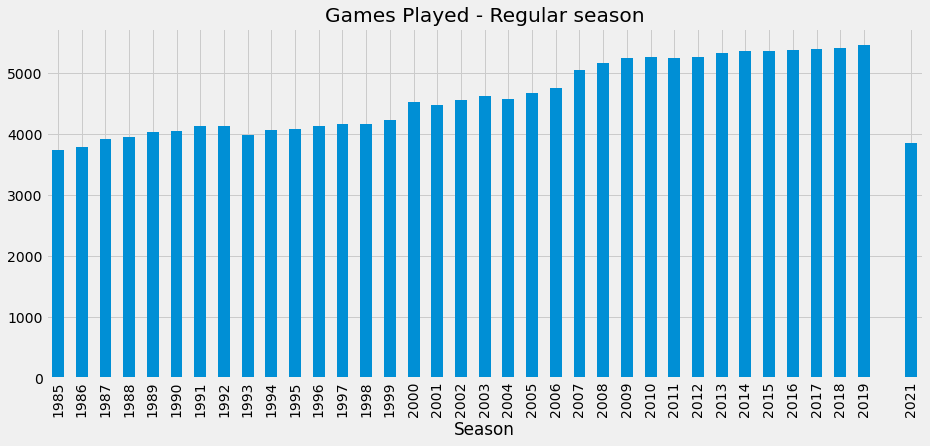

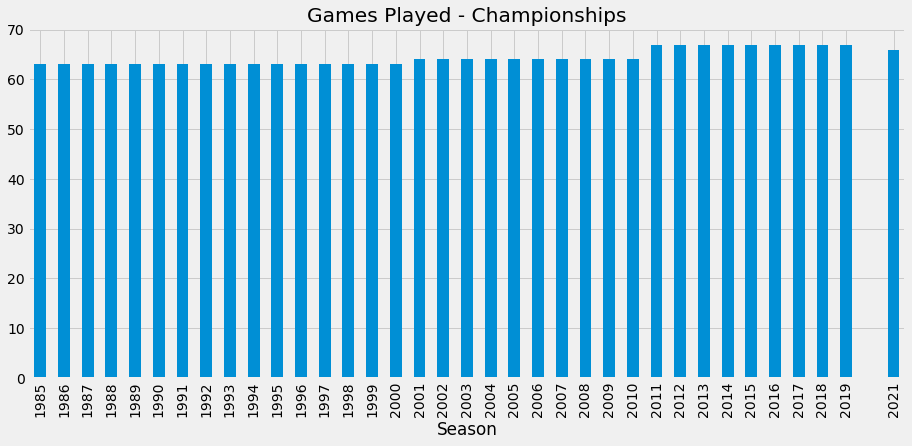

In [108]:
men_games_played = MNCAATourneyCompactResults.groupby('Season')['DayNum'].count().to_frame().merge(MRegularSeasonCompactResults.groupby('Season')['DayNum'].count().to_frame(),on='Season')
men_games_played.rename(columns={"DayNum_x": "Tournament Games", "DayNum_y": "Regular season games"})
print(men_games_played.head(100))
fig = plt.gcf()
fig.set_size_inches(14, 6)
men_games_played['DayNum_y'].plot.bar()
plt.title('Games Played - Regular season')
plt.show()
fig = plt.gcf()
fig.set_size_inches(14, 6)
men_games_played['DayNum_x'].plot.bar()
plt.title('Games Played - Championships')
plt.show()


        DayNum_x  DayNum_y
Season                    
1998          63      3868
1999          63      4231
2000          63      4423
2001          63      4374
2002          63      4493
2003          63      4569
2004          63      4591
2005          63      4644
2006          63      4709
2007          63      4983
2008          63      5079
2009          63      5137
2010          63      5140
2011          63      5138
2012          63      5114
2013          63      5184
2014          63      5252
2015          63      5215
2016          63      5209
2017          63      5210
2018          63      5209
2019          63      5240
2021          63      3556


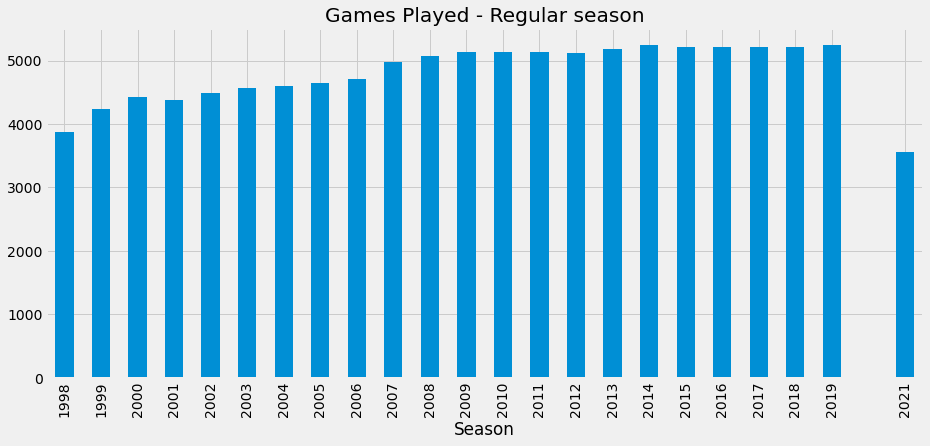

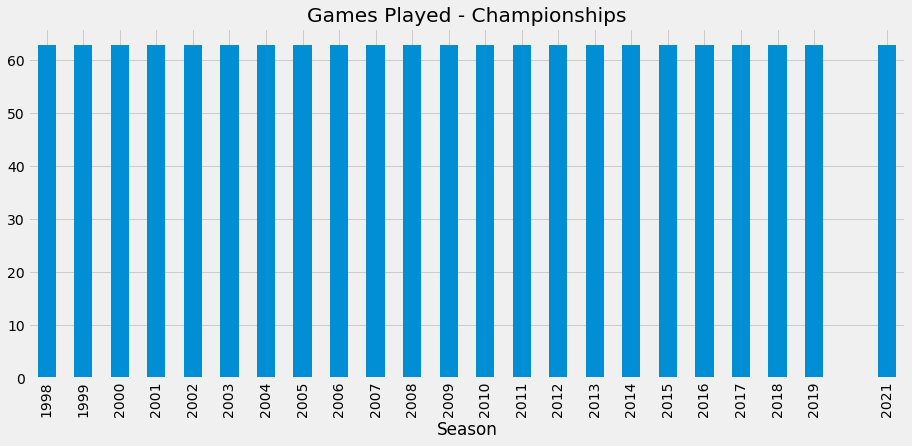

In [109]:
women_games_played = WNCAATourneyCompactResults.groupby('Season')['DayNum'].count().to_frame().merge(WRegularSeasonCompactResults.groupby('Season')['DayNum'].count().to_frame(),on='Season')
women_games_played.rename(columns={"DayNum_x": "Tournament Games", "DayNum_y": "Regular season games"})
print(women_games_played.head(100))
fig = plt.gcf()
fig.set_size_inches(14, 6)
women_games_played['DayNum_y'].plot.bar()
plt.title('Games Played - Regular season')
plt.show()
fig = plt.gcf()
fig.set_size_inches(14, 6)
women_games_played['DayNum_x'].plot.bar()
plt.title('Games Played - Championships')
plt.show()

Text(0, 0.5, 'Frequency')

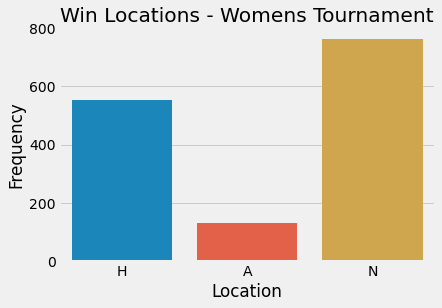

In [110]:
ax = sns.countplot(x=WNCAATourneyCompactResults['WLoc'])
ax.set_title("Win Locations - Womens Tournament")
ax.set_xlabel("Location")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

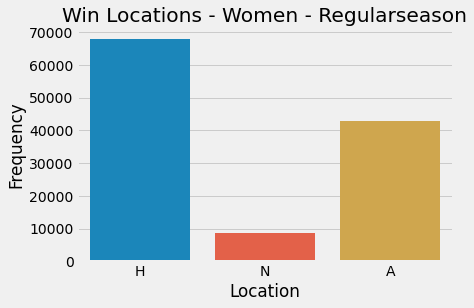

In [111]:
ax = sns.countplot(x=WRegularSeasonCompactResults['WLoc'])
ax.set_title("Win Locations - Women - Regularseason")
ax.set_xlabel("Location")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

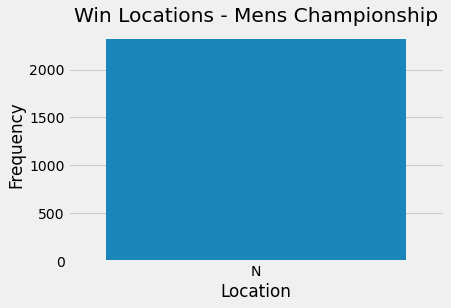

In [112]:
ax = sns.countplot(x=MNCAATourneyCompactResults['WLoc'])
ax.set_title("Win Locations - Mens Championship")
ax.set_xlabel("Location")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

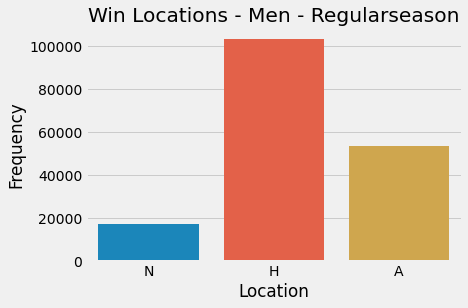

In [113]:
ax = sns.countplot(x=MRegularSeasonCompactResults['WLoc'])
ax.set_title("Win Locations - Men - Regularseason")
ax.set_xlabel("Location")
ax.set_ylabel("Frequency")

In [114]:
mens_tourney_detailed_results = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')
print(mens_tourney_detailed_results.head())
womens_tourney_detailed_results = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WNCAATourneyDetailedResults.csv')
print(womens_tourney_detailed_results.head())

   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003     134     1421      92     1411      84    N      1    32    69   
1    2003     136     1112      80     1436      51    N      0    31    66   
2    2003     136     1113      84     1272      71    N      0    31    59   
3    2003     136     1141      79     1166      73    N      0    29    53   
4    2003     136     1143      76     1301      74    N      1    27    64   

   ...  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  
0  ...     31    14    31   17   28    16   15     5     0   22  
1  ...     16     7     7    8   26    12   17    10     3   15  
2  ...     28    14    21   20   22    11   12     2     5   18  
3  ...     17    12    17   14   17    20   21     6     6   21  
4  ...     21    15    20   10   26    16   14     5     8   19  

[5 rows x 34 columns]
   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2010     138     3124 

In [115]:
def games_stats(df):
    games_stats = []
    for row in mens_tourney_detailed_results.to_dict('records'):
        game = {}
        game['Season'] =  row['Season']
        game['DayNum'] = row['DayNum']
        game['TeamID'] = row['WTeamID']
        game['OpponentID'] = row['LTeamID']
        game['FGM'] = row['WFGM']
        game['Loc'] = row['WLoc']
        game['Won'] = 1
        game['Score'] = row['WScore']
        game['FGA'] = row['WFGA']
        game['FGM3'] = row['WFGM3']
        game['FGA3'] = row['WFGA3']
        game['FTM'] = row['WFTM']
        game['FTA'] = row['WFTA']
        game['OR'] = row['WOR']
        game['DR'] = row['WDR']
        game['AST'] = row['WAst']
        game['TO'] = row['WTO']
        game['STL'] = row['WStl']
        game['BLK'] = row['WBlk']
        game['PF'] = row['WPF']
        games_stats.append(game)
        game = {}
        game['Season'] = row['Season']
        game['DayNum'] = row['DayNum']
        game['TeamID'] = row['LTeamID']
        game['OpponentID'] = row['WTeamID']
        game['FGM'] = row['LFGM']
        game['Loc'] = row['WLoc']
        game['Won']= 0
        game['Score'] = row['LScore']
        game['FGA'] = row['LFGA']
        game['FGM3'] = row['LFGM3']
        game['FGA3'] = row['LFGA3']
        game['FTM'] = row['LFTM']
        game['FTA'] = row['LFTA']
        game['OR'] = row['LOR']
        game['DR'] = row['LDR']
        game['AST'] = row['LAst']
        game['TO'] = row['LTO']
        game['STL'] = row['LStl']
        game['BLK'] = row['LBlk']
        game['PF'] = row['LPF']
        games_stats.append(game)
        return games_stats

In [116]:
gs=games_stats(mens_tourney_detailed_results)
mens_tournament = pd.DataFrame(gs)
mens_tournament.head()

Season  DayNum  TeamID  OpponentID  FGM Loc  Won  Score  FGA  FGM3  FGA3  \
0    2003     134    1421        1411   32   N    1     92   69    11    29   
1    2003     134    1411        1421   29   N    0     84   67    12    31   

   FTM  FTA  OR  DR  AST  TO  STL  BLK  PF  
0   17   26  14  30   17  12    5    3  22  
1   14   31  17  28   16  15    5    0  22

In [117]:
gs=games_stats(womens_tourney_detailed_results)
womens_tournament = pd.DataFrame(gs)
womens_tournament.head()

Season  DayNum  TeamID  OpponentID  FGM Loc  Won  Score  FGA  FGM3  FGA3  \
0    2003     134    1421        1411   32   N    1     92   69    11    29   
1    2003     134    1411        1421   29   N    0     84   67    12    31   

   FTM  FTA  OR  DR  AST  TO  STL  BLK  PF  
0   17   26  14  30   17  12    5    3  22  
1   14   31  17  28   16  15    5    0  22

In [118]:
mens_tournament_df = pd.merge(mens_tournament , MNCAATourneySeeds, on= ['Season','TeamID'])
mens_tournament_df.rename(columns={'Seed': 'Team_Seed'}, inplace=True)
mens_tournament_df.head()

Season  DayNum  TeamID  OpponentID  FGM Loc  Won  Score  FGA  FGM3  ...  \
0    2003     134    1421        1411   32   N    1     92   69    11  ...   
1    2003     134    1411        1421   29   N    0     84   67    12  ...   

   AST  TO  STL  BLK  PF  Team_Seed       TeamName  FirstD1Season  \
0   17  12    5    3  22         16  UNC Asheville           1987   
1   16  15    5    0  22         16    TX Southern           1985   

   LastD1Season  Region  
0          2022       X  
1          2022       X  

[2 rows x 25 columns]

In [119]:
womens_tournament_df = pd.merge(womens_tournament , WNCAATourneySeeds, on= ['Season','TeamID'])
womens_tournament_df.rename(columns={'Seed': 'Team_Seed'}, inplace=True)
womens_tournament_df[:2]

Empty DataFrame
Columns: [Season, DayNum, TeamID, OpponentID, FGM, Loc, Won, Score, FGA, FGM3, FGA3, FTM, FTA, OR, DR, AST, TO, STL, BLK, PF, Team_Seed, TeamName, Region]
Index: []

[0 rows x 23 columns]

In [120]:
womens_tournament_df2 = pd.merge(womens_tournament_df , WNCAATourneySeeds.rename(columns={'TeamID':'OpponentID'}), on= ['Season','OpponentID'])
womens_tournament_df2 .rename(columns={'Seed': 'OpponentSeed',
                                'TeamName_x':'Team',
                                'TeamName_y':'Opponents',
                                 'Region_x':'Team_Region',
                                 'Region_y':'Opponent_Region'}, inplace=True)
womens_tournament_df2 .head()

Empty DataFrame
Columns: [DayNum, TeamID, FGM, Loc, Won, Score, FGA, FGM3, FGA3, FTM, FTA, OR, DR, AST, TO, STL, BLK, PF, Team_Seed, Team, Team_Region, Season, OpponentSeed, OpponentID, Opponents, Opponent_Region]
Index: []

[0 rows x 26 columns]

In [121]:
mens_tournament_df2 = pd.merge(mens_tournament_df , MNCAATourneySeeds.rename(columns={'TeamID':'OpponentID'}), on= ['Season','OpponentID'])
mens_tournament_df2 .rename(columns={'Seed': 'OpponentSeed',
                                'TeamName_x':'Team',
                                'TeamName_y':'Opponents',
                                 'Region_x':'Team_Region',
                                 'Region_y':'Opponent_Region'}, inplace=True)
mens_tournament_df2 .head()

Season  DayNum  TeamID  OpponentID  FGM Loc  Won  Score  FGA  FGM3  ...  \
0    2003     134    1421        1411   32   N    1     92   69    11  ...   
1    2003     134    1411        1421   29   N    0     84   67    12  ...   

   Team_Seed           Team  FirstD1Season_x  LastD1Season_x  Team_Region  \
0         16  UNC Asheville             1987            2022            X   
1         16    TX Southern             1985            2022            X   

   OpponentSeed      Opponents  FirstD1Season_y  LastD1Season_y  \
0            16    TX Southern             1985            2022   
1            16  UNC Asheville             1987            2022   

   Opponent_Region  
0                X  
1                X  

[2 rows x 30 columns]

In [122]:
# Winning_Teams

winning_Teams = mens_tournament_df2[mens_tournament_df2['Won'] == 1]

# Losing_Teams

losing_Teams = mens_tournament_df2[mens_tournament_df2['Won'] == 0]

In [123]:
winning_Teams.head().T

0
Season                    2003
DayNum                     134
TeamID                    1421
OpponentID                1411
FGM                         32
Loc                          N
Won                          1
Score                       92
FGA                         69
FGM3                        11
FGA3                        29
FTM                         17
FTA                         26
OR                          14
DR                          30
AST                         17
TO                          12
STL                          5
BLK                          3
PF                          22
Team_Seed                   16
Team             UNC Asheville
FirstD1Season_x           1987
LastD1Season_x            2022
Team_Region                  X
OpponentSeed                16
Opponents          TX Southern
FirstD1Season_y           1985
LastD1Season_y            2022
Opponent_Region              X

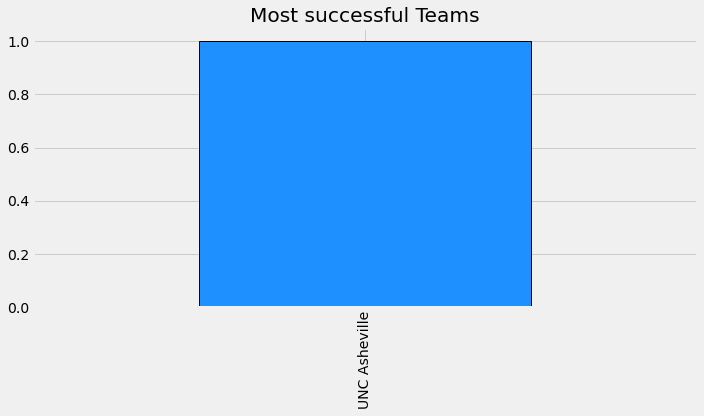

In [124]:
# Most successful teams
fig = plt.gcf()
fig.set_size_inches(10, 6)

colors = ['dodgerblue', 'plum', '#F0A30A','#8c564b','orange','green','yellow'] 
winning_Teams['Team'].value_counts()[:10].plot(kind='bar',color=colors,edgecolor='black',linewidth=1 )

plt.title('Most successful Teams')
plt.tight_layout(h_pad=2)

/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

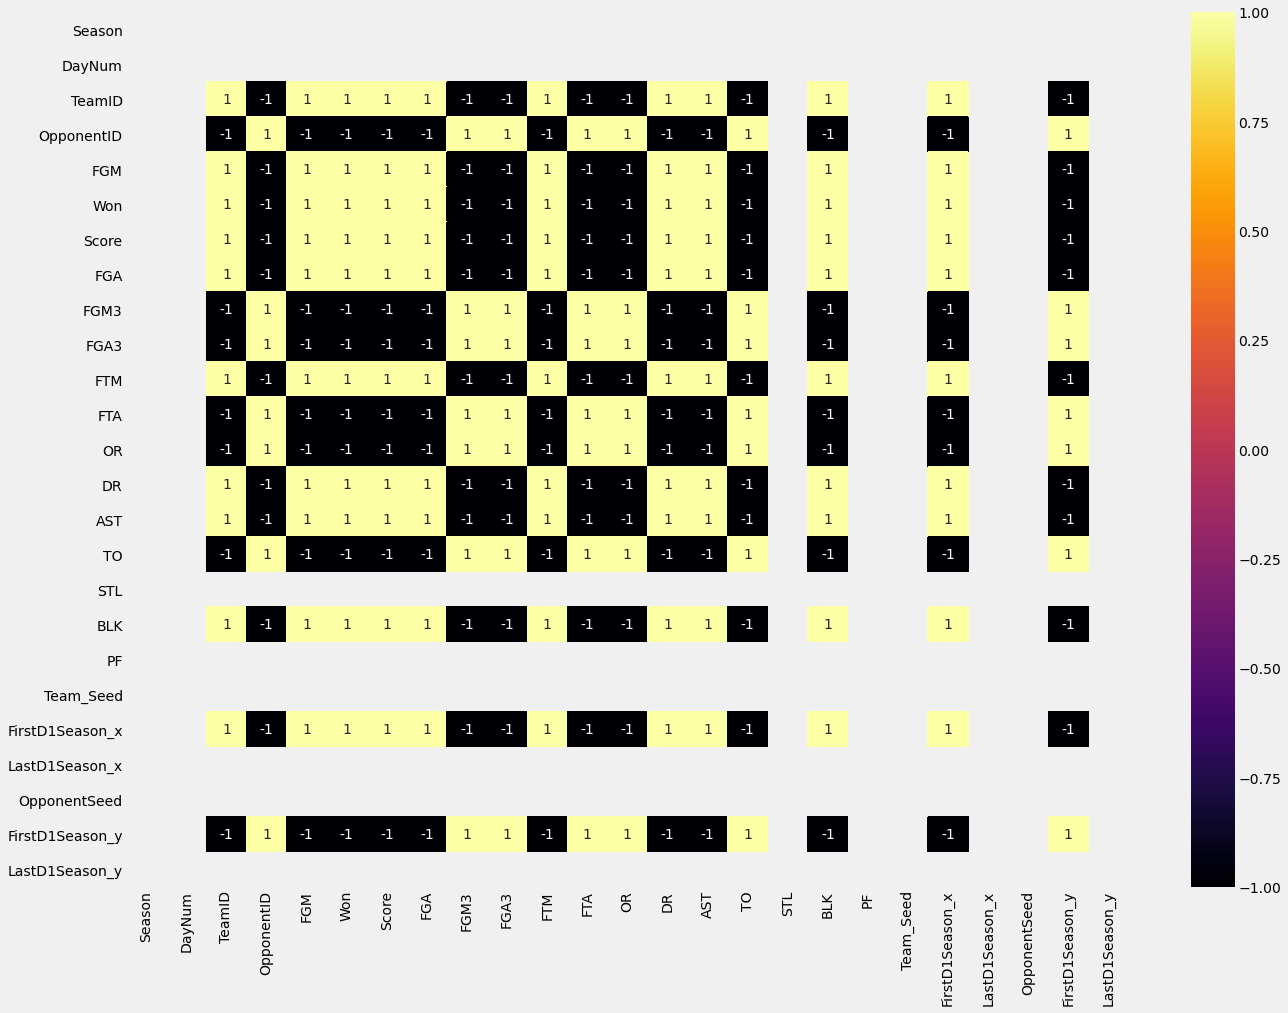

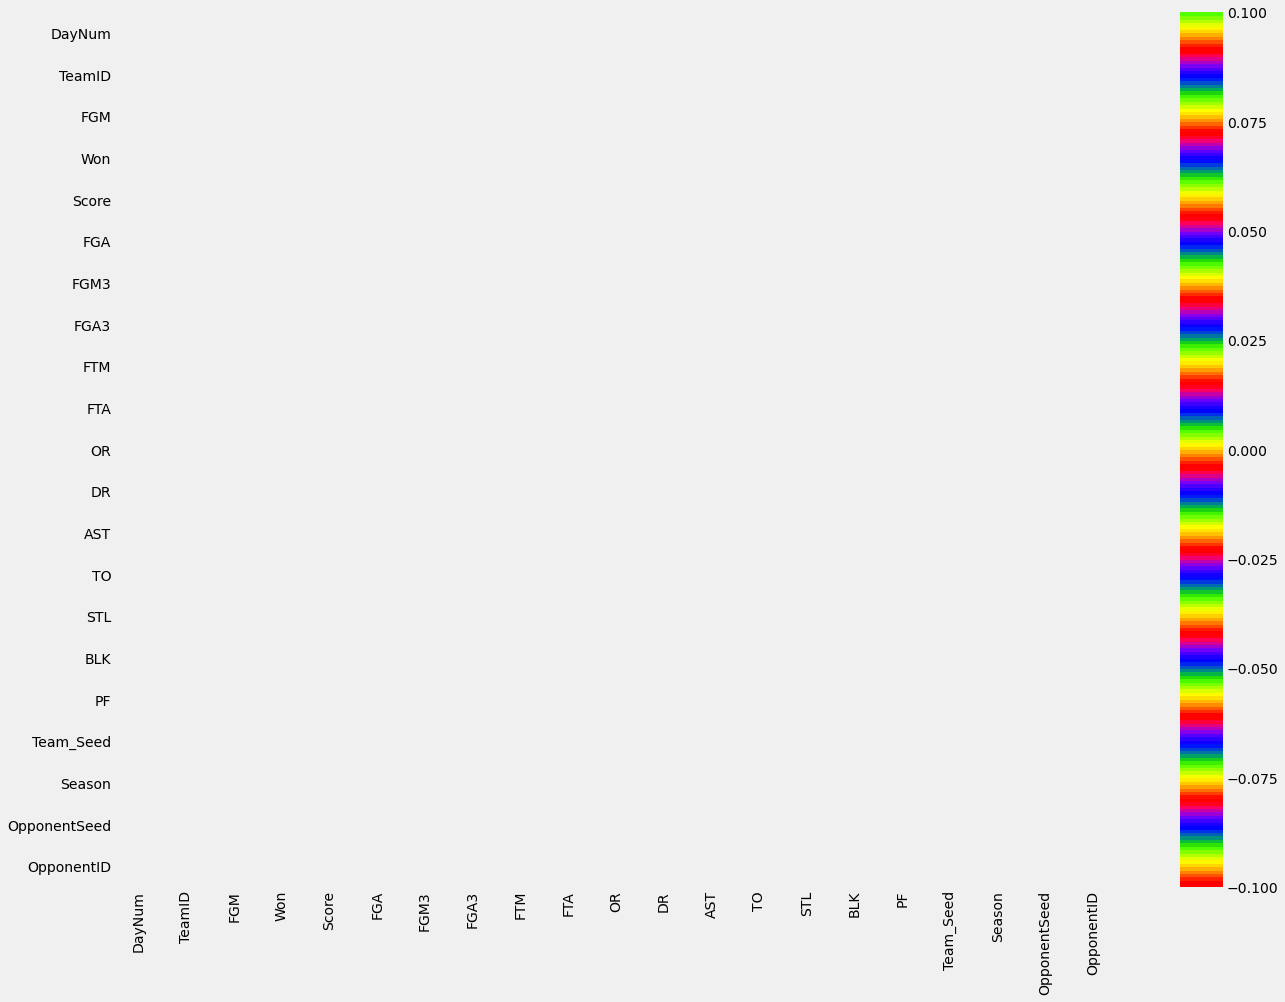

In [125]:
# Features Correlated with Wins
f,ax = plt.subplots(figsize=(20,15))
corr = mens_tournament_df2.corr()
sns.heatmap(corr, cmap='inferno', annot=True)

f,ax = plt.subplots(figsize=(20,15))
corr = womens_tournament_df2.corr()
sns.heatmap(corr, cmap='prism', annot=True)


In [126]:
'''
try:
    from bracketeer import build_bracket
except:
    !pip install bracketeer
    from bracketeer import build_bracket
'''

'\ntry:\n    from bracketeer import build_bracket\nexcept:\n    !pip install bracketeer\n    from bracketeer import build_bracket\n'

In [127]:
'''
from IPython.display import display, Image
from bracketeer import build_bracket

for year in (1985,2020,1):
    b = build_bracket(
            outputPath='output_current' + year + '.png',
            teamsPath='../input/mens-march-mania-2022/MDataFiles_Stage1/MTeams.csv',
            seedsPath='../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv',
            submissionPath='../input/mens-march-mania-2022/MDataFiles_Stage1/MSampleSubmissionStage1.csv',
            slotsPath='../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneySlots.csv',
            resultsPath='../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyCompactResults.csv',
            year=year
    )
    display(Image(filename='output_current' + year + '.png'))
'''

"\nfrom IPython.display import display, Image\nfrom bracketeer import build_bracket\n\nfor year in (1985,2020,1):\n    b = build_bracket(\n            outputPath='output_current' + year + '.png',\n            teamsPath='../input/mens-march-mania-2022/MDataFiles_Stage1/MTeams.csv',\n            seedsPath='../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv',\n            submissionPath='../input/mens-march-mania-2022/MDataFiles_Stage1/MSampleSubmissionStage1.csv',\n            slotsPath='../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneySlots.csv',\n            resultsPath='../input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyCompactResults.csv',\n            year=year\n    )\n    display(Image(filename='output_current' + year + '.png'))\n"

# Work in Progress